In [1]:
# import of  basic libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [273]:
#load datasets
X_train = pd.read_csv("X_train.csv", sep=';', parse_dates=['date'], index_col=('key','date'), decimal=',')
Y_train = pd.read_csv("Y_train.csv", sep=';', parse_dates=['date'], index_col=('key','date'), decimal=',')
X_test = pd.read_csv("X_test.csv", sep=';', parse_dates=['date'], index_col=('key','date'),  decimal=',')
Y_test = pd.read_csv("Y_test.csv", sep=';',parse_dates=['date'], index_col=('key','date'), decimal=',')

In [274]:
Y_test

y
key   date          
683   2018-07-01 NaN
      2018-08-01 NaN
      2018-09-01 NaN
      2018-10-01 NaN
      2018-11-01 NaN
...               ..
99444 2019-02-01 NaN
      2019-03-01 NaN
      2019-04-01 NaN
      2019-05-01 NaN
      2019-06-01 NaN

[1428 rows x 1 columns]

In [275]:
#merge X_traian and Y_train datasets
X_Y_train = pd.merge(X_train, Y_train, how='left', on=['key', 'date'] )

In [276]:
#list of variables
column_list = list(X_train)
column_list

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112']

In [277]:
#Create new variables based on dates
X_train['expenditure_sum']=X_train[column_list].sum(axis=1) 
X_train['month'] = X_train.index.get_level_values('date').month
X_train['nan_val_cnt'] = X_train.isnull().sum(axis=1)
X_train['product'] = X_train.index.get_level_values('key')
#Create new variables based on missing values in variables
i=1
while i<113:
    var="x"+str(i)
    var_n=var+"_nan_flg"
    X_train[var_n] = pd.isnull(X_train[var]).astype(int)
    i+=1

#fill missing values with 0
X_train = X_train.fillna(0)
X_train.head(2)

x1        x2        x3   x4          x5   x6  \
key date                                                             
683 2012-01-01  0.793085  0.000000  0.690346  0.0    0.000000  0.0   
    2012-02-01  0.000000  0.000686  0.590133  0.0  362.021309  0.0   

                        x7            x8           x9          x10  ...  \
key date                                                            ...   
683 2012-01-01  502.893893  10235.637780  1221.445737  3190.003651  ...   
    2012-02-01   72.833160     88.793012    31.360328  2650.403762  ...   

                x103_nan_flg  x104_nan_flg  x105_nan_flg  x106_nan_flg  \
key date                                                                 
683 2012-01-01             0             0             0             0   
    2012-02-01             0             0             0             0   

                x107_nan_flg  x108_nan_flg  x109_nan_flg  x110_nan_flg  \
key date                                                                 
683 2012-01-01             0             0             0             0   
    2012-02-01             0             0             0             0   

                x111_nan_flg  x112_nan_flg  
key date                                    
683 2012-01-01             0             0  
    2012-02-01             0             0  

[2 rows x 228 columns]

In [278]:
#the same transformation as above for test set
X_test['expenditure_sum']=X_test[column_list].sum(axis=1) 
X_test['month'] = X_test.index.get_level_values('date').month
X_test['nan_val_cnt'] = X_test.isnull().sum(axis=1)
X_test['product'] = X_test.index.get_level_values('key')
i=1
while i<113:
    var="x"+str(i)
    var_n=var+"_nan_flg"
    X_test[var_n] = pd.isnull(X_test[var]).astype(int)
    i+=1
    
X_test = X_test.fillna(0)

In [279]:
X_test

x1        x2        x3        x4         x5  \
key   date                                                            
683   2018-07-01  0.000000  0.000000  0.397238  0.000000   0.000000   
      2018-08-01  0.000000  0.000000  0.000000  0.000000  74.832787   
      2018-09-01  0.000000  0.000000  0.000000  0.000000   0.000000   
      2018-10-01  1.532104  0.576041  0.000000  0.000000  52.540417   
      2018-11-01  0.000000  0.000000  0.000000  2.412814  19.021239   
...                    ...       ...       ...       ...        ...   
99444 2019-02-01  0.167286  0.000000  0.000000  0.000000   3.563444   
      2019-03-01  0.000000  0.000000  0.000000  6.384198   0.000000   
      2019-04-01  0.317642  0.000000  0.000000  0.000000   0.000000   
      2019-05-01  0.000000  0.000000  0.677903  0.000000   0.000000   
      2019-06-01  0.000000  0.000000  0.000000  0.000000   5.320638   

                         x6           x7          x8          x9  \
key   date                                                         
683   2018-07-01   0.000000   119.936184  114.063630  183.479525   
      2018-08-01   0.000000   593.803092    0.000000    0.000000   
      2018-09-01   0.000000   222.106715    7.926074    2.365509   
      2018-10-01  21.890773    59.588630  361.870894   20.197739   
      2018-11-01  42.032333  1970.406869    6.444104    4.975536   
...                     ...          ...         ...         ...   
99444 2019-02-01   0.213637    28.683344  671.811450  386.440572   
      2019-03-01  11.074499   114.679868    6.508677   71.431090   
      2019-04-01   0.000000  3614.023857  575.320377  140.321190   
      2019-05-01   0.000000   677.526635    8.384144    4.884565   
      2019-06-01   0.431212    16.100786   80.009016   38.174524   

                           x10  ...  x103_nan_flg  x104_nan_flg  x105_nan_flg  \
key   date                      ...                                             
683   2018-07-01   7599.854339  ...             0             0             0   
      2018-08-01   7129.983016  ...             0             0             0   
      2018-09-01   3678.029954  ...             0             0             0   
      2018-10-01   5274.149878  ...             0             0             0   
      2018-11-01   4552.412721  ...             0             0             0   
...                        ...  ...           ...           ...           ...   
99444 2019-02-01  10199.880710  ...             0             0             0   
      2019-03-01  11693.942350  ...             0             0             0   
      2019-04-01  12835.988750  ...             0             0             0   
      2019-05-01   9913.038332  ...             0             0             0   
      2019-06-01  10459.284870  ...             0             0             0   

                  x106_nan_flg  x107_nan_flg  x108_nan_flg  x109_nan_flg  \
key   date                                                                 
683   2018-07-01             0             0             0             0   
      2018-08-01             0             0             0             0   
      2018-09-01             1             1             1             0   
      2018-10-01             0             0             0             0   
      2018-11-01             0             0             0             0   
...                        ...           ...           ...           ...   
99444 2019-02-01             0             0             0             0   
      2019-03-01             0             0             0             0   
      2019-04-01             0             0             0             0   
      2019-05-01             0             0             0             0   
      2019-06-01             0             0             0             0   

                  x110_nan_flg  x111_nan_flg  x112_nan_flg  
key   date                                                  
683   2018-07-01             0             0      

In [280]:
#Calculate the correlation between variables
correlation = X_train.corr().abs()

In [281]:
# Select upper triangle of correlation matrix
upper = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
# Find features with correlation greater than - select the appropriate level
to_drop80 = [column for column in upper.columns if any(upper[column] > 0.80)]
print('The list of variables with correlation more than 0.80: ',to_drop80)
to_drop70 = [column for column in upper.columns if any(upper[column] > 0.70)]
print('The list of variables with correlation more than 0.70: ',to_drop70)
to_drop60 = [column for column in upper.columns if any(upper[column] > 0.60)]
print('The list of variables with correlation more than 0.60: ',to_drop60)
to_drop50 = [column for column in upper.columns if any(upper[column] > 0.50)]
print('The list of variables with correlation more than 0.50: ',to_drop50)
to_drop40 = [column for column in upper.columns if any(upper[column] > 0.40)]
print('The list of variables with correlation more than 0.40: ',to_drop40)

The list of variables with correlation more than 0.80:  ['x88', 'x101', 'x8_nan_flg', 'x9_nan_flg', 'x12_nan_flg', 'x13_nan_flg', 'x14_nan_flg', 'x15_nan_flg', 'x16_nan_flg', 'x19_nan_flg', 'x20_nan_flg', 'x21_nan_flg', 'x22_nan_flg', 'x23_nan_flg', 'x24_nan_flg', 'x26_nan_flg', 'x27_nan_flg', 'x28_nan_flg', 'x30_nan_flg', 'x31_nan_flg', 'x33_nan_flg', 'x34_nan_flg', 'x35_nan_flg', 'x37_nan_flg', 'x38_nan_flg', 'x40_nan_flg', 'x41_nan_flg', 'x42_nan_flg', 'x43_nan_flg', 'x44_nan_flg', 'x45_nan_flg', 'x47_nan_flg', 'x48_nan_flg', 'x49_nan_flg', 'x51_nan_flg', 'x52_nan_flg', 'x54_nan_flg', 'x55_nan_flg', 'x56_nan_flg', 'x58_nan_flg', 'x59_nan_flg', 'x61_nan_flg', 'x62_nan_flg', 'x63_nan_flg', 'x65_nan_flg', 'x66_nan_flg', 'x68_nan_flg', 'x69_nan_flg', 'x70_nan_flg', 'x72_nan_flg', 'x73_nan_flg', 'x75_nan_flg', 'x76_nan_flg', 'x77_nan_flg', 'x79_nan_flg', 'x80_nan_flg', 'x82_nan_flg', 'x83_nan_flg', 'x84_nan_flg', 'x86_nan_flg', 'x87_nan_flg', 'x88_nan_flg', 'x89_nan_flg', 'x90_nan_flg', 

In [282]:
#drop correlated variables
X_train.drop(to_drop40, axis=1, inplace=True)

In [283]:
X_train.sort_index(level=1, inplace=True)
Y_train.sort_index(level=1, inplace=True)

In [284]:
#merge datasets
X_Y_train = pd.merge(X_train, Y_train, how='left', on=['key', 'date'] )

In [285]:
#define the X and y for training the model
y = X_Y_train.dropna().y
X = X_Y_train.dropna().drop(['y'], axis=1)

In [286]:
#merge datasets of test as for training
X_Y_test = pd.merge(X_test, Y_test, how='left', on=['key', 'date'] )
X_Y_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Columns: 229 entries, x1 to y
dtypes: float64(114), int32(112), int64(3)
memory usage: 1.9 MB


In [287]:
y_tst = X_Y_test.dropna().y
X_tst = X_Y_test.drop(['y'], axis=1)

In [288]:
X_tst.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Columns: 228 entries, x1 to x112_nan_flg
dtypes: float64(113), int32(112), int64(3)
memory usage: 1.9 MB


In [289]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Columns: 228 entries, x1 to x112_nan_flg
dtypes: float64(113), int32(112), int64(3)
memory usage: 1.9 MB


In [290]:
X_tst

x1        x2        x3        x4         x5  \
key   date                                                            
683   2018-07-01  0.000000  0.000000  0.397238  0.000000   0.000000   
      2018-08-01  0.000000  0.000000  0.000000  0.000000  74.832787   
      2018-09-01  0.000000  0.000000  0.000000  0.000000   0.000000   
      2018-10-01  1.532104  0.576041  0.000000  0.000000  52.540417   
      2018-11-01  0.000000  0.000000  0.000000  2.412814  19.021239   
...                    ...       ...       ...       ...        ...   
99444 2019-02-01  0.167286  0.000000  0.000000  0.000000   3.563444   
      2019-03-01  0.000000  0.000000  0.000000  6.384198   0.000000   
      2019-04-01  0.317642  0.000000  0.000000  0.000000   0.000000   
      2019-05-01  0.000000  0.000000  0.677903  0.000000   0.000000   
      2019-06-01  0.000000  0.000000  0.000000  0.000000   5.320638   

                         x6           x7          x8          x9  \
key   date                                                         
683   2018-07-01   0.000000   119.936184  114.063630  183.479525   
      2018-08-01   0.000000   593.803092    0.000000    0.000000   
      2018-09-01   0.000000   222.106715    7.926074    2.365509   
      2018-10-01  21.890773    59.588630  361.870894   20.197739   
      2018-11-01  42.032333  1970.406869    6.444104    4.975536   
...                     ...          ...         ...         ...   
99444 2019-02-01   0.213637    28.683344  671.811450  386.440572   
      2019-03-01  11.074499   114.679868    6.508677   71.431090   
      2019-04-01   0.000000  3614.023857  575.320377  140.321190   
      2019-05-01   0.000000   677.526635    8.384144    4.884565   
      2019-06-01   0.431212    16.100786   80.009016   38.174524   

                           x10  ...  x103_nan_flg  x104_nan_flg  x105_nan_flg  \
key   date                      ...                                             
683   2018-07-01   7599.854339  ...             0             0             0   
      2018-08-01   7129.983016  ...             0             0             0   
      2018-09-01   3678.029954  ...             0             0             0   
      2018-10-01   5274.149878  ...             0             0             0   
      2018-11-01   4552.412721  ...             0             0             0   
...                        ...  ...           ...           ...           ...   
99444 2019-02-01  10199.880710  ...             0             0             0   
      2019-03-01  11693.942350  ...             0             0             0   
      2019-04-01  12835.988750  ...             0             0             0   
      2019-05-01   9913.038332  ...             0             0             0   
      2019-06-01  10459.284870  ...             0             0             0   

                  x106_nan_flg  x107_nan_flg  x108_nan_flg  x109_nan_flg  \
key   date                                                                 
683   2018-07-01             0             0             0             0   
      2018-08-01             0             0             0             0   
      2018-09-01             1             1             1             0   
      2018-10-01             0             0             0             0   
      2018-11-01             0             0             0             0   
...                        ...           ...           ...           ...   
99444 2019-02-01             0             0             0             0   
      2019-03-01             0             0             0             0   
      2019-04-01             0             0             0             0   
      2019-05-01             0             0             0             0   
      2019-06-01             0             0             0             0   

                  x110_nan_flg  x111_nan_flg  x112_nan_flg  
key   date                                                  
683   2018-07-01             0             0      

In [291]:
#list of products
key_list = y.index.get_level_values('key').unique()
key_list

Int64Index([  683,  2831,  2835,  4361,  6846,  8200,  8284,  8992,  9902,
            10638,
            ...
            32360, 39943, 56059, 61370, 66606, 77827, 93876, 24248, 59945,
            74523],
           dtype='int64', name='key', length=119)

In [292]:
#join Y_train & Y_test to calculate values of lags 
Y_trn_tst = pd.concat([Y_train, Y_test], axis=0, join='outer')
Y_trn_tst

y
key   date                   
683   2012-01-01  1430.314968
2831  2012-01-01  2428.347164
2835  2012-01-01     0.000000
4361  2012-01-01  2393.230239
6846  2012-01-01  2269.441413
...                       ...
99444 2019-02-01          NaN
      2019-03-01          NaN
      2019-04-01          NaN
      2019-05-01          NaN
      2019-06-01          NaN

[9865 rows x 1 columns]

In [293]:
#Calculate the lags for each product separately
Y_trn_tst_lags = pd.DataFrame()
for i in key_list:
    df_s = Y_trn_tst[Y_trn_tst.index.get_level_values("key")==i].copy()
    for lag in range(13,25):
        field_name = 'lag_' + str(lag)
        df_s[field_name] = df_s['y'].shift(lag)#drop null values
    
    Y_trn_tst_lags = pd.concat([Y_trn_tst_lags,df_s], axis=0, join='outer')


In [294]:
#print the table of lags
Y_trn_tst_lags

y       lag_13       lag_14       lag_15  \
key   date                                                             
683   2012-01-01  1430.314968          NaN          NaN          NaN   
      2012-02-01     0.000000          NaN          NaN          NaN   
      2012-03-01  5088.531900          NaN          NaN          NaN   
      2012-04-01  2837.756051          NaN          NaN          NaN   
      2012-05-01    51.311689          NaN          NaN          NaN   
...                       ...          ...          ...          ...   
74523 2019-02-01          NaN   119.335249   672.342301  3234.336228   
      2019-03-01          NaN   368.290453   119.335249   672.342301   
      2019-04-01          NaN  1713.056680   368.290453   119.335249   
      2019-05-01          NaN  2984.360716  1713.056680   368.290453   
      2019-06-01          NaN  7388.010970  2984.360716  1713.056680   

                       lag_16       lag_17       lag_18        lag_19  \
key   date                                                              
683   2012-01-01          NaN          NaN          NaN           NaN   
      2012-02-01          NaN          NaN          NaN           NaN   
      2012-03-01          NaN          NaN          NaN           NaN   
      2012-04-01          NaN          NaN          NaN           NaN   
      2012-05-01          NaN          NaN          NaN           NaN   
...                       ...          ...          ...           ...   
74523 2019-02-01  2308.916678  1869.163837  3965.897218  10000.000000   
      2019-03-01  3234.336228  2308.916678  1869.163837   3965.897218   
      2019-04-01   672.342301  3234.336228  2308.916678   1869.163837   
      2019-05-01   119.335249   672.342301  3234.336228   2308.916678   
      2019-06-01   368.290453   119.335249   672.342301   3234.336228   

                        lag_20        lag_21        lag_22        lag_23  \
key   date                                                                 
683   2012-01-01           NaN           NaN           NaN           NaN   
      2012-02-01           NaN           NaN           NaN           NaN   
      2012-03-01           NaN           NaN           NaN           NaN   
      2012-04-01           NaN           NaN           NaN           NaN   
      2012-05-01           NaN           NaN           NaN           NaN   
...                        ...           ...           ...           ...   
74523 2019-02-01   5429.019198   6028.960428   3850.602390   2950.690545   
      2019-03-01  10000.000000   5429.019198   6028.960428   3850.602390   
      2019-04-01   3965.897218  10000.000000   5429.019198   6028.960428   
      2019-05-01   1869.163837   3965.897218  10000.000000   5429.019198   
      2019-06-01   2308.916678   1869.163837   3965.897218  10000.000000   

                       lag_24  
key   date                     
683   2012-01-01          NaN  
      2012-02-01          NaN  
      2012-03-01          NaN  
      2012-04-01          NaN  
      2012-05-01          NaN  
...                       ...  
74523 2019-02-01   932.520896  
      2019-03-01  2950.690545  
      2019-04-01  3850.602390  
      2019-05-01  6028.960428  
      2019-06-01  5429.019198  

[9865 rows x 13 columns]

In [295]:
#Split for train and test set - as source datasets
Y_trn_lags = Y_trn_tst_lags[Y_trn_tst_lags.index.get_level_values("date")<='2018-06-01']
Y_trn_lags = Y_trn_lags.dropna().drop(['y'], axis=1)
Y_tst_lags = Y_trn_tst_lags[Y_trn_tst_lags.index.get_level_values("date")>'2018-06-01']
Y_tst_lags = Y_tst_lags.drop(['y'], axis=1)

In [296]:
Y_trn_lags

lag_13       lag_14       lag_15       lag_16  \
key   date                                                             
683   2014-01-01  1043.346440   894.153200  1520.100558  1280.062874   
      2014-02-01   178.952967  1043.346440   894.153200  1520.100558   
      2014-03-01  1131.330005   178.952967  1043.346440   894.153200   
      2014-04-01  3516.988118  1131.330005   178.952967  1043.346440   
      2014-05-01  5190.990859  3516.988118  1131.330005   178.952967   
...                       ...          ...          ...          ...   
74523 2018-02-01   796.819903  2432.373972  1294.730312  1851.818597   
      2018-03-01   932.520896   796.819903  2432.373972  1294.730312   
      2018-04-01  2950.690545   932.520896   796.819903  2432.373972   
      2018-05-01  3850.602390  2950.690545   932.520896   796.819903   
      2018-06-01  6028.960428  3850.602390  2950.690545   932.520896   

                       lag_17       lag_18       lag_19       lag_20  \
key   date                                                             
683   2014-01-01  1766.675518   363.548773  2245.060666    51.311689   
      2014-02-01  1280.062874  1766.675518   363.548773  2245.060666   
      2014-03-01  1520.100558  1280.062874  1766.675518   363.548773   
      2014-04-01   894.153200  1520.100558  1280.062874  1766.675518   
      2014-05-01  1043.346440   894.153200  1520.100558  1280.062874   
...                       ...          ...          ...          ...   
74523 2018-02-01  3484.311741  5311.683753  8476.679835  8725.635040   
      2018-03-01  1851.818597  3484.311741  5311.683753  8476.679835   
      2018-04-01  1294.730312  1851.818597  3484.311741  5311.683753   
      2018-05-01  2432.373972  1294.730312  1851.818597  3484.311741   
      2018-06-01   796.819903  2432.373972  1294.730312  1851.818597   

                       lag_21       lag_22       lag_23       lag_24  
key   date                                                            
683   2014-01-01  2837.756051  5088.531900     0.000000  1430.314968  
      2014-02-01    51.311689  2837.756051  5088.531900     0.000000  
      2014-03-01  2245.060666    51.311689  2837.756051  5088.531900  
      2014-04-01   363.548773  2245.060666    51.311689  2837.756051  
      2014-05-01  1766.675518   363.548773  2245.060666    51.311689  
...                       ...          ...          ...          ...  
74523 2018-02-01  8757.788635  3772.996757    72.737773     0.000000  
      2018-03-01  8725.635040  8757.788635  3772.996757    72.737773  
      2018-04-01  8476.679835  8725.635040  8757.788635  3772.996757  
      2018-05-01  5311.683753  8476.679835  8725.635040  8757.788635  
      2018-06-01  3484.311741  5311.683753  8476.679835  8725.635040  

[5253 rows x 12 columns]

In [297]:
Y_tst_lags

lag_13       lag_14       lag_15       lag_16  \
key   date                                                             
683   2018-07-01  6981.098189  2602.046406  3970.302752  4778.120407   
      2018-08-01  7095.005600  6981.098189  2602.046406  3970.302752   
      2018-09-01  2855.438152  7095.005600  6981.098189  2602.046406   
      2018-10-01  2582.423620  2855.438152  7095.005600  6981.098189   
      2018-11-01  3044.868954  2582.423620  2855.438152  7095.005600   
...                       ...          ...          ...          ...   
74523 2019-02-01   119.335249   672.342301  3234.336228  2308.916678   
      2019-03-01   368.290453   119.335249   672.342301  3234.336228   
      2019-04-01  1713.056680   368.290453   119.335249   672.342301   
      2019-05-01  2984.360716  1713.056680   368.290453   119.335249   
      2019-06-01  7388.010970  2984.360716  1713.056680   368.290453   

                       lag_17       lag_18        lag_19        lag_20  \
key   date                                                               
683   2018-07-01  1701.648048  2385.529867   1587.760915   2382.521011   
      2018-08-01  4778.120407  1701.648048   2385.529867   1587.760915   
      2018-09-01  3970.302752  4778.120407   1701.648048   2385.529867   
      2018-10-01  2602.046406  3970.302752   4778.120407   1701.648048   
      2018-11-01  6981.098189  2602.046406   3970.302752   4778.120407   
...                       ...          ...           ...           ...   
74523 2019-02-01  1869.163837  3965.897218  10000.000000   5429.019198   
      2019-03-01  2308.916678  1869.163837   3965.897218  10000.000000   
      2019-04-01  3234.336228  2308.916678   1869.163837   3965.897218   
      2019-05-01   672.342301  3234.336228   2308.916678   1869.163837   
      2019-06-01   119.335249   672.342301   3234.336228   2308.916678   

                        lag_21        lag_22        lag_23       lag_24  
key   date                                                               
683   2018-07-01   1242.714142   4518.125619   3190.007637  7417.999483  
      2018-08-01   2382.521011   1242.714142   4518.125619  3190.007637  
      2018-09-01   1587.760915   2382.521011   1242.714142  4518.125619  
      2018-10-01   2385.529867   1587.760915   2382.521011  1242.714142  
      2018-11-01   1701.648048   2385.529867   1587.760915  2382.521011  
...                        ...           ...           ...          ...  
74523 2019-02-01   6028.960428   3850.602390   2950.690545   932.520896  
      2019-03-01   5429.019198   6028.960428   3850.602390  2950.690545  
      2019-04-01  10000.000000   5429.019198   6028.960428  3850.602390  
      2019-05-01   3965.897218  10000.000000   5429.019198  6028.960428  
      2019-06-01   1869.163837   3965.897218  10000.000000  5429.019198  

[1428 rows x 12 columns]

In [298]:
#add lags as variables to the datasets
X_lags = pd.merge(X_Y_train, Y_trn_lags, how='left', on=['key', 'date'])
#final test set for scoring!
X_tst_lags = pd.merge(X_tst, Y_tst_lags, how='left', on=['key', 'date'])

In [299]:
X_tst_lags.drop(to_drop40, axis=1, inplace=True)

In [300]:
X_tst_lags.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x1               1428 non-null   float64
 1   x2               1428 non-null   float64
 2   x3               1428 non-null   float64
 3   x4               1428 non-null   float64
 4   x5               1428 non-null   float64
 5   x6               1428 non-null   float64
 6   x7               1428 non-null   float64
 7   x8               1428 non-null   float64
 8   x10              1428 non-null   float64
 9   x12              1428 non-null   float64
 10  x15              1428 non-null   float64
 11  x19              1428 non-null   float64
 12  x24              1428 non-null   float64
 13  x26              1428 non-null   float64
 14  x28              1428 non-null   float64
 15  x29              1428 non-null 

In [301]:
#split for train and test set in training procedure
X_Y_train_ogr = X_lags[X_lags.index.get_level_values('date')<='2017-06-01']
X_Y_train_ogr=X_Y_train_ogr.dropna()
X_t_train = X_Y_train_ogr.drop(['y'], axis=1)
Y_t_train = X_Y_train_ogr.y
X_Y_test_ogr = X_lags[X_lags.index.get_level_values('date')>'2017-06-01']
X_Y_test_ogr=X_Y_test_ogr.dropna()
X_t_test = X_Y_test_ogr.drop(['y'], axis=1)
Y_t_test = X_Y_test_ogr.y

In [302]:
Y_t_train

key    date      
683    2014-01-01    1218.195525
2835   2014-01-01    2147.930627
6846   2014-01-01    3654.279259
8200   2014-01-01    5394.531878
8284   2014-01-01     673.266751
                        ...     
96037  2017-06-01    7757.585085
97021  2017-06-01    6186.593758
97392  2017-06-01    6378.873772
98721  2017-06-01    8836.683632
99444  2017-06-01    8870.251658
Name: y, Length: 3916, dtype: float64

In [303]:
#import library for CatBoost model
from catboost import CatBoostRegressor

In [304]:
#prepare the function to assess the model according to the WMAPE metric
def get_WMAPE(model, train_to_predict, train_true_value, tst_to_predict, tst_true_value):
    prediction_tst =  model.predict(tst_to_predict)
    Y_tst_pred = tst_true_value.to_frame()
    Y_tst_pred['predicted'] = prediction_tst
    Y_tst_pred['y_pred_diff'] = abs(Y_tst_pred['y'] - Y_tst_pred['predicted'])
    prediction_train = model.predict(train_to_predict)
    Y_trn_pred = train_true_value.to_frame()
    Y_trn_pred['predicted'] = prediction_train
    Y_trn_pred['y_pred_diff'] = abs(Y_trn_pred['y'] - Y_trn_pred['predicted'])
    WMAPE_trn = (sum(Y_trn_pred['y_pred_diff'])/sum(Y_trn_pred['y']))*100
    WMAPE_tst = (sum(Y_tst_pred['y_pred_diff'])/sum(Y_tst_pred['y']))*100
    print("The weighted mean absolute percent error (WMAPE) for model ", model, "on train set: ",  WMAPE_trn)
    print("The weighted mean absolute percent error (WMAPE) for model ", model, "on test set: ",  WMAPE_tst)

In [305]:
#train the first model
cbr = CatBoostRegressor( iterations=30, max_depth=9, learning_rate=0.2, random_state=23, cat_features=['month', 'product'])
cbr.fit(X_t_train, Y_t_train)
get_WMAPE(cbr, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2015.7043040	total: 681ms	remaining: 19.7s
1:	learn: 1877.2133820	total: 1.38s	remaining: 19.3s
2:	learn: 1769.0074576	total: 2.1s	remaining: 18.9s
3:	learn: 1683.0725374	total: 2.85s	remaining: 18.5s
4:	learn: 1612.0452794	total: 3.54s	remaining: 17.7s
5:	learn: 1554.1862868	total: 4.28s	remaining: 17.1s
6:	learn: 1510.7197024	total: 4.98s	remaining: 16.4s
7:	learn: 1473.9527242	total: 5.75s	remaining: 15.8s
8:	learn: 1440.6654276	total: 6.58s	remaining: 15.4s
9:	learn: 1403.6960690	total: 7.17s	remaining: 14.3s
10:	learn: 1374.7604023	total: 7.81s	remaining: 13.5s
11:	learn: 1350.9907833	total: 8.52s	remaining: 12.8s
12:	learn: 1329.3776457	total: 9.31s	remaining: 12.2s
13:	learn: 1312.9524424	total: 9.96s	remaining: 11.4s
14:	learn: 1298.9376013	total: 10.6s	remaining: 10.6s
15:	learn: 1285.0476319	total: 11.3s	remaining: 9.93s
16:	learn: 1270.1737149	total: 12.1s	remaining: 9.22s
17:	learn: 1254.2934344	total: 12.7s	remaining: 8.48s
18:	learn: 1240.3005666	total: 13.3s	re

In [306]:
#import RandomizedSearchCV to find optimal values of model hyperparameters
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

mdl = CatBoostRegressor(eval_metric = 'RMSE', random_state=23, 
                        cat_features=['month', 'product'])

                  
param_grid = {
    'max_depth': [3,4,5,6,7,8], 
#    'eta': [0.05, 0.1, 0.3],
    'learning_rate': [0.05, 0.1, 0.2, 0.3,0.4],
    'subsample': [0.7, 0.8, 0.9, 1.0], 
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0], 
    'n_estimators': [50, 75, 100, 130, 150]}

rs_mdl = RandomizedSearchCV(mdl, param_grid, n_iter=30, cv=3, random_state=42)
rs_mdl.fit(X_t_train, Y_t_train, eval_set=[(X_t_test, Y_t_test)])
y_pred = rs_mdl.predict(X_t_test)

best_score = rs_mdl.best_score_
best_params = rs_mdl.best_params_
rs_mdl.cv_results_

print(best_score)
print(rs_mdl.best_score_)

for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

[18:44:34] ======== Monitor: Learner ========
[18:44:34] Configure: 0.002013s, 1 calls @ 2013us

[18:44:34] ======== Monitor: GBTree ========
[18:44:34] ======== Monitor: TreePruner ========
0:	learn: 2108.3108220	test: 2214.7514058	best: 2214.7514058 (0)	total: 65.2ms	remaining: 8.41s
1:	learn: 2034.0200692	test: 2143.7087104	best: 2143.7087104 (1)	total: 144ms	remaining: 9.22s
2:	learn: 1971.2521110	test: 2084.6935693	best: 2084.6935693 (2)	total: 222ms	remaining: 9.4s
3:	learn: 1918.3420864	test: 2034.8712152	best: 2034.8712152 (3)	total: 315ms	remaining: 9.91s
4:	learn: 1870.5705431	test: 1991.4381976	best: 1991.4381976 (4)	total: 406ms	remaining: 10.2s
5:	learn: 1831.0919594	test: 1956.4786232	best: 1956.4786232 (5)	total: 479ms	remaining: 9.89s
6:	learn: 1799.1256320	test: 1928.5140348	best: 1928.5140348 (6)	total: 580ms	remaining: 10.2s
7:	learn: 1768.7840894	test: 1899.2547456	best: 1899.2547456 (7)	total: 650ms	remaining: 9.91s
8:	learn: 1737.7159235	test: 1870.9351869	best: 1

84:	learn: 1312.4343154	test: 1670.2529880	best: 1668.3454202 (67)	total: 6.89s	remaining: 3.65s
85:	learn: 1310.0404711	test: 1669.4411359	best: 1668.3454202 (67)	total: 6.97s	remaining: 3.56s
86:	learn: 1308.4855129	test: 1669.4104249	best: 1668.3454202 (67)	total: 7.04s	remaining: 3.48s
87:	learn: 1305.1651652	test: 1670.7773249	best: 1668.3454202 (67)	total: 7.13s	remaining: 3.4s
88:	learn: 1301.8990766	test: 1672.3575158	best: 1668.3454202 (67)	total: 7.21s	remaining: 3.32s
89:	learn: 1298.4566162	test: 1671.9949108	best: 1668.3454202 (67)	total: 7.28s	remaining: 3.24s
90:	learn: 1294.4368762	test: 1672.1676517	best: 1668.3454202 (67)	total: 7.41s	remaining: 3.18s
91:	learn: 1291.1495413	test: 1672.0440082	best: 1668.3454202 (67)	total: 7.51s	remaining: 3.1s
92:	learn: 1287.8282523	test: 1670.9237948	best: 1668.3454202 (67)	total: 7.58s	remaining: 3.02s
93:	learn: 1283.7510206	test: 1670.1505481	best: 1668.3454202 (67)	total: 7.67s	remaining: 2.94s
94:	learn: 1280.2125871	test: 16

39:	learn: 1406.6575537	test: 1702.8227837	best: 1702.8227837 (39)	total: 3.23s	remaining: 7.26s
40:	learn: 1403.6118167	test: 1702.7638671	best: 1702.7638671 (40)	total: 3.29s	remaining: 7.15s
41:	learn: 1399.1014300	test: 1699.6151797	best: 1699.6151797 (41)	total: 3.36s	remaining: 7.04s
42:	learn: 1396.9733561	test: 1699.4771749	best: 1699.4771749 (42)	total: 3.43s	remaining: 6.95s
43:	learn: 1394.3082810	test: 1699.2863310	best: 1699.2863310 (43)	total: 3.5s	remaining: 6.84s
44:	learn: 1391.0183829	test: 1698.7467246	best: 1698.7467246 (44)	total: 3.56s	remaining: 6.73s
45:	learn: 1387.4927209	test: 1699.1189622	best: 1698.7467246 (44)	total: 3.64s	remaining: 6.65s
46:	learn: 1384.4237376	test: 1696.5906670	best: 1696.5906670 (46)	total: 3.72s	remaining: 6.57s
47:	learn: 1380.9431209	test: 1694.5104662	best: 1694.5104662 (47)	total: 3.79s	remaining: 6.48s
48:	learn: 1378.0185992	test: 1692.3140816	best: 1692.3140816 (48)	total: 3.86s	remaining: 6.39s
49:	learn: 1373.3618196	test: 1

126:	learn: 1160.1977496	test: 1676.1848443	best: 1674.1040567 (119)	total: 9.89s	remaining: 234ms
127:	learn: 1158.2286396	test: 1676.6171309	best: 1674.1040567 (119)	total: 9.96s	remaining: 156ms
128:	learn: 1156.2631891	test: 1676.8320265	best: 1674.1040567 (119)	total: 10s	remaining: 77.8ms
129:	learn: 1153.4878305	test: 1676.8949449	best: 1674.1040567 (119)	total: 10.1s	remaining: 0us

bestTest = 1674.104057
bestIteration = 119

Shrink model to first 120 iterations.
0:	learn: 2034.6948386	test: 2276.1209327	best: 2276.1209327 (0)	total: 74.6ms	remaining: 9.62s
1:	learn: 1958.4585768	test: 2203.7044111	best: 2203.7044111 (1)	total: 153ms	remaining: 9.79s
2:	learn: 1888.2189775	test: 2141.8307950	best: 2141.8307950 (2)	total: 233ms	remaining: 9.88s
3:	learn: 1837.2507259	test: 2091.4713764	best: 2091.4713764 (3)	total: 345ms	remaining: 10.9s
4:	learn: 1783.6002084	test: 2043.2505234	best: 2043.2505234 (4)	total: 417ms	remaining: 10.4s
5:	learn: 1732.5601410	test: 1999.5518675	best: 

81:	learn: 1203.9965941	test: 1768.9570601	best: 1756.0388754 (20)	total: 6.42s	remaining: 3.76s
82:	learn: 1201.1007711	test: 1768.9922436	best: 1756.0388754 (20)	total: 6.5s	remaining: 3.68s
83:	learn: 1199.5680788	test: 1769.4165161	best: 1756.0388754 (20)	total: 6.57s	remaining: 3.6s
84:	learn: 1196.4026461	test: 1769.1848145	best: 1756.0388754 (20)	total: 6.65s	remaining: 3.52s
85:	learn: 1194.7525566	test: 1769.1059314	best: 1756.0388754 (20)	total: 6.73s	remaining: 3.44s
86:	learn: 1191.9885396	test: 1769.8330123	best: 1756.0388754 (20)	total: 6.81s	remaining: 3.37s
87:	learn: 1188.2287732	test: 1769.3974723	best: 1756.0388754 (20)	total: 6.89s	remaining: 3.29s
88:	learn: 1185.5702036	test: 1768.4102701	best: 1756.0388754 (20)	total: 6.96s	remaining: 3.21s
89:	learn: 1183.8980827	test: 1768.5825382	best: 1756.0388754 (20)	total: 7.04s	remaining: 3.13s
90:	learn: 1181.2394649	test: 1768.2455507	best: 1756.0388754 (20)	total: 7.13s	remaining: 3.06s
91:	learn: 1179.5003713	test: 17

36:	learn: 1456.1953092	test: 1690.6240495	best: 1690.6240495 (36)	total: 1.21s	remaining: 3.69s
37:	learn: 1454.1164597	test: 1688.0633183	best: 1688.0633183 (37)	total: 1.24s	remaining: 3.66s
38:	learn: 1450.8093858	test: 1689.0990242	best: 1688.0633183 (37)	total: 1.27s	remaining: 3.62s
39:	learn: 1447.6810444	test: 1687.2201063	best: 1687.2201063 (39)	total: 1.3s	remaining: 3.58s
40:	learn: 1445.7691245	test: 1688.6838055	best: 1687.2201063 (39)	total: 1.33s	remaining: 3.54s
41:	learn: 1444.0119065	test: 1689.7558872	best: 1687.2201063 (39)	total: 1.37s	remaining: 3.52s
42:	learn: 1441.4255803	test: 1687.3613087	best: 1687.2201063 (39)	total: 1.41s	remaining: 3.51s
43:	learn: 1438.9048067	test: 1686.4433471	best: 1686.4433471 (43)	total: 1.44s	remaining: 3.46s
44:	learn: 1436.2056022	test: 1687.0743552	best: 1686.4433471 (43)	total: 1.47s	remaining: 3.42s
45:	learn: 1432.8622175	test: 1684.3818726	best: 1684.3818726 (45)	total: 1.49s	remaining: 3.38s
46:	learn: 1430.5265743	test: 1

124:	learn: 1293.4776113	test: 1699.5992487	best: 1681.0499857 (51)	total: 3.96s	remaining: 791ms
125:	learn: 1290.7793180	test: 1700.9683052	best: 1681.0499857 (51)	total: 4s	remaining: 762ms
126:	learn: 1289.8702083	test: 1701.2597825	best: 1681.0499857 (51)	total: 4.03s	remaining: 730ms
127:	learn: 1288.9572506	test: 1701.5250720	best: 1681.0499857 (51)	total: 4.06s	remaining: 698ms
128:	learn: 1288.1223187	test: 1701.3618129	best: 1681.0499857 (51)	total: 4.09s	remaining: 666ms
129:	learn: 1285.8879513	test: 1700.9169456	best: 1681.0499857 (51)	total: 4.12s	remaining: 634ms
130:	learn: 1284.9829857	test: 1701.2837371	best: 1681.0499857 (51)	total: 4.15s	remaining: 603ms
131:	learn: 1283.8400615	test: 1701.2542093	best: 1681.0499857 (51)	total: 4.19s	remaining: 571ms
132:	learn: 1282.2417260	test: 1701.2095095	best: 1681.0499857 (51)	total: 4.22s	remaining: 540ms
133:	learn: 1281.9295824	test: 1701.3207178	best: 1681.0499857 (51)	total: 4.25s	remaining: 508ms
134:	learn: 1281.289157

61:	learn: 1371.0640953	test: 1677.6958810	best: 1672.5590381 (52)	total: 2.02s	remaining: 2.86s
62:	learn: 1367.7310588	test: 1672.2346642	best: 1672.2346642 (62)	total: 2.05s	remaining: 2.83s
63:	learn: 1364.5171265	test: 1672.6177396	best: 1672.2346642 (62)	total: 2.08s	remaining: 2.79s
64:	learn: 1361.3081881	test: 1675.2899520	best: 1672.2346642 (62)	total: 2.11s	remaining: 2.76s
65:	learn: 1358.6851743	test: 1674.6684520	best: 1672.2346642 (62)	total: 2.14s	remaining: 2.72s
66:	learn: 1356.5206565	test: 1672.8347317	best: 1672.2346642 (62)	total: 2.17s	remaining: 2.69s
67:	learn: 1356.1946021	test: 1673.8725044	best: 1672.2346642 (62)	total: 2.21s	remaining: 2.66s
68:	learn: 1354.8270142	test: 1674.5788433	best: 1672.2346642 (62)	total: 2.23s	remaining: 2.62s
69:	learn: 1354.2065887	test: 1674.6661796	best: 1672.2346642 (62)	total: 2.26s	remaining: 2.59s
70:	learn: 1352.3701277	test: 1675.5728249	best: 1672.2346642 (62)	total: 2.29s	remaining: 2.55s
71:	learn: 1349.8777625	test: 

149:	learn: 1235.8991252	test: 1690.0275216	best: 1672.2346642 (62)	total: 5.2s	remaining: 0us

bestTest = 1672.234664
bestIteration = 62

Shrink model to first 63 iterations.
0:	learn: 1980.0504098	test: 2214.4411553	best: 2214.4411553 (0)	total: 28.9ms	remaining: 4.3s
1:	learn: 1872.5165111	test: 2106.2716079	best: 2106.2716079 (1)	total: 62.9ms	remaining: 4.65s
2:	learn: 1783.9387238	test: 2037.1312741	best: 2037.1312741 (2)	total: 92.7ms	remaining: 4.54s
3:	learn: 1712.5563100	test: 1969.7503275	best: 1969.7503275 (3)	total: 126ms	remaining: 4.62s
4:	learn: 1650.5121932	test: 1901.5603691	best: 1901.5603691 (4)	total: 161ms	remaining: 4.67s
5:	learn: 1604.1378017	test: 1856.9441145	best: 1856.9441145 (5)	total: 198ms	remaining: 4.75s
6:	learn: 1567.0902975	test: 1828.1492023	best: 1828.1492023 (6)	total: 240ms	remaining: 4.9s
7:	learn: 1531.6017369	test: 1798.7591971	best: 1798.7591971 (7)	total: 276ms	remaining: 4.89s
8:	learn: 1507.0179963	test: 1781.8206880	best: 1781.8206880 (8

88:	learn: 1265.8710030	test: 1791.3178125	best: 1767.4925649 (10)	total: 3.09s	remaining: 2.12s
89:	learn: 1263.6400239	test: 1791.9497191	best: 1767.4925649 (10)	total: 3.13s	remaining: 2.09s
90:	learn: 1263.3656384	test: 1791.9442916	best: 1767.4925649 (10)	total: 3.17s	remaining: 2.05s
91:	learn: 1263.1596159	test: 1791.9815529	best: 1767.4925649 (10)	total: 3.2s	remaining: 2.02s
92:	learn: 1259.0068076	test: 1790.1982175	best: 1767.4925649 (10)	total: 3.23s	remaining: 1.98s
93:	learn: 1258.5842464	test: 1789.9781410	best: 1767.4925649 (10)	total: 3.26s	remaining: 1.94s
94:	learn: 1256.9939607	test: 1791.1473724	best: 1767.4925649 (10)	total: 3.3s	remaining: 1.91s
95:	learn: 1256.4736223	test: 1791.5598984	best: 1767.4925649 (10)	total: 3.34s	remaining: 1.88s
96:	learn: 1253.3388871	test: 1792.2195357	best: 1767.4925649 (10)	total: 3.37s	remaining: 1.84s
97:	learn: 1251.9110346	test: 1793.3158031	best: 1767.4925649 (10)	total: 3.4s	remaining: 1.8s
98:	learn: 1251.2649406	test: 1793

22:	learn: 1469.5347944	test: 1737.7928106	best: 1737.7928106 (22)	total: 7.42s	remaining: 16.8s
23:	learn: 1456.0780412	test: 1729.2073369	best: 1729.2073369 (23)	total: 7.73s	remaining: 16.4s
24:	learn: 1445.2067344	test: 1723.3788095	best: 1723.3788095 (24)	total: 8.06s	remaining: 16.1s
25:	learn: 1433.3785260	test: 1716.5108343	best: 1716.5108343 (25)	total: 8.37s	remaining: 15.8s
26:	learn: 1422.1128060	test: 1713.4904484	best: 1713.4904484 (26)	total: 8.69s	remaining: 15.4s
27:	learn: 1414.1644783	test: 1713.6522345	best: 1713.4904484 (26)	total: 9s	remaining: 15.1s
28:	learn: 1403.7183625	test: 1709.4044905	best: 1709.4044905 (28)	total: 9.33s	remaining: 14.8s
29:	learn: 1393.6185413	test: 1705.8781330	best: 1705.8781330 (29)	total: 9.64s	remaining: 14.5s
30:	learn: 1385.3593497	test: 1703.7269338	best: 1703.7269338 (30)	total: 9.96s	remaining: 14.1s
31:	learn: 1379.9044957	test: 1701.4710168	best: 1701.4710168 (31)	total: 10.3s	remaining: 13.9s
32:	learn: 1371.4278945	test: 169

32:	learn: 1348.6822795	test: 1720.7902389	best: 1720.7902389 (32)	total: 10.7s	remaining: 13.6s
33:	learn: 1340.0075133	test: 1717.2790530	best: 1717.2790530 (33)	total: 11s	remaining: 13.2s
34:	learn: 1334.2015087	test: 1716.9974998	best: 1716.9974998 (34)	total: 11.3s	remaining: 12.9s
35:	learn: 1328.6507195	test: 1717.9010570	best: 1716.9974998 (34)	total: 11.6s	remaining: 12.6s
36:	learn: 1322.5678028	test: 1715.3074251	best: 1715.3074251 (36)	total: 11.9s	remaining: 12.3s
37:	learn: 1317.7288765	test: 1714.3493769	best: 1714.3493769 (37)	total: 12.3s	remaining: 11.9s
38:	learn: 1316.9893529	test: 1713.8530249	best: 1713.8530249 (38)	total: 12.3s	remaining: 11.4s
39:	learn: 1309.0978659	test: 1713.3405969	best: 1713.3405969 (39)	total: 12.6s	remaining: 11s
40:	learn: 1304.9379307	test: 1711.5858963	best: 1711.5858963 (40)	total: 12.9s	remaining: 10.7s
41:	learn: 1298.6298842	test: 1710.0265704	best: 1710.0265704 (41)	total: 13.3s	remaining: 10.4s
42:	learn: 1295.8318124	test: 1709

42:	learn: 1203.1788240	test: 1770.6127185	best: 1757.1222787 (23)	total: 13.5s	remaining: 10s
43:	learn: 1198.3511153	test: 1770.3096941	best: 1757.1222787 (23)	total: 13.8s	remaining: 9.7s
44:	learn: 1192.9464853	test: 1769.7405703	best: 1757.1222787 (23)	total: 14.1s	remaining: 9.38s
45:	learn: 1187.6395208	test: 1769.1871302	best: 1757.1222787 (23)	total: 14.4s	remaining: 9.07s
46:	learn: 1179.5125474	test: 1767.7304746	best: 1757.1222787 (23)	total: 14.7s	remaining: 8.75s
47:	learn: 1174.2019207	test: 1768.7259641	best: 1757.1222787 (23)	total: 15s	remaining: 8.44s
48:	learn: 1168.0749992	test: 1766.8480680	best: 1757.1222787 (23)	total: 15.3s	remaining: 8.13s
49:	learn: 1163.5122663	test: 1767.4468412	best: 1757.1222787 (23)	total: 15.7s	remaining: 7.83s
50:	learn: 1155.9205777	test: 1767.1512483	best: 1757.1222787 (23)	total: 16s	remaining: 7.52s
51:	learn: 1151.4509617	test: 1767.9691355	best: 1757.1222787 (23)	total: 16.3s	remaining: 7.23s
52:	learn: 1145.4631897	test: 1767.36

52:	learn: 1353.3921143	test: 1685.4972825	best: 1685.4972825 (52)	total: 9.53s	remaining: 17.4s
53:	learn: 1352.2210123	test: 1684.7787045	best: 1684.7787045 (53)	total: 9.72s	remaining: 17.3s
54:	learn: 1349.2637574	test: 1683.5815456	best: 1683.5815456 (54)	total: 9.88s	remaining: 17.1s
55:	learn: 1346.7010854	test: 1683.1814766	best: 1683.1814766 (55)	total: 10.1s	remaining: 16.9s
56:	learn: 1344.7712009	test: 1682.1098922	best: 1682.1098922 (56)	total: 10.2s	remaining: 16.7s
57:	learn: 1342.5019360	test: 1681.6164645	best: 1681.6164645 (57)	total: 10.4s	remaining: 16.5s
58:	learn: 1339.5763542	test: 1681.6640107	best: 1681.6164645 (57)	total: 10.6s	remaining: 16.3s
59:	learn: 1336.7475693	test: 1682.1648994	best: 1681.6164645 (57)	total: 10.7s	remaining: 16.1s
60:	learn: 1333.1868580	test: 1681.9899458	best: 1681.6164645 (57)	total: 10.9s	remaining: 15.9s
61:	learn: 1330.5701805	test: 1681.7688049	best: 1681.6164645 (57)	total: 11.1s	remaining: 15.8s
62:	learn: 1328.6300396	test: 

137:	learn: 1120.9315733	test: 1674.8773499	best: 1668.6429652 (83)	total: 24.8s	remaining: 2.16s
138:	learn: 1118.0871855	test: 1674.6357277	best: 1668.6429652 (83)	total: 25s	remaining: 1.98s
139:	learn: 1115.5283142	test: 1675.0015256	best: 1668.6429652 (83)	total: 25.2s	remaining: 1.8s
140:	learn: 1111.8543854	test: 1675.3002525	best: 1668.6429652 (83)	total: 25.4s	remaining: 1.62s
141:	learn: 1109.6550122	test: 1675.3125714	best: 1668.6429652 (83)	total: 25.5s	remaining: 1.44s
142:	learn: 1106.2977726	test: 1675.2924318	best: 1668.6429652 (83)	total: 25.7s	remaining: 1.26s
143:	learn: 1106.0598511	test: 1675.3553447	best: 1668.6429652 (83)	total: 25.9s	remaining: 1.08s
144:	learn: 1102.5239784	test: 1675.7109205	best: 1668.6429652 (83)	total: 26.1s	remaining: 899ms
145:	learn: 1099.4103874	test: 1676.0570619	best: 1668.6429652 (83)	total: 26.2s	remaining: 719ms
146:	learn: 1097.1273461	test: 1675.9351678	best: 1668.6429652 (83)	total: 26.4s	remaining: 539ms
147:	learn: 1094.563302

72:	learn: 1275.6725677	test: 1689.6257964	best: 1689.6257964 (72)	total: 12.8s	remaining: 13.5s
73:	learn: 1272.7981514	test: 1689.0559151	best: 1689.0559151 (73)	total: 12.9s	remaining: 13.3s
74:	learn: 1269.5404347	test: 1688.7470589	best: 1688.7470589 (74)	total: 13.1s	remaining: 13.1s
75:	learn: 1264.0362326	test: 1686.8359308	best: 1686.8359308 (75)	total: 13.3s	remaining: 12.9s
76:	learn: 1262.0757464	test: 1687.6527509	best: 1686.8359308 (75)	total: 13.5s	remaining: 12.8s
77:	learn: 1257.9078026	test: 1689.1622246	best: 1686.8359308 (75)	total: 13.7s	remaining: 12.6s
78:	learn: 1253.6659945	test: 1688.5282391	best: 1686.8359308 (75)	total: 13.8s	remaining: 12.4s
79:	learn: 1251.2836323	test: 1687.8876933	best: 1686.8359308 (75)	total: 14s	remaining: 12.3s
80:	learn: 1247.8841845	test: 1687.8970642	best: 1686.8359308 (75)	total: 14.2s	remaining: 12.1s
81:	learn: 1245.7097926	test: 1686.9454114	best: 1686.8359308 (75)	total: 14.4s	remaining: 12s
82:	learn: 1241.9931041	test: 1687

7:	learn: 1688.1416787	test: 1961.1628168	best: 1961.1628168 (7)	total: 1.45s	remaining: 25.7s
8:	learn: 1653.4397758	test: 1929.4694913	best: 1929.4694913 (8)	total: 1.64s	remaining: 25.7s
9:	learn: 1622.6837563	test: 1901.5149243	best: 1901.5149243 (9)	total: 1.83s	remaining: 25.6s
10:	learn: 1595.0585830	test: 1882.3695901	best: 1882.3695901 (10)	total: 2s	remaining: 25.3s
11:	learn: 1570.7031151	test: 1863.9770664	best: 1863.9770664 (11)	total: 2.19s	remaining: 25.2s
12:	learn: 1545.6131189	test: 1843.9802090	best: 1843.9802090 (12)	total: 2.37s	remaining: 25s
13:	learn: 1522.4654995	test: 1824.3945094	best: 1824.3945094 (13)	total: 2.56s	remaining: 24.8s
14:	learn: 1505.7273685	test: 1813.4196228	best: 1813.4196228 (14)	total: 2.74s	remaining: 24.7s
15:	learn: 1489.5555083	test: 1803.5133687	best: 1803.5133687 (15)	total: 2.91s	remaining: 24.4s
16:	learn: 1473.5153833	test: 1791.9221940	best: 1791.9221940 (16)	total: 3.1s	remaining: 24.3s
17:	learn: 1458.2388181	test: 1781.3508883

92:	learn: 1134.4303099	test: 1770.9650147	best: 1752.3808160 (26)	total: 16.6s	remaining: 10.2s
93:	learn: 1133.6204482	test: 1770.9547976	best: 1752.3808160 (26)	total: 16.8s	remaining: 10s
94:	learn: 1128.8681579	test: 1770.7332176	best: 1752.3808160 (26)	total: 17s	remaining: 9.83s
95:	learn: 1126.2056154	test: 1770.1801305	best: 1752.3808160 (26)	total: 17.2s	remaining: 9.65s
96:	learn: 1124.7824981	test: 1769.8782494	best: 1752.3808160 (26)	total: 17.3s	remaining: 9.47s
97:	learn: 1124.3417927	test: 1769.6888441	best: 1752.3808160 (26)	total: 17.5s	remaining: 9.29s
98:	learn: 1123.3899214	test: 1769.6428812	best: 1752.3808160 (26)	total: 17.7s	remaining: 9.11s
99:	learn: 1123.2215623	test: 1769.5747200	best: 1752.3808160 (26)	total: 17.9s	remaining: 8.94s
100:	learn: 1122.7109819	test: 1769.4179653	best: 1752.3808160 (26)	total: 18.1s	remaining: 8.76s
101:	learn: 1121.8664179	test: 1769.4989036	best: 1752.3808160 (26)	total: 18.2s	remaining: 8.58s
102:	learn: 1120.8984752	test: 1

27:	learn: 1452.6742592	test: 1695.8459311	best: 1695.8459311 (27)	total: 5.06s	remaining: 8.5s
28:	learn: 1447.1213408	test: 1695.7099459	best: 1695.7099459 (28)	total: 5.23s	remaining: 8.3s
29:	learn: 1442.8272519	test: 1696.0613680	best: 1695.7099459 (28)	total: 5.41s	remaining: 8.11s
30:	learn: 1439.0184987	test: 1695.2197759	best: 1695.2197759 (30)	total: 5.59s	remaining: 7.93s
31:	learn: 1434.5475448	test: 1692.6344145	best: 1692.6344145 (31)	total: 5.77s	remaining: 7.75s
32:	learn: 1434.1611131	test: 1692.3056151	best: 1692.3056151 (32)	total: 5.94s	remaining: 7.56s
33:	learn: 1433.7760682	test: 1691.4530032	best: 1691.4530032 (33)	total: 5.99s	remaining: 7.22s
34:	learn: 1428.9738311	test: 1690.3712914	best: 1690.3712914 (34)	total: 6.17s	remaining: 7.05s
35:	learn: 1424.6637149	test: 1689.9253202	best: 1689.9253202 (35)	total: 6.36s	remaining: 6.89s
36:	learn: 1419.5281767	test: 1689.1996262	best: 1689.1996262 (36)	total: 6.55s	remaining: 6.73s
37:	learn: 1413.8493191	test: 16

37:	learn: 1383.3591088	test: 1705.4140286	best: 1704.4321227 (36)	total: 7.5s	remaining: 7.3s
38:	learn: 1378.9982289	test: 1704.2316681	best: 1704.2316681 (38)	total: 7.67s	remaining: 7.08s
39:	learn: 1378.2870616	test: 1703.7778633	best: 1703.7778633 (39)	total: 7.84s	remaining: 6.86s
40:	learn: 1370.3813340	test: 1703.0462473	best: 1703.0462473 (40)	total: 8.03s	remaining: 6.66s
41:	learn: 1369.4089330	test: 1702.1979472	best: 1702.1979472 (41)	total: 8.21s	remaining: 6.45s
42:	learn: 1367.1784363	test: 1702.3379317	best: 1702.1979472 (41)	total: 8.39s	remaining: 6.24s
43:	learn: 1366.0108881	test: 1701.6040763	best: 1701.6040763 (43)	total: 8.57s	remaining: 6.04s
44:	learn: 1363.3004277	test: 1701.3328411	best: 1701.3328411 (44)	total: 8.75s	remaining: 5.83s
45:	learn: 1359.6535491	test: 1701.1798803	best: 1701.1798803 (45)	total: 8.95s	remaining: 5.64s
46:	learn: 1354.8572920	test: 1699.8666484	best: 1699.8666484 (46)	total: 9.15s	remaining: 5.45s
47:	learn: 1354.4104142	test: 16

48:	learn: 1255.4509361	test: 1788.2413283	best: 1782.6606670 (28)	total: 8.93s	remaining: 4.74s
49:	learn: 1254.2009053	test: 1788.2444185	best: 1782.6606670 (28)	total: 9.12s	remaining: 4.56s
50:	learn: 1250.7509372	test: 1788.8209932	best: 1782.6606670 (28)	total: 9.29s	remaining: 4.37s
51:	learn: 1248.0147558	test: 1788.4569507	best: 1782.6606670 (28)	total: 9.47s	remaining: 4.19s
52:	learn: 1244.9698058	test: 1789.4400078	best: 1782.6606670 (28)	total: 9.67s	remaining: 4.01s
53:	learn: 1244.7273293	test: 1789.2358142	best: 1782.6606670 (28)	total: 9.85s	remaining: 3.83s
54:	learn: 1241.0616562	test: 1787.8884867	best: 1782.6606670 (28)	total: 10s	remaining: 3.65s
55:	learn: 1238.5853873	test: 1787.8342221	best: 1782.6606670 (28)	total: 10.2s	remaining: 3.47s
56:	learn: 1237.3716934	test: 1787.8381298	best: 1782.6606670 (28)	total: 10.4s	remaining: 3.29s
57:	learn: 1234.4487838	test: 1787.4756001	best: 1782.6606670 (28)	total: 10.7s	remaining: 3.14s
58:	learn: 1230.5536634	test: 17

58:	learn: 1112.6406748	test: 1685.6106927	best: 1671.0277357 (21)	total: 8.94s	remaining: 10.8s
59:	learn: 1105.4561830	test: 1686.8985317	best: 1671.0277357 (21)	total: 9.26s	remaining: 10.8s
60:	learn: 1100.2779182	test: 1687.6127444	best: 1671.0277357 (21)	total: 9.57s	remaining: 10.8s
61:	learn: 1097.1226822	test: 1685.7317683	best: 1671.0277357 (21)	total: 9.88s	remaining: 10.8s
62:	learn: 1096.2989234	test: 1685.7568756	best: 1671.0277357 (21)	total: 10s	remaining: 10.7s
63:	learn: 1085.8006850	test: 1686.4588650	best: 1671.0277357 (21)	total: 10.2s	remaining: 10.5s
64:	learn: 1084.8200753	test: 1686.1126692	best: 1671.0277357 (21)	total: 10.4s	remaining: 10.4s
65:	learn: 1083.5198477	test: 1686.5180103	best: 1671.0277357 (21)	total: 10.6s	remaining: 10.2s
66:	learn: 1075.4485315	test: 1684.6717484	best: 1671.0277357 (21)	total: 10.7s	remaining: 10.1s
67:	learn: 1070.4641235	test: 1683.4139693	best: 1671.0277357 (21)	total: 10.8s	remaining: 9.88s
68:	learn: 1062.7791102	test: 16

15:	learn: 1390.2154402	test: 1712.1593322	best: 1712.1593322 (15)	total: 1.75s	remaining: 12.5s
16:	learn: 1380.4356525	test: 1710.6687942	best: 1710.6687942 (16)	total: 1.86s	remaining: 12.3s
17:	learn: 1371.6912341	test: 1712.6114051	best: 1710.6687942 (16)	total: 1.96s	remaining: 12.2s
18:	learn: 1367.7912433	test: 1710.6380721	best: 1710.6380721 (18)	total: 2.06s	remaining: 12s
19:	learn: 1358.3863599	test: 1710.3529138	best: 1710.3529138 (19)	total: 2.17s	remaining: 11.9s
20:	learn: 1352.3731017	test: 1710.4905723	best: 1710.3529138 (19)	total: 2.33s	remaining: 12.1s
21:	learn: 1349.0383054	test: 1709.7443795	best: 1709.7443795 (21)	total: 2.44s	remaining: 12s
22:	learn: 1341.2749438	test: 1712.6383270	best: 1709.7443795 (21)	total: 2.54s	remaining: 11.8s
23:	learn: 1336.1174928	test: 1709.0793608	best: 1709.0793608 (23)	total: 2.64s	remaining: 11.7s
24:	learn: 1327.7191428	test: 1704.3461169	best: 1704.3461169 (24)	total: 2.74s	remaining: 11.5s
25:	learn: 1321.3408772	test: 1705

103:	learn: 857.3030327	test: 1729.3181466	best: 1700.8893798 (32)	total: 10.6s	remaining: 2.66s
104:	learn: 849.3778532	test: 1730.9676944	best: 1700.8893798 (32)	total: 10.7s	remaining: 2.56s
105:	learn: 846.4821777	test: 1732.0516799	best: 1700.8893798 (32)	total: 10.8s	remaining: 2.45s
106:	learn: 842.2641784	test: 1732.5833258	best: 1700.8893798 (32)	total: 11s	remaining: 2.35s
107:	learn: 835.3638279	test: 1731.8814161	best: 1700.8893798 (32)	total: 11.1s	remaining: 2.25s
108:	learn: 834.7414581	test: 1731.8042281	best: 1700.8893798 (32)	total: 11.1s	remaining: 2.15s
109:	learn: 831.5555303	test: 1732.4992337	best: 1700.8893798 (32)	total: 11.2s	remaining: 2.04s
110:	learn: 825.5146422	test: 1733.1539542	best: 1700.8893798 (32)	total: 11.3s	remaining: 1.94s
111:	learn: 819.8402739	test: 1732.4086136	best: 1700.8893798 (32)	total: 11.4s	remaining: 1.84s
112:	learn: 819.4237791	test: 1732.4626550	best: 1700.8893798 (32)	total: 11.5s	remaining: 1.74s
113:	learn: 817.0162531	test: 17

58:	learn: 1036.3412946	test: 1817.6561111	best: 1790.3778049 (7)	total: 5.91s	remaining: 7.11s
59:	learn: 1029.5335430	test: 1818.5225014	best: 1790.3778049 (7)	total: 6.01s	remaining: 7.01s
60:	learn: 1022.4417866	test: 1816.9638460	best: 1790.3778049 (7)	total: 6.11s	remaining: 6.91s
61:	learn: 1017.3118977	test: 1819.1980338	best: 1790.3778049 (7)	total: 6.21s	remaining: 6.81s
62:	learn: 1011.3498128	test: 1819.6947278	best: 1790.3778049 (7)	total: 6.3s	remaining: 6.7s
63:	learn: 1005.6894221	test: 1821.4584900	best: 1790.3778049 (7)	total: 6.39s	remaining: 6.59s
64:	learn: 999.7019704	test: 1818.3836216	best: 1790.3778049 (7)	total: 6.49s	remaining: 6.49s
65:	learn: 999.2466245	test: 1818.3683255	best: 1790.3778049 (7)	total: 6.6s	remaining: 6.4s
66:	learn: 996.2981340	test: 1818.1445755	best: 1790.3778049 (7)	total: 6.69s	remaining: 6.29s
67:	learn: 995.9517722	test: 1817.9894293	best: 1790.3778049 (7)	total: 6.8s	remaining: 6.2s
68:	learn: 995.3448139	test: 1817.7793990	best: 17

14:	learn: 1746.9225561	test: 1908.1403148	best: 1908.1403148 (14)	total: 2.37s	remaining: 18.1s
15:	learn: 1731.3730234	test: 1898.1556480	best: 1898.1556480 (15)	total: 2.52s	remaining: 18s
16:	learn: 1715.4695217	test: 1885.3682097	best: 1885.3682097 (16)	total: 2.69s	remaining: 17.9s
17:	learn: 1700.4907019	test: 1875.5005329	best: 1875.5005329 (17)	total: 2.85s	remaining: 17.7s
18:	learn: 1684.6390701	test: 1863.1123648	best: 1863.1123648 (18)	total: 3.01s	remaining: 17.6s
19:	learn: 1671.2845766	test: 1852.2401008	best: 1852.2401008 (19)	total: 3.16s	remaining: 17.4s
20:	learn: 1657.7837443	test: 1841.9678157	best: 1841.9678157 (20)	total: 3.32s	remaining: 17.2s
21:	learn: 1644.3824661	test: 1832.4634179	best: 1832.4634179 (21)	total: 3.48s	remaining: 17.1s
22:	learn: 1630.5637907	test: 1822.9269498	best: 1822.9269498 (22)	total: 3.64s	remaining: 16.9s
23:	learn: 1620.2843713	test: 1814.3097488	best: 1814.3097488 (23)	total: 3.79s	remaining: 16.8s
24:	learn: 1609.7975281	test: 18

100:	learn: 1259.6848545	test: 1669.7283876	best: 1669.7283876 (100)	total: 16.1s	remaining: 4.62s
101:	learn: 1258.1159293	test: 1669.3087049	best: 1669.3087049 (101)	total: 16.2s	remaining: 4.46s
102:	learn: 1256.0062062	test: 1669.1289007	best: 1669.1289007 (102)	total: 16.4s	remaining: 4.29s
103:	learn: 1254.3900665	test: 1669.2387752	best: 1669.1289007 (102)	total: 16.5s	remaining: 4.14s
104:	learn: 1251.0980373	test: 1668.7531150	best: 1668.7531150 (104)	total: 16.7s	remaining: 3.98s
105:	learn: 1248.0642568	test: 1669.3009527	best: 1668.7531150 (104)	total: 16.9s	remaining: 3.82s
106:	learn: 1245.4310261	test: 1669.0656132	best: 1668.7531150 (104)	total: 17s	remaining: 3.66s
107:	learn: 1244.0105430	test: 1668.9390204	best: 1668.7531150 (104)	total: 17.2s	remaining: 3.5s
108:	learn: 1241.6436393	test: 1669.1291583	best: 1668.7531150 (104)	total: 17.3s	remaining: 3.34s
109:	learn: 1239.7361339	test: 1669.3501338	best: 1668.7531150 (104)	total: 17.5s	remaining: 3.18s
110:	learn: 1

54:	learn: 1370.7391547	test: 1707.3585023	best: 1707.3585023 (54)	total: 8.84s	remaining: 12.1s
55:	learn: 1368.1209757	test: 1706.3471728	best: 1706.3471728 (55)	total: 8.99s	remaining: 11.9s
56:	learn: 1364.2555365	test: 1705.3517058	best: 1705.3517058 (56)	total: 9.16s	remaining: 11.7s
57:	learn: 1359.4936983	test: 1703.5692024	best: 1703.5692024 (57)	total: 9.31s	remaining: 11.6s
58:	learn: 1355.3670570	test: 1700.9699571	best: 1700.9699571 (58)	total: 9.47s	remaining: 11.4s
59:	learn: 1352.8256352	test: 1700.5738371	best: 1700.5738371 (59)	total: 9.62s	remaining: 11.2s
60:	learn: 1349.6101671	test: 1700.1411129	best: 1700.1411129 (60)	total: 9.79s	remaining: 11.1s
61:	learn: 1347.1815024	test: 1699.7349882	best: 1699.7349882 (61)	total: 9.93s	remaining: 10.9s
62:	learn: 1341.9181128	test: 1698.9515977	best: 1698.9515977 (62)	total: 10.1s	remaining: 10.7s
63:	learn: 1337.7040848	test: 1696.6896583	best: 1696.6896583 (63)	total: 10.2s	remaining: 10.6s
64:	learn: 1334.0484291	test: 

9:	learn: 1758.6570265	test: 2036.4381581	best: 2036.4381581 (9)	total: 1.58s	remaining: 18.9s
10:	learn: 1732.8565065	test: 2014.5394603	best: 2014.5394603 (10)	total: 1.74s	remaining: 18.8s
11:	learn: 1708.5421664	test: 1994.9513537	best: 1994.9513537 (11)	total: 1.91s	remaining: 18.7s
12:	learn: 1683.5888895	test: 1977.3090464	best: 1977.3090464 (12)	total: 2.06s	remaining: 18.6s
13:	learn: 1661.3414061	test: 1958.7902407	best: 1958.7902407 (13)	total: 2.23s	remaining: 18.5s
14:	learn: 1640.9516604	test: 1943.1567665	best: 1943.1567665 (14)	total: 2.39s	remaining: 18.3s
15:	learn: 1622.7407583	test: 1930.5729047	best: 1930.5729047 (15)	total: 2.55s	remaining: 18.2s
16:	learn: 1604.6072868	test: 1911.7033668	best: 1911.7033668 (16)	total: 2.7s	remaining: 18s
17:	learn: 1586.9866458	test: 1896.8715666	best: 1896.8715666 (17)	total: 2.86s	remaining: 17.8s
18:	learn: 1568.9021058	test: 1884.5067075	best: 1884.5067075 (18)	total: 3.01s	remaining: 17.6s
19:	learn: 1553.6742127	test: 1872.

95:	learn: 1155.0422748	test: 1767.3731692	best: 1766.1664267 (92)	total: 16.5s	remaining: 5.84s
96:	learn: 1153.5446089	test: 1767.0015725	best: 1766.1664267 (92)	total: 16.7s	remaining: 5.67s
97:	learn: 1151.9574612	test: 1767.4021577	best: 1766.1664267 (92)	total: 16.8s	remaining: 5.5s
98:	learn: 1150.4529805	test: 1766.4963237	best: 1766.1664267 (92)	total: 17s	remaining: 5.33s
99:	learn: 1147.9754954	test: 1765.8450031	best: 1765.8450031 (99)	total: 17.2s	remaining: 5.16s
100:	learn: 1145.5917056	test: 1766.9530507	best: 1765.8450031 (99)	total: 17.3s	remaining: 4.98s
101:	learn: 1143.6493212	test: 1766.9923560	best: 1765.8450031 (99)	total: 17.5s	remaining: 4.81s
102:	learn: 1141.0061298	test: 1766.6053212	best: 1765.8450031 (99)	total: 17.7s	remaining: 4.64s
103:	learn: 1140.1402600	test: 1766.2882945	best: 1765.8450031 (99)	total: 17.8s	remaining: 4.46s
104:	learn: 1138.3415389	test: 1765.4428157	best: 1765.4428157 (104)	total: 18s	remaining: 4.29s
105:	learn: 1137.1619961	test

51:	learn: 1468.3731591	test: 1701.8158479	best: 1701.8158479 (51)	total: 1.44s	remaining: 635ms
52:	learn: 1465.0021149	test: 1702.7291756	best: 1701.8158479 (51)	total: 1.46s	remaining: 607ms
53:	learn: 1464.6256220	test: 1702.2665657	best: 1701.8158479 (51)	total: 1.49s	remaining: 579ms
54:	learn: 1464.3770365	test: 1702.0259005	best: 1701.8158479 (51)	total: 1.51s	remaining: 550ms
55:	learn: 1462.8183788	test: 1701.6916099	best: 1701.6916099 (55)	total: 1.54s	remaining: 522ms
56:	learn: 1460.7010995	test: 1701.5055496	best: 1701.5055496 (56)	total: 1.56s	remaining: 494ms
57:	learn: 1458.6552979	test: 1699.4174675	best: 1699.4174675 (57)	total: 1.59s	remaining: 466ms
58:	learn: 1456.5375059	test: 1698.4969926	best: 1698.4969926 (58)	total: 1.61s	remaining: 438ms
59:	learn: 1455.4614080	test: 1697.7486162	best: 1697.7486162 (59)	total: 1.65s	remaining: 412ms
60:	learn: 1451.9538843	test: 1698.8208233	best: 1697.7486162 (59)	total: 1.68s	remaining: 385ms
61:	learn: 1448.6379494	test: 

61:	learn: 1429.8807664	test: 1693.3405072	best: 1692.7645308 (58)	total: 1.69s	remaining: 354ms
62:	learn: 1426.7969321	test: 1692.9392787	best: 1692.7645308 (58)	total: 1.72s	remaining: 327ms
63:	learn: 1426.5358191	test: 1692.7609580	best: 1692.7609580 (63)	total: 1.74s	remaining: 299ms
64:	learn: 1425.7681081	test: 1692.7091088	best: 1692.7091088 (64)	total: 1.77s	remaining: 272ms
65:	learn: 1424.5199196	test: 1692.4477205	best: 1692.4477205 (65)	total: 1.79s	remaining: 244ms
66:	learn: 1424.1863418	test: 1692.1504667	best: 1692.1504667 (66)	total: 1.82s	remaining: 217ms
67:	learn: 1423.8532083	test: 1691.9947790	best: 1691.9947790 (67)	total: 1.84s	remaining: 190ms
68:	learn: 1422.7421873	test: 1691.7956834	best: 1691.7956834 (68)	total: 1.87s	remaining: 162ms
69:	learn: 1420.0060345	test: 1689.3309283	best: 1689.3309283 (69)	total: 1.9s	remaining: 136ms
70:	learn: 1419.7274185	test: 1689.1825163	best: 1689.1825163 (70)	total: 1.93s	remaining: 109ms
71:	learn: 1419.3274421	test: 1

0:	learn: 2150.5764434	test: 2254.8834497	best: 2254.8834497 (0)	total: 80ms	remaining: 5.92s
1:	learn: 2112.8836917	test: 2219.5828348	best: 2219.5828348 (1)	total: 174ms	remaining: 6.34s
2:	learn: 2076.9653281	test: 2183.8566235	best: 2183.8566235 (2)	total: 266ms	remaining: 6.39s
3:	learn: 2043.2647013	test: 2152.2094321	best: 2152.2094321 (3)	total: 367ms	remaining: 6.52s
4:	learn: 2014.4281372	test: 2124.8645735	best: 2124.8645735 (4)	total: 468ms	remaining: 6.56s
5:	learn: 1986.9582102	test: 2098.8571246	best: 2098.8571246 (5)	total: 574ms	remaining: 6.59s
6:	learn: 1958.5030194	test: 2073.1919857	best: 2073.1919857 (6)	total: 670ms	remaining: 6.51s
7:	learn: 1932.0862416	test: 2050.1781420	best: 2050.1781420 (7)	total: 765ms	remaining: 6.41s
8:	learn: 1906.0357178	test: 2027.5545727	best: 2027.5545727 (8)	total: 870ms	remaining: 6.38s
9:	learn: 1885.0692542	test: 2009.9412106	best: 2009.9412106 (9)	total: 968ms	remaining: 6.29s
10:	learn: 1863.5408034	test: 1989.4397338	best: 19

11:	learn: 1808.8114039	test: 1977.0341817	best: 1977.0341817 (11)	total: 1.19s	remaining: 6.26s
12:	learn: 1788.4612475	test: 1959.6173851	best: 1959.6173851 (12)	total: 1.29s	remaining: 6.17s
13:	learn: 1768.6900934	test: 1943.7096328	best: 1943.7096328 (13)	total: 1.41s	remaining: 6.12s
14:	learn: 1750.2490319	test: 1928.7856051	best: 1928.7856051 (14)	total: 1.5s	remaining: 6.01s
15:	learn: 1734.9893247	test: 1918.1784005	best: 1918.1784005 (15)	total: 1.61s	remaining: 5.95s
16:	learn: 1719.3635681	test: 1905.8377289	best: 1905.8377289 (16)	total: 1.71s	remaining: 5.82s
17:	learn: 1703.3413806	test: 1892.2518757	best: 1892.2518757 (17)	total: 1.81s	remaining: 5.75s
18:	learn: 1689.9590450	test: 1881.7643980	best: 1881.7643980 (18)	total: 1.91s	remaining: 5.62s
19:	learn: 1676.3035423	test: 1870.0278810	best: 1870.0278810 (19)	total: 2.02s	remaining: 5.55s
20:	learn: 1664.3197111	test: 1861.0340126	best: 1861.0340126 (20)	total: 2.12s	remaining: 5.45s
21:	learn: 1653.6496520	test: 1

22:	learn: 1554.8142689	test: 1846.1816111	best: 1846.1816111 (22)	total: 2.32s	remaining: 5.24s
23:	learn: 1542.9035423	test: 1837.8135799	best: 1837.8135799 (23)	total: 2.41s	remaining: 5.13s
24:	learn: 1532.2285285	test: 1829.8851290	best: 1829.8851290 (24)	total: 2.52s	remaining: 5.04s
25:	learn: 1521.7229830	test: 1822.0141836	best: 1822.0141836 (25)	total: 2.62s	remaining: 4.94s
26:	learn: 1512.6658393	test: 1815.1738332	best: 1815.1738332 (26)	total: 2.72s	remaining: 4.83s
27:	learn: 1503.9731099	test: 1809.5445973	best: 1809.5445973 (27)	total: 2.81s	remaining: 4.72s
28:	learn: 1496.3554630	test: 1804.7247531	best: 1804.7247531 (28)	total: 2.92s	remaining: 4.63s
29:	learn: 1488.9532831	test: 1800.9313716	best: 1800.9313716 (29)	total: 3.01s	remaining: 4.52s
30:	learn: 1481.1652811	test: 1799.3215736	best: 1799.3215736 (30)	total: 3.12s	remaining: 4.43s
31:	learn: 1473.2685688	test: 1796.4588480	best: 1796.4588480 (31)	total: 3.22s	remaining: 4.33s
32:	learn: 1464.0183407	test: 

32:	learn: 1369.5489462	test: 1689.4890370	best: 1683.1916148 (25)	total: 2.12s	remaining: 7.5s
33:	learn: 1363.1459033	test: 1688.1805223	best: 1683.1916148 (25)	total: 2.18s	remaining: 7.44s
34:	learn: 1353.2416814	test: 1694.6270708	best: 1683.1916148 (25)	total: 2.24s	remaining: 7.37s
35:	learn: 1349.7658243	test: 1695.4116420	best: 1683.1916148 (25)	total: 2.3s	remaining: 7.3s
36:	learn: 1346.4441617	test: 1696.4668286	best: 1683.1916148 (25)	total: 2.37s	remaining: 7.23s
37:	learn: 1343.2778630	test: 1697.2596165	best: 1683.1916148 (25)	total: 2.44s	remaining: 7.2s
38:	learn: 1337.4243656	test: 1699.8355524	best: 1683.1916148 (25)	total: 2.51s	remaining: 7.14s
39:	learn: 1332.3635497	test: 1701.3828049	best: 1683.1916148 (25)	total: 2.57s	remaining: 7.07s
40:	learn: 1324.5803669	test: 1703.7861008	best: 1683.1916148 (25)	total: 2.63s	remaining: 6.99s
41:	learn: 1321.3993850	test: 1701.9386139	best: 1683.1916148 (25)	total: 2.69s	remaining: 6.91s
42:	learn: 1318.1659334	test: 1701

119:	learn: 962.3453161	test: 1719.5612406	best: 1683.1916148 (25)	total: 7.64s	remaining: 1.91s
120:	learn: 959.8139198	test: 1721.4173491	best: 1683.1916148 (25)	total: 7.7s	remaining: 1.84s
121:	learn: 957.5155143	test: 1722.1417631	best: 1683.1916148 (25)	total: 7.76s	remaining: 1.78s
122:	learn: 953.2888806	test: 1723.1436404	best: 1683.1916148 (25)	total: 7.83s	remaining: 1.72s
123:	learn: 951.2946804	test: 1724.1662821	best: 1683.1916148 (25)	total: 7.89s	remaining: 1.66s
124:	learn: 948.8782687	test: 1724.0402595	best: 1683.1916148 (25)	total: 7.96s	remaining: 1.59s
125:	learn: 946.0670948	test: 1724.0842093	best: 1683.1916148 (25)	total: 8.02s	remaining: 1.53s
126:	learn: 944.0123165	test: 1725.0591714	best: 1683.1916148 (25)	total: 8.08s	remaining: 1.46s
127:	learn: 941.3031069	test: 1724.7630285	best: 1683.1916148 (25)	total: 8.14s	remaining: 1.4s
128:	learn: 938.8136842	test: 1724.4947146	best: 1683.1916148 (25)	total: 8.21s	remaining: 1.33s
129:	learn: 935.9386063	test: 17

56:	learn: 1208.0196265	test: 1667.9327323	best: 1667.7364091 (51)	total: 3.74s	remaining: 6.11s
57:	learn: 1201.3693492	test: 1668.8348758	best: 1667.7364091 (51)	total: 3.82s	remaining: 6.06s
58:	learn: 1197.3124951	test: 1669.8314336	best: 1667.7364091 (51)	total: 3.88s	remaining: 5.99s
59:	learn: 1192.5820956	test: 1669.7800357	best: 1667.7364091 (51)	total: 3.94s	remaining: 5.91s
60:	learn: 1184.8736880	test: 1670.8090680	best: 1667.7364091 (51)	total: 4.01s	remaining: 5.85s
61:	learn: 1180.9827839	test: 1670.4006820	best: 1667.7364091 (51)	total: 4.07s	remaining: 5.77s
62:	learn: 1176.1846361	test: 1672.1337761	best: 1667.7364091 (51)	total: 4.13s	remaining: 5.7s
63:	learn: 1168.7116252	test: 1674.4912907	best: 1667.7364091 (51)	total: 4.19s	remaining: 5.63s
64:	learn: 1162.6203884	test: 1674.9215861	best: 1667.7364091 (51)	total: 4.26s	remaining: 5.57s
65:	learn: 1157.8734008	test: 1674.7859025	best: 1667.7364091 (51)	total: 4.33s	remaining: 5.51s
66:	learn: 1152.9261053	test: 1

143:	learn: 848.8670556	test: 1698.8897718	best: 1667.7364091 (51)	total: 9.37s	remaining: 390ms
144:	learn: 846.4296542	test: 1699.0661183	best: 1667.7364091 (51)	total: 9.43s	remaining: 325ms
145:	learn: 842.9057432	test: 1699.9876987	best: 1667.7364091 (51)	total: 9.5s	remaining: 260ms
146:	learn: 838.9442380	test: 1699.1749586	best: 1667.7364091 (51)	total: 9.56s	remaining: 195ms
147:	learn: 836.4529103	test: 1698.6358766	best: 1667.7364091 (51)	total: 9.62s	remaining: 130ms
148:	learn: 833.8176537	test: 1699.1069081	best: 1667.7364091 (51)	total: 9.68s	remaining: 65ms
149:	learn: 832.1195758	test: 1698.1413982	best: 1667.7364091 (51)	total: 9.74s	remaining: 0us

bestTest = 1667.736409
bestIteration = 51

Shrink model to first 52 iterations.
0:	learn: 1972.5605660	test: 2211.0871586	best: 2211.0871586 (0)	total: 59.9ms	remaining: 8.93s
1:	learn: 1847.8883693	test: 2099.0395754	best: 2099.0395754 (1)	total: 130ms	remaining: 9.6s
2:	learn: 1734.3713163	test: 1999.1042486	best: 1999.1

78:	learn: 1030.4255165	test: 1824.1974719	best: 1782.0286516 (9)	total: 5.23s	remaining: 4.7s
79:	learn: 1026.3604516	test: 1825.0910381	best: 1782.0286516 (9)	total: 5.3s	remaining: 4.63s
80:	learn: 1021.0382600	test: 1825.4248708	best: 1782.0286516 (9)	total: 5.36s	remaining: 4.56s
81:	learn: 1018.0194698	test: 1826.3658377	best: 1782.0286516 (9)	total: 5.42s	remaining: 4.49s
82:	learn: 1012.8853245	test: 1825.9978813	best: 1782.0286516 (9)	total: 5.49s	remaining: 4.43s
83:	learn: 1008.0801123	test: 1825.6234840	best: 1782.0286516 (9)	total: 5.56s	remaining: 4.37s
84:	learn: 1004.5231454	test: 1826.4211222	best: 1782.0286516 (9)	total: 5.62s	remaining: 4.3s
85:	learn: 1000.2363976	test: 1826.4192151	best: 1782.0286516 (9)	total: 5.68s	remaining: 4.23s
86:	learn: 995.6669522	test: 1827.3226028	best: 1782.0286516 (9)	total: 5.75s	remaining: 4.16s
87:	learn: 991.6166968	test: 1828.6896368	best: 1782.0286516 (9)	total: 5.8s	remaining: 4.09s
88:	learn: 988.6415460	test: 1829.1659027	best

13:	learn: 1449.5157552	test: 1681.1497935	best: 1681.1497935 (13)	total: 1.38s	remaining: 6.01s
14:	learn: 1442.4331903	test: 1682.0211001	best: 1681.1497935 (13)	total: 1.47s	remaining: 5.89s
15:	learn: 1431.2698215	test: 1680.9099675	best: 1680.9099675 (15)	total: 1.58s	remaining: 5.84s
16:	learn: 1426.7192134	test: 1682.2226927	best: 1680.9099675 (15)	total: 1.68s	remaining: 5.74s
17:	learn: 1417.5140479	test: 1684.5794851	best: 1680.9099675 (15)	total: 1.78s	remaining: 5.63s
18:	learn: 1411.4312683	test: 1683.1071420	best: 1680.9099675 (15)	total: 1.87s	remaining: 5.53s
19:	learn: 1403.6445109	test: 1678.6167471	best: 1678.6167471 (19)	total: 1.98s	remaining: 5.45s
20:	learn: 1391.7881226	test: 1673.5964822	best: 1673.5964822 (20)	total: 2.08s	remaining: 5.34s
21:	learn: 1387.9917558	test: 1673.0596699	best: 1673.0596699 (21)	total: 2.18s	remaining: 5.25s
22:	learn: 1379.9602794	test: 1669.2942463	best: 1669.2942463 (22)	total: 2.27s	remaining: 5.14s
23:	learn: 1371.6093201	test: 

23:	learn: 1360.4915866	test: 1706.8888007	best: 1706.8888007 (23)	total: 2.44s	remaining: 5.18s
24:	learn: 1353.1400067	test: 1703.0288985	best: 1703.0288985 (24)	total: 2.53s	remaining: 5.06s
25:	learn: 1347.0270968	test: 1700.9828604	best: 1700.9828604 (25)	total: 2.62s	remaining: 4.94s
26:	learn: 1343.8252802	test: 1700.2337331	best: 1700.2337331 (26)	total: 2.72s	remaining: 4.83s
27:	learn: 1336.5826295	test: 1699.3361283	best: 1699.3361283 (27)	total: 2.81s	remaining: 4.71s
28:	learn: 1325.6663099	test: 1694.9522859	best: 1694.9522859 (28)	total: 2.91s	remaining: 4.61s
29:	learn: 1318.8026262	test: 1693.2366522	best: 1693.2366522 (29)	total: 3.01s	remaining: 4.51s
30:	learn: 1312.1430853	test: 1691.5746434	best: 1691.5746434 (30)	total: 3.11s	remaining: 4.42s
31:	learn: 1301.9417514	test: 1691.8392272	best: 1691.5746434 (30)	total: 3.21s	remaining: 4.32s
32:	learn: 1290.0787938	test: 1690.3371053	best: 1690.3371053 (32)	total: 3.3s	remaining: 4.2s
33:	learn: 1285.8402071	test: 16

33:	learn: 1199.8793946	test: 1795.2066062	best: 1769.9725454 (7)	total: 3.35s	remaining: 4.04s
34:	learn: 1198.9053055	test: 1795.1777300	best: 1769.9725454 (7)	total: 3.45s	remaining: 3.94s
35:	learn: 1189.4415651	test: 1793.6615786	best: 1769.9725454 (7)	total: 3.54s	remaining: 3.84s
36:	learn: 1179.5349946	test: 1788.4349335	best: 1769.9725454 (7)	total: 3.65s	remaining: 3.75s
37:	learn: 1178.8864190	test: 1788.3385632	best: 1769.9725454 (7)	total: 3.76s	remaining: 3.66s
38:	learn: 1176.8101317	test: 1787.8316908	best: 1769.9725454 (7)	total: 3.86s	remaining: 3.56s
39:	learn: 1173.8805729	test: 1787.8315637	best: 1769.9725454 (7)	total: 3.98s	remaining: 3.48s
40:	learn: 1164.0546856	test: 1787.5157567	best: 1769.9725454 (7)	total: 4.08s	remaining: 3.38s
41:	learn: 1162.5663305	test: 1787.5837756	best: 1769.9725454 (7)	total: 4.18s	remaining: 3.29s
42:	learn: 1155.7284723	test: 1792.8152832	best: 1769.9725454 (7)	total: 4.28s	remaining: 3.19s
43:	learn: 1153.0405140	test: 1793.21996

43:	learn: 1268.8111710	test: 1681.1311399	best: 1678.7867722 (31)	total: 11.9s	remaining: 1.62s
44:	learn: 1268.2268786	test: 1680.6849936	best: 1678.7867722 (31)	total: 12.2s	remaining: 1.35s
45:	learn: 1267.0061333	test: 1680.5258235	best: 1678.7867722 (31)	total: 12.4s	remaining: 1.08s
46:	learn: 1263.5309568	test: 1680.6912430	best: 1678.7867722 (31)	total: 12.7s	remaining: 812ms
47:	learn: 1258.2517168	test: 1679.8228072	best: 1678.7867722 (31)	total: 13s	remaining: 541ms
48:	learn: 1250.3019450	test: 1680.7646782	best: 1678.7867722 (31)	total: 13.2s	remaining: 270ms
49:	learn: 1244.6196942	test: 1680.3185612	best: 1678.7867722 (31)	total: 13.5s	remaining: 0us

bestTest = 1678.786772
bestIteration = 31

Shrink model to first 32 iterations.
0:	learn: 1989.4760896	test: 2138.1241265	best: 2138.1241265 (0)	total: 261ms	remaining: 12.8s
1:	learn: 1825.1357974	test: 2006.0117214	best: 2006.0117214 (1)	total: 556ms	remaining: 13.3s
2:	learn: 1739.5226119	test: 1925.9043036	best: 1925.9

27:	learn: 1225.0717310	test: 1788.6795872	best: 1755.6439533 (9)	total: 7.43s	remaining: 5.84s
28:	learn: 1213.8396025	test: 1790.1800413	best: 1755.6439533 (9)	total: 7.71s	remaining: 5.58s
29:	learn: 1209.7481331	test: 1791.4399873	best: 1755.6439533 (9)	total: 7.98s	remaining: 5.32s
30:	learn: 1201.2163054	test: 1792.3216667	best: 1755.6439533 (9)	total: 8.24s	remaining: 5.05s
31:	learn: 1198.3824020	test: 1792.2999114	best: 1755.6439533 (9)	total: 8.5s	remaining: 4.78s
32:	learn: 1188.5260509	test: 1795.8927440	best: 1755.6439533 (9)	total: 8.76s	remaining: 4.51s
33:	learn: 1179.8400331	test: 1793.9233180	best: 1755.6439533 (9)	total: 9.03s	remaining: 4.25s
34:	learn: 1178.8475232	test: 1793.7709356	best: 1755.6439533 (9)	total: 9.29s	remaining: 3.98s
35:	learn: 1166.6767778	test: 1787.8851198	best: 1755.6439533 (9)	total: 9.55s	remaining: 3.71s
36:	learn: 1165.1875181	test: 1787.3529533	best: 1755.6439533 (9)	total: 9.83s	remaining: 3.45s
37:	learn: 1165.1092890	test: 1787.367086

63:	learn: 1511.2198843	test: 1693.5673577	best: 1693.5673577 (63)	total: 2.68s	remaining: 461ms
64:	learn: 1509.6519458	test: 1692.2401707	best: 1692.2401707 (64)	total: 2.72s	remaining: 419ms
65:	learn: 1508.0951063	test: 1691.1794557	best: 1691.1794557 (65)	total: 2.76s	remaining: 376ms
66:	learn: 1506.9733641	test: 1690.4654381	best: 1690.4654381 (66)	total: 2.79s	remaining: 334ms
67:	learn: 1505.2858695	test: 1689.3216936	best: 1689.3216936 (67)	total: 2.83s	remaining: 291ms
68:	learn: 1504.1124505	test: 1689.1285643	best: 1689.1285643 (68)	total: 2.88s	remaining: 250ms
69:	learn: 1502.2413442	test: 1687.9848649	best: 1687.9848649 (69)	total: 2.92s	remaining: 209ms
70:	learn: 1500.2773899	test: 1687.5725123	best: 1687.5725123 (70)	total: 2.96s	remaining: 167ms
71:	learn: 1499.2113107	test: 1687.2755067	best: 1687.2755067 (71)	total: 3s	remaining: 125ms
72:	learn: 1497.9051762	test: 1686.9976234	best: 1686.9976234 (72)	total: 3.04s	remaining: 83.3ms
73:	learn: 1496.2434455	test: 16

0:	learn: 2078.8631079	test: 2316.9746785	best: 2316.9746785 (0)	total: 33.9ms	remaining: 2.51s
1:	learn: 2035.4920533	test: 2272.0143240	best: 2272.0143240 (1)	total: 70ms	remaining: 2.55s
2:	learn: 1998.3305760	test: 2231.7782076	best: 2231.7782076 (2)	total: 107ms	remaining: 2.56s
3:	learn: 1963.2858406	test: 2194.5582380	best: 2194.5582380 (3)	total: 145ms	remaining: 2.57s
4:	learn: 1927.6278174	test: 2161.0515857	best: 2161.0515857 (4)	total: 182ms	remaining: 2.55s
5:	learn: 1897.5910690	test: 2134.9284550	best: 2134.9284550 (5)	total: 220ms	remaining: 2.53s
6:	learn: 1866.0819663	test: 2106.1610838	best: 2106.1610838 (6)	total: 265ms	remaining: 2.58s
7:	learn: 1841.1140247	test: 2083.0386101	best: 2083.0386101 (7)	total: 304ms	remaining: 2.54s
8:	learn: 1814.8744538	test: 2058.7457759	best: 2058.7457759 (8)	total: 358ms	remaining: 2.62s
9:	learn: 1791.7240243	test: 2034.9298390	best: 2034.9298390 (9)	total: 403ms	remaining: 2.62s
10:	learn: 1767.0468322	test: 2013.7627159	best: 2

10:	learn: 1446.3958681	test: 1713.0407112	best: 1713.0407112 (10)	total: 1.73s	remaining: 21.9s
11:	learn: 1430.5960010	test: 1709.8031082	best: 1709.8031082 (11)	total: 1.9s	remaining: 21.8s
12:	learn: 1411.2231230	test: 1704.3944163	best: 1704.3944163 (12)	total: 2.06s	remaining: 21.7s
13:	learn: 1396.7288905	test: 1697.3525778	best: 1697.3525778 (13)	total: 2.21s	remaining: 21.5s
14:	learn: 1388.3994412	test: 1693.9477272	best: 1693.9477272 (14)	total: 2.36s	remaining: 21.3s
15:	learn: 1374.1332559	test: 1694.9620880	best: 1693.9477272 (14)	total: 2.51s	remaining: 21.1s
16:	learn: 1362.9951564	test: 1693.4551027	best: 1693.4551027 (16)	total: 2.68s	remaining: 20.9s
17:	learn: 1350.3460373	test: 1696.7343587	best: 1693.4551027 (16)	total: 2.83s	remaining: 20.7s
18:	learn: 1338.8521817	test: 1694.9511775	best: 1693.4551027 (16)	total: 2.98s	remaining: 20.6s
19:	learn: 1325.1664505	test: 1694.2976073	best: 1693.4551027 (16)	total: 3.13s	remaining: 20.4s
20:	learn: 1316.3296245	test: 1

96:	learn: 797.7792546	test: 1713.8220349	best: 1692.3316584 (20)	total: 15.3s	remaining: 8.36s
97:	learn: 795.6516898	test: 1713.8456979	best: 1692.3316584 (20)	total: 15.5s	remaining: 8.2s
98:	learn: 788.6949501	test: 1713.3724943	best: 1692.3316584 (20)	total: 15.6s	remaining: 8.05s
99:	learn: 785.4494943	test: 1714.8156503	best: 1692.3316584 (20)	total: 15.8s	remaining: 7.89s
100:	learn: 780.0189763	test: 1715.1419196	best: 1692.3316584 (20)	total: 15.9s	remaining: 7.73s
101:	learn: 773.9518541	test: 1715.4106985	best: 1692.3316584 (20)	total: 16.1s	remaining: 7.57s
102:	learn: 769.9510621	test: 1715.1651303	best: 1692.3316584 (20)	total: 16.2s	remaining: 7.41s
103:	learn: 765.1628437	test: 1714.9976200	best: 1692.3316584 (20)	total: 16.4s	remaining: 7.25s
104:	learn: 761.6408352	test: 1714.9466291	best: 1692.3316584 (20)	total: 16.6s	remaining: 7.09s
105:	learn: 756.8314786	test: 1716.2705841	best: 1692.3316584 (20)	total: 16.7s	remaining: 6.93s
106:	learn: 751.5624256	test: 1716.

32:	learn: 1184.7459303	test: 1714.4080281	best: 1711.9465079 (31)	total: 5.23s	remaining: 18.6s
33:	learn: 1174.3893511	test: 1718.1974553	best: 1711.9465079 (31)	total: 5.39s	remaining: 18.4s
34:	learn: 1165.0647634	test: 1718.2364541	best: 1711.9465079 (31)	total: 5.56s	remaining: 18.3s
35:	learn: 1160.7168284	test: 1718.1511176	best: 1711.9465079 (31)	total: 5.72s	remaining: 18.1s
36:	learn: 1155.8036873	test: 1718.6094156	best: 1711.9465079 (31)	total: 5.91s	remaining: 18s
37:	learn: 1151.6532722	test: 1717.8568493	best: 1711.9465079 (31)	total: 6.08s	remaining: 17.9s
38:	learn: 1145.8367298	test: 1717.2689758	best: 1711.9465079 (31)	total: 6.26s	remaining: 17.8s
39:	learn: 1137.8275815	test: 1717.9087265	best: 1711.9465079 (31)	total: 6.44s	remaining: 17.7s
40:	learn: 1130.9291309	test: 1717.0413765	best: 1711.9465079 (31)	total: 6.59s	remaining: 17.5s
41:	learn: 1124.4288549	test: 1716.9091622	best: 1711.9465079 (31)	total: 6.75s	remaining: 17.4s
42:	learn: 1118.8904805	test: 17

119:	learn: 659.2558187	test: 1732.1949986	best: 1703.2594441 (48)	total: 19s	remaining: 4.76s
120:	learn: 653.9445654	test: 1733.4996214	best: 1703.2594441 (48)	total: 19.2s	remaining: 4.6s
121:	learn: 649.3531009	test: 1734.5118923	best: 1703.2594441 (48)	total: 19.3s	remaining: 4.44s
122:	learn: 646.9559520	test: 1734.8027958	best: 1703.2594441 (48)	total: 19.5s	remaining: 4.28s
123:	learn: 643.4500096	test: 1735.6187013	best: 1703.2594441 (48)	total: 19.7s	remaining: 4.12s
124:	learn: 638.9112190	test: 1735.0729174	best: 1703.2594441 (48)	total: 19.8s	remaining: 3.96s
125:	learn: 634.4373408	test: 1735.5233869	best: 1703.2594441 (48)	total: 20s	remaining: 3.8s
126:	learn: 629.4131316	test: 1735.4822669	best: 1703.2594441 (48)	total: 20.1s	remaining: 3.64s
127:	learn: 624.7864938	test: 1736.1720563	best: 1703.2594441 (48)	total: 20.3s	remaining: 3.48s
128:	learn: 623.7688202	test: 1736.1458309	best: 1703.2594441 (48)	total: 20.4s	remaining: 3.32s
129:	learn: 617.0689665	test: 1735.2

54:	learn: 953.1192200	test: 1780.6012425	best: 1764.8143889 (11)	total: 8.7s	remaining: 15s
55:	learn: 946.6757733	test: 1780.1856296	best: 1764.8143889 (11)	total: 8.85s	remaining: 14.9s
56:	learn: 938.9103430	test: 1780.7798812	best: 1764.8143889 (11)	total: 9.01s	remaining: 14.7s
57:	learn: 932.1307188	test: 1780.1533044	best: 1764.8143889 (11)	total: 9.15s	remaining: 14.5s
58:	learn: 924.8482352	test: 1781.4842371	best: 1764.8143889 (11)	total: 9.32s	remaining: 14.4s
59:	learn: 916.9855008	test: 1782.5050259	best: 1764.8143889 (11)	total: 9.46s	remaining: 14.2s
60:	learn: 910.6054566	test: 1783.4483211	best: 1764.8143889 (11)	total: 9.63s	remaining: 14s
61:	learn: 904.5505836	test: 1785.3412590	best: 1764.8143889 (11)	total: 9.78s	remaining: 13.9s
62:	learn: 897.7951921	test: 1784.4865050	best: 1764.8143889 (11)	total: 9.94s	remaining: 13.7s
63:	learn: 887.6180354	test: 1784.6361796	best: 1764.8143889 (11)	total: 10.1s	remaining: 13.6s
64:	learn: 882.4359764	test: 1784.8081587	bes

141:	learn: 530.7999805	test: 1803.8950059	best: 1764.8143889 (11)	total: 22.6s	remaining: 1.27s
142:	learn: 528.9495960	test: 1804.0499433	best: 1764.8143889 (11)	total: 22.7s	remaining: 1.11s
143:	learn: 525.7414933	test: 1803.9412246	best: 1764.8143889 (11)	total: 22.9s	remaining: 954ms
144:	learn: 521.8121942	test: 1803.5521607	best: 1764.8143889 (11)	total: 23s	remaining: 795ms
145:	learn: 516.5778535	test: 1801.4923633	best: 1764.8143889 (11)	total: 23.2s	remaining: 636ms
146:	learn: 512.4378160	test: 1800.0965862	best: 1764.8143889 (11)	total: 23.4s	remaining: 477ms
147:	learn: 509.2156486	test: 1800.6463144	best: 1764.8143889 (11)	total: 23.5s	remaining: 318ms
148:	learn: 507.6655906	test: 1800.6218664	best: 1764.8143889 (11)	total: 23.7s	remaining: 159ms
149:	learn: 502.1885468	test: 1800.6023161	best: 1764.8143889 (11)	total: 23.9s	remaining: 0us

bestTest = 1764.814389
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 2115.5574973	test: 2219.1153484	best: 22

79:	learn: 1412.6083006	test: 1661.2655880	best: 1661.2655880 (79)	total: 3.25s	remaining: 2.03s
80:	learn: 1410.7403251	test: 1662.7391487	best: 1661.2655880 (79)	total: 3.28s	remaining: 1.99s
81:	learn: 1408.7763636	test: 1663.1690648	best: 1661.2655880 (79)	total: 3.32s	remaining: 1.94s
82:	learn: 1407.5545714	test: 1661.9189821	best: 1661.2655880 (79)	total: 3.36s	remaining: 1.9s
83:	learn: 1405.7599590	test: 1661.4494428	best: 1661.2655880 (79)	total: 3.39s	remaining: 1.86s
84:	learn: 1404.2727438	test: 1661.2216674	best: 1661.2216674 (84)	total: 3.44s	remaining: 1.82s
85:	learn: 1403.5765744	test: 1661.3785412	best: 1661.2216674 (84)	total: 3.48s	remaining: 1.78s
86:	learn: 1401.8045764	test: 1661.8391764	best: 1661.2216674 (84)	total: 3.53s	remaining: 1.75s
87:	learn: 1399.3843518	test: 1661.9741583	best: 1661.2216674 (84)	total: 3.58s	remaining: 1.71s
88:	learn: 1397.3554944	test: 1662.8731341	best: 1661.2216674 (84)	total: 3.62s	remaining: 1.67s
89:	learn: 1395.7870079	test: 1

34:	learn: 1470.2176715	test: 1712.7275269	best: 1712.7275269 (34)	total: 1.48s	remaining: 4.01s
35:	learn: 1467.4877168	test: 1710.7305552	best: 1710.7305552 (35)	total: 1.52s	remaining: 3.96s
36:	learn: 1465.0817603	test: 1710.4251393	best: 1710.4251393 (36)	total: 1.55s	remaining: 3.91s
37:	learn: 1462.5287556	test: 1708.8978600	best: 1708.8978600 (37)	total: 1.59s	remaining: 3.85s
38:	learn: 1460.5590770	test: 1709.0009341	best: 1708.8978600 (37)	total: 1.64s	remaining: 3.82s
39:	learn: 1457.3961093	test: 1708.1447387	best: 1708.1447387 (39)	total: 1.68s	remaining: 3.77s
40:	learn: 1454.7475226	test: 1706.6127917	best: 1706.6127917 (40)	total: 1.72s	remaining: 3.74s
41:	learn: 1452.5357423	test: 1705.5117283	best: 1705.5117283 (41)	total: 1.76s	remaining: 3.69s
42:	learn: 1449.4188903	test: 1705.9912599	best: 1705.5117283 (41)	total: 1.8s	remaining: 3.64s
43:	learn: 1447.6208932	test: 1705.9560620	best: 1705.5117283 (41)	total: 1.84s	remaining: 3.59s
44:	learn: 1445.7119140	test: 1

122:	learn: 1310.7960006	test: 1681.6332621	best: 1679.8446968 (107)	total: 5.13s	remaining: 292ms
123:	learn: 1308.6780466	test: 1682.2881974	best: 1679.8446968 (107)	total: 5.16s	remaining: 250ms
124:	learn: 1305.1903461	test: 1679.4164347	best: 1679.4164347 (124)	total: 5.2s	remaining: 208ms
125:	learn: 1303.2740029	test: 1679.3398371	best: 1679.3398371 (125)	total: 5.24s	remaining: 166ms
126:	learn: 1303.1110725	test: 1679.3499811	best: 1679.3398371 (125)	total: 5.28s	remaining: 125ms
127:	learn: 1301.2984448	test: 1679.5622134	best: 1679.3398371 (125)	total: 5.31s	remaining: 83ms
128:	learn: 1299.4261151	test: 1680.1397468	best: 1679.3398371 (125)	total: 5.36s	remaining: 41.5ms
129:	learn: 1297.6472068	test: 1680.6035956	best: 1679.3398371 (125)	total: 5.4s	remaining: 0us

bestTest = 1679.339837
bestIteration = 125

Shrink model to first 126 iterations.
0:	learn: 2044.1389627	test: 2281.3119225	best: 2281.3119225 (0)	total: 33.4ms	remaining: 4.31s
1:	learn: 1965.7967841	test: 2204

77:	learn: 1295.6351820	test: 1787.9415631	best: 1768.3829941 (20)	total: 3.24s	remaining: 2.16s
78:	learn: 1294.3339936	test: 1788.2684658	best: 1768.3829941 (20)	total: 3.29s	remaining: 2.12s
79:	learn: 1292.1224164	test: 1787.9519990	best: 1768.3829941 (20)	total: 3.33s	remaining: 2.08s
80:	learn: 1290.7204516	test: 1788.3167631	best: 1768.3829941 (20)	total: 3.37s	remaining: 2.04s
81:	learn: 1289.8253130	test: 1788.1032175	best: 1768.3829941 (20)	total: 3.4s	remaining: 1.99s
82:	learn: 1288.1325060	test: 1786.6506898	best: 1768.3829941 (20)	total: 3.44s	remaining: 1.95s
83:	learn: 1287.7817366	test: 1786.6740094	best: 1768.3829941 (20)	total: 3.48s	remaining: 1.91s
84:	learn: 1286.5881593	test: 1787.0495146	best: 1768.3829941 (20)	total: 3.52s	remaining: 1.86s
85:	learn: 1285.3770716	test: 1786.7635623	best: 1768.3829941 (20)	total: 3.56s	remaining: 1.82s
86:	learn: 1283.9010945	test: 1786.7437920	best: 1768.3829941 (20)	total: 3.6s	remaining: 1.78s
87:	learn: 1281.5666200	test: 17

31:	learn: 1082.1153177	test: 1720.7038383	best: 1716.0836744 (22)	total: 8.61s	remaining: 31.7s
32:	learn: 1066.4984224	test: 1723.9323248	best: 1716.0836744 (22)	total: 8.89s	remaining: 31.5s
33:	learn: 1054.1901473	test: 1723.1875607	best: 1716.0836744 (22)	total: 9.16s	remaining: 31.2s
34:	learn: 1048.5070962	test: 1723.4409876	best: 1716.0836744 (22)	total: 9.43s	remaining: 31s
35:	learn: 1038.4038024	test: 1727.5580434	best: 1716.0836744 (22)	total: 9.68s	remaining: 30.7s
36:	learn: 1032.2344456	test: 1729.0356760	best: 1716.0836744 (22)	total: 9.95s	remaining: 30.4s
37:	learn: 1017.1601352	test: 1729.5390024	best: 1716.0836744 (22)	total: 10.2s	remaining: 30.2s
38:	learn: 1005.4472837	test: 1729.6223526	best: 1716.0836744 (22)	total: 10.5s	remaining: 29.9s
39:	learn: 994.9495876	test: 1733.2036009	best: 1716.0836744 (22)	total: 10.8s	remaining: 29.6s
40:	learn: 993.5410131	test: 1733.5576747	best: 1716.0836744 (22)	total: 11s	remaining: 29.3s
41:	learn: 982.7536522	test: 1735.98

117:	learn: 501.6467724	test: 1770.2853458	best: 1716.0836744 (22)	total: 31.7s	remaining: 8.6s
118:	learn: 495.9527413	test: 1770.1176284	best: 1716.0836744 (22)	total: 32s	remaining: 8.34s
119:	learn: 490.5054469	test: 1769.8924598	best: 1716.0836744 (22)	total: 32.3s	remaining: 8.06s
120:	learn: 485.2819681	test: 1771.0482436	best: 1716.0836744 (22)	total: 32.5s	remaining: 7.79s
121:	learn: 485.0348102	test: 1771.0608524	best: 1716.0836744 (22)	total: 32.8s	remaining: 7.53s
122:	learn: 481.7659769	test: 1771.2652416	best: 1716.0836744 (22)	total: 33.1s	remaining: 7.25s
123:	learn: 476.6155289	test: 1771.3167475	best: 1716.0836744 (22)	total: 33.3s	remaining: 6.99s
124:	learn: 471.5590966	test: 1771.7409875	best: 1716.0836744 (22)	total: 33.6s	remaining: 6.72s
125:	learn: 465.9404998	test: 1771.9296480	best: 1716.0836744 (22)	total: 33.9s	remaining: 6.45s
126:	learn: 465.6155200	test: 1772.0257782	best: 1716.0836744 (22)	total: 34.2s	remaining: 6.18s
127:	learn: 461.2715719	test: 177

52:	learn: 881.6590493	test: 1739.3419635	best: 1717.1844052 (23)	total: 14.2s	remaining: 25.9s
53:	learn: 876.5643888	test: 1738.5454000	best: 1717.1844052 (23)	total: 14.4s	remaining: 25.6s
54:	learn: 875.5240926	test: 1738.9723931	best: 1717.1844052 (23)	total: 14.7s	remaining: 25.4s
55:	learn: 867.3841733	test: 1737.9726902	best: 1717.1844052 (23)	total: 15s	remaining: 25.1s
56:	learn: 856.6923639	test: 1737.7684949	best: 1717.1844052 (23)	total: 15.2s	remaining: 24.8s
57:	learn: 851.5355594	test: 1737.9969920	best: 1717.1844052 (23)	total: 15.5s	remaining: 24.6s
58:	learn: 840.0517649	test: 1740.0084201	best: 1717.1844052 (23)	total: 15.8s	remaining: 24.3s
59:	learn: 825.0501300	test: 1742.0387331	best: 1717.1844052 (23)	total: 16s	remaining: 24s
60:	learn: 817.4976137	test: 1742.2672984	best: 1717.1844052 (23)	total: 16.3s	remaining: 23.8s
61:	learn: 807.8123637	test: 1742.2693593	best: 1717.1844052 (23)	total: 16.6s	remaining: 23.5s
62:	learn: 796.9848085	test: 1742.1524738	best

138:	learn: 376.1571813	test: 1751.3801791	best: 1717.1844052 (23)	total: 38.3s	remaining: 3.03s
139:	learn: 370.0618166	test: 1751.2772971	best: 1717.1844052 (23)	total: 38.5s	remaining: 2.75s
140:	learn: 366.8337097	test: 1751.6604945	best: 1717.1844052 (23)	total: 38.8s	remaining: 2.48s
141:	learn: 362.3693165	test: 1751.9880821	best: 1717.1844052 (23)	total: 39.1s	remaining: 2.2s
142:	learn: 359.3409713	test: 1751.9170572	best: 1717.1844052 (23)	total: 39.3s	remaining: 1.93s
143:	learn: 355.9193449	test: 1753.0682193	best: 1717.1844052 (23)	total: 39.6s	remaining: 1.65s
144:	learn: 355.1484428	test: 1753.2952379	best: 1717.1844052 (23)	total: 39.9s	remaining: 1.37s
145:	learn: 350.4379582	test: 1752.8059999	best: 1717.1844052 (23)	total: 40.1s	remaining: 1.1s
146:	learn: 344.2516433	test: 1753.6756737	best: 1717.1844052 (23)	total: 40.4s	remaining: 825ms
147:	learn: 342.3828416	test: 1753.8268434	best: 1717.1844052 (23)	total: 40.7s	remaining: 550ms
148:	learn: 339.6356896	test: 17

73:	learn: 666.6947995	test: 1817.3282801	best: 1794.5831423 (10)	total: 20.8s	remaining: 21.4s
74:	learn: 660.5923760	test: 1818.6193966	best: 1794.5831423 (10)	total: 21.1s	remaining: 21.1s
75:	learn: 654.5708277	test: 1817.8136007	best: 1794.5831423 (10)	total: 21.3s	remaining: 20.8s
76:	learn: 652.1279339	test: 1817.4098860	best: 1794.5831423 (10)	total: 21.6s	remaining: 20.5s
77:	learn: 643.9157771	test: 1817.6580121	best: 1794.5831423 (10)	total: 21.9s	remaining: 20.2s
78:	learn: 634.1845688	test: 1818.4544415	best: 1794.5831423 (10)	total: 22.2s	remaining: 19.9s
79:	learn: 627.7410703	test: 1819.3441337	best: 1794.5831423 (10)	total: 22.4s	remaining: 19.6s
80:	learn: 623.3743513	test: 1819.6190520	best: 1794.5831423 (10)	total: 22.7s	remaining: 19.4s
81:	learn: 618.0083208	test: 1822.7334346	best: 1794.5831423 (10)	total: 23s	remaining: 19.1s
82:	learn: 609.3099738	test: 1823.6673885	best: 1794.5831423 (10)	total: 23.3s	remaining: 18.8s
83:	learn: 605.0700388	test: 1824.1832323	

8:	learn: 1576.2174175	test: 1756.3455971	best: 1756.3455971 (8)	total: 888ms	remaining: 4.04s
9:	learn: 1553.9155290	test: 1740.4901399	best: 1740.4901399 (9)	total: 993ms	remaining: 3.97s
10:	learn: 1537.5464531	test: 1728.8112738	best: 1728.8112738 (10)	total: 1.09s	remaining: 3.87s
11:	learn: 1518.8468941	test: 1721.4449151	best: 1721.4449151 (11)	total: 1.18s	remaining: 3.75s
12:	learn: 1508.3015603	test: 1713.6647192	best: 1713.6647192 (12)	total: 1.28s	remaining: 3.65s
13:	learn: 1494.6510922	test: 1709.3377296	best: 1709.3377296 (13)	total: 1.38s	remaining: 3.56s
14:	learn: 1485.7932607	test: 1706.6503133	best: 1706.6503133 (14)	total: 1.48s	remaining: 3.45s
15:	learn: 1475.4408162	test: 1703.2420054	best: 1703.2420054 (15)	total: 1.57s	remaining: 3.35s
16:	learn: 1467.8064066	test: 1700.1336812	best: 1700.1336812 (16)	total: 1.68s	remaining: 3.27s
17:	learn: 1459.3743111	test: 1697.1409816	best: 1697.1409816 (17)	total: 1.78s	remaining: 3.16s
18:	learn: 1452.2052756	test: 1692

43:	learn: 1302.5526925	test: 1691.9358217	best: 1691.9358217 (43)	total: 4.39s	remaining: 599ms
44:	learn: 1297.1735449	test: 1691.8427985	best: 1691.8427985 (44)	total: 4.5s	remaining: 500ms
45:	learn: 1287.6975297	test: 1685.5410442	best: 1685.5410442 (45)	total: 4.6s	remaining: 400ms
46:	learn: 1284.0492371	test: 1683.7526128	best: 1683.7526128 (46)	total: 4.7s	remaining: 300ms
47:	learn: 1278.3346971	test: 1684.9030167	best: 1683.7526128 (46)	total: 4.8s	remaining: 200ms
48:	learn: 1271.6882313	test: 1683.0387039	best: 1683.0387039 (48)	total: 4.9s	remaining: 99.9ms
49:	learn: 1265.7363670	test: 1683.0761476	best: 1683.0387039 (48)	total: 5s	remaining: 0us

bestTest = 1683.038704
bestIteration = 48

Shrink model to first 49 iterations.
0:	learn: 1967.5435667	test: 2221.9680622	best: 2221.9680622 (0)	total: 77.5ms	remaining: 3.8s
1:	learn: 1854.8564967	test: 2115.5818828	best: 2115.5818828 (1)	total: 165ms	remaining: 3.96s
2:	learn: 1739.6290083	test: 2005.1599521	best: 2005.159952

28:	learn: 1197.9414080	test: 1718.9052321	best: 1711.6321031 (15)	total: 4.63s	remaining: 11.3s
29:	learn: 1183.7868797	test: 1710.8222614	best: 1710.8222614 (29)	total: 4.79s	remaining: 11.2s
30:	learn: 1171.3875989	test: 1711.4694383	best: 1710.8222614 (29)	total: 4.96s	remaining: 11s
31:	learn: 1153.9430835	test: 1712.5582617	best: 1710.8222614 (29)	total: 5.11s	remaining: 10.9s
32:	learn: 1150.5761725	test: 1713.5973148	best: 1710.8222614 (29)	total: 5.26s	remaining: 10.7s
33:	learn: 1137.9007260	test: 1712.7235912	best: 1710.8222614 (29)	total: 5.41s	remaining: 10.5s
34:	learn: 1136.6167528	test: 1712.8219971	best: 1710.8222614 (29)	total: 5.59s	remaining: 10.4s
35:	learn: 1128.7131798	test: 1713.3170868	best: 1710.8222614 (29)	total: 5.74s	remaining: 10.2s
36:	learn: 1119.9877032	test: 1712.7692561	best: 1710.8222614 (29)	total: 5.9s	remaining: 10s
37:	learn: 1114.1620409	test: 1711.5787699	best: 1710.8222614 (29)	total: 6.05s	remaining: 9.87s
38:	learn: 1105.6609436	test: 1711.

14:	learn: 1327.8385384	test: 1730.3511877	best: 1730.3245419 (11)	total: 2.37s	remaining: 13.5s
15:	learn: 1318.3721460	test: 1731.9271282	best: 1730.3245419 (11)	total: 2.53s	remaining: 13.3s
16:	learn: 1305.7894337	test: 1729.3035312	best: 1729.3035312 (16)	total: 2.69s	remaining: 13.2s
17:	learn: 1299.7298512	test: 1728.7402297	best: 1728.7402297 (17)	total: 2.84s	remaining: 12.9s
18:	learn: 1285.2127399	test: 1727.7846991	best: 1727.7846991 (18)	total: 3s	remaining: 12.8s
19:	learn: 1270.9994386	test: 1725.6418515	best: 1725.6418515 (19)	total: 3.16s	remaining: 12.7s
20:	learn: 1261.2462576	test: 1729.4724226	best: 1725.6418515 (19)	total: 3.33s	remaining: 12.5s
21:	learn: 1250.3261132	test: 1731.0734942	best: 1725.6418515 (19)	total: 3.5s	remaining: 12.4s
22:	learn: 1242.5213006	test: 1729.4002370	best: 1725.6418515 (19)	total: 3.65s	remaining: 12.2s
23:	learn: 1232.1698961	test: 1734.6672858	best: 1725.6418515 (19)	total: 3.81s	remaining: 12.1s
24:	learn: 1211.4641658	test: 1737

0:	learn: 1847.1679518	test: 2120.3790693	best: 2120.3790693 (0)	total: 127ms	remaining: 12.6s
1:	learn: 1656.7220178	test: 1948.3150576	best: 1948.3150576 (1)	total: 270ms	remaining: 13.2s
2:	learn: 1546.6557640	test: 1864.5371718	best: 1864.5371718 (2)	total: 435ms	remaining: 14.1s
3:	learn: 1467.9632864	test: 1803.8525497	best: 1803.8525497 (3)	total: 626ms	remaining: 15s
4:	learn: 1423.0585395	test: 1770.0531803	best: 1770.0531803 (4)	total: 800ms	remaining: 15.2s
5:	learn: 1389.3530155	test: 1778.6496351	best: 1770.0531803 (4)	total: 973ms	remaining: 15.2s
6:	learn: 1362.0913844	test: 1784.5101562	best: 1770.0531803 (4)	total: 1.13s	remaining: 15.1s
7:	learn: 1338.7225598	test: 1789.0757830	best: 1770.0531803 (4)	total: 1.3s	remaining: 14.9s
8:	learn: 1320.2456954	test: 1787.5361496	best: 1770.0531803 (4)	total: 1.44s	remaining: 14.6s
9:	learn: 1304.6391568	test: 1787.0859474	best: 1770.0531803 (4)	total: 1.6s	remaining: 14.5s
10:	learn: 1296.4056979	test: 1787.8295782	best: 1770.

87:	learn: 770.8961118	test: 1807.5779980	best: 1770.0531803 (4)	total: 14s	remaining: 1.9s
88:	learn: 765.0692195	test: 1806.2574871	best: 1770.0531803 (4)	total: 14.1s	remaining: 1.74s
89:	learn: 764.8013337	test: 1806.0649558	best: 1770.0531803 (4)	total: 14.3s	remaining: 1.58s
90:	learn: 757.3092008	test: 1806.0737197	best: 1770.0531803 (4)	total: 14.4s	remaining: 1.42s
91:	learn: 757.0364392	test: 1806.3437824	best: 1770.0531803 (4)	total: 14.5s	remaining: 1.26s
92:	learn: 748.3148061	test: 1806.0535688	best: 1770.0531803 (4)	total: 14.7s	remaining: 1.11s
93:	learn: 746.0189161	test: 1806.2840413	best: 1770.0531803 (4)	total: 14.9s	remaining: 948ms
94:	learn: 740.2953718	test: 1806.0238519	best: 1770.0531803 (4)	total: 15s	remaining: 790ms
95:	learn: 738.0038109	test: 1806.5863044	best: 1770.0531803 (4)	total: 15.2s	remaining: 632ms
96:	learn: 735.4437905	test: 1807.0523636	best: 1770.0531803 (4)	total: 15.3s	remaining: 474ms
97:	learn: 730.3899834	test: 1808.0777855	best: 1770.05

72:	learn: 1302.4101504	test: 1713.3335524	best: 1693.4481454 (24)	total: 1.94s	remaining: 53ms
73:	learn: 1301.9696967	test: 1713.2778396	best: 1693.4481454 (24)	total: 1.96s	remaining: 26.5ms
74:	learn: 1298.7342501	test: 1714.4058321	best: 1693.4481454 (24)	total: 1.99s	remaining: 0us

bestTest = 1693.448145
bestIteration = 24

Shrink model to first 25 iterations.
0:	learn: 1933.6293552	test: 2085.2167064	best: 2085.2167064 (0)	total: 24.7ms	remaining: 1.83s
1:	learn: 1769.2494885	test: 1938.7145294	best: 1938.7145294 (1)	total: 50.7ms	remaining: 1.85s
2:	learn: 1686.7082621	test: 1877.2425840	best: 1877.2425840 (2)	total: 76.7ms	remaining: 1.84s
3:	learn: 1624.3910850	test: 1823.4499755	best: 1823.4499755 (3)	total: 102ms	remaining: 1.81s
4:	learn: 1594.8563815	test: 1798.8875044	best: 1798.8875044 (4)	total: 127ms	remaining: 1.78s
5:	learn: 1569.6980972	test: 1788.1259303	best: 1788.1259303 (5)	total: 153ms	remaining: 1.76s
6:	learn: 1543.4590420	test: 1777.1550056	best: 1777.1550

7:	learn: 1403.8312176	test: 1815.0816239	best: 1790.5524519 (4)	total: 208ms	remaining: 1.74s
8:	learn: 1393.5358941	test: 1821.0690197	best: 1790.5524519 (4)	total: 245ms	remaining: 1.8s
9:	learn: 1387.7229008	test: 1821.9492791	best: 1790.5524519 (4)	total: 271ms	remaining: 1.76s
10:	learn: 1378.8400420	test: 1829.7754536	best: 1790.5524519 (4)	total: 296ms	remaining: 1.72s
11:	learn: 1377.7241675	test: 1829.9423264	best: 1790.5524519 (4)	total: 320ms	remaining: 1.68s
12:	learn: 1375.6287637	test: 1829.8448974	best: 1790.5524519 (4)	total: 349ms	remaining: 1.66s
13:	learn: 1368.3785231	test: 1826.9390034	best: 1790.5524519 (4)	total: 374ms	remaining: 1.63s
14:	learn: 1363.3421485	test: 1827.7373957	best: 1790.5524519 (4)	total: 398ms	remaining: 1.59s
15:	learn: 1359.2830284	test: 1828.1764736	best: 1790.5524519 (4)	total: 431ms	remaining: 1.59s
16:	learn: 1355.6839018	test: 1826.8116981	best: 1790.5524519 (4)	total: 456ms	remaining: 1.55s
17:	learn: 1351.9772519	test: 1828.7262910	b

21:	learn: 1506.5833045	test: 1689.0100651	best: 1689.0100651 (21)	total: 600ms	remaining: 764ms
22:	learn: 1503.2722962	test: 1688.3879461	best: 1688.3879461 (22)	total: 631ms	remaining: 741ms
23:	learn: 1499.6578509	test: 1686.2799646	best: 1686.2799646 (23)	total: 657ms	remaining: 711ms
24:	learn: 1496.7607825	test: 1684.1162375	best: 1684.1162375 (24)	total: 681ms	remaining: 681ms
25:	learn: 1493.6908618	test: 1683.4855729	best: 1683.4855729 (25)	total: 706ms	remaining: 652ms
26:	learn: 1491.6603271	test: 1681.7248012	best: 1681.7248012 (26)	total: 730ms	remaining: 622ms
27:	learn: 1489.2799011	test: 1680.5119470	best: 1680.5119470 (27)	total: 754ms	remaining: 593ms
28:	learn: 1485.4176300	test: 1678.5675145	best: 1678.5675145 (28)	total: 780ms	remaining: 564ms
29:	learn: 1482.1282931	test: 1678.8515340	best: 1678.5675145 (28)	total: 816ms	remaining: 544ms
30:	learn: 1479.4615310	test: 1679.1911156	best: 1678.5675145 (28)	total: 841ms	remaining: 515ms
31:	learn: 1477.0737056	test: 

8:	learn: 1501.3738688	test: 1782.1831455	best: 1782.1831455 (8)	total: 224ms	remaining: 1.02s
9:	learn: 1473.3759589	test: 1779.0961105	best: 1779.0961105 (9)	total: 259ms	remaining: 1.04s
10:	learn: 1455.5473241	test: 1773.8676941	best: 1773.8676941 (10)	total: 285ms	remaining: 1.01s
11:	learn: 1441.1241137	test: 1778.5716608	best: 1773.8676941 (10)	total: 310ms	remaining: 981ms
12:	learn: 1434.5196997	test: 1780.9534240	best: 1773.8676941 (10)	total: 335ms	remaining: 954ms
13:	learn: 1427.1720847	test: 1780.0205107	best: 1773.8676941 (10)	total: 360ms	remaining: 925ms
14:	learn: 1415.7050564	test: 1770.8834528	best: 1770.8834528 (14)	total: 385ms	remaining: 898ms
15:	learn: 1411.0727561	test: 1778.0142725	best: 1770.8834528 (14)	total: 410ms	remaining: 871ms
16:	learn: 1405.8181681	test: 1776.0728399	best: 1770.8834528 (14)	total: 442ms	remaining: 857ms
17:	learn: 1398.7246714	test: 1778.5414511	best: 1770.8834528 (14)	total: 467ms	remaining: 829ms
18:	learn: 1394.0024599	test: 1777

44:	learn: 1430.4584995	test: 1682.4890659	best: 1681.4675305 (42)	total: 4.52s	remaining: 5.53s
45:	learn: 1426.4438764	test: 1681.3605790	best: 1681.3605790 (45)	total: 4.61s	remaining: 5.41s
46:	learn: 1422.8152049	test: 1681.0460563	best: 1681.0460563 (46)	total: 4.7s	remaining: 5.3s
47:	learn: 1418.2535396	test: 1680.2961351	best: 1680.2961351 (47)	total: 4.79s	remaining: 5.19s
48:	learn: 1415.8230744	test: 1680.6832795	best: 1680.2961351 (47)	total: 4.89s	remaining: 5.09s
49:	learn: 1415.0610235	test: 1680.4794214	best: 1680.2961351 (47)	total: 4.99s	remaining: 4.99s
50:	learn: 1412.6179579	test: 1679.1704674	best: 1679.1704674 (50)	total: 5.08s	remaining: 4.88s
51:	learn: 1410.0593992	test: 1678.8412789	best: 1678.8412789 (51)	total: 5.17s	remaining: 4.78s
52:	learn: 1408.5031535	test: 1677.7725860	best: 1677.7725860 (52)	total: 5.26s	remaining: 4.67s
53:	learn: 1405.9202049	test: 1677.5290584	best: 1677.5290584 (53)	total: 5.36s	remaining: 4.57s
54:	learn: 1404.7844490	test: 16

29:	learn: 1460.3249352	test: 1721.2597330	best: 1721.2597330 (29)	total: 3.07s	remaining: 7.16s
30:	learn: 1454.7782046	test: 1719.8516070	best: 1719.8516070 (30)	total: 3.16s	remaining: 7.04s
31:	learn: 1450.7153417	test: 1718.1840960	best: 1718.1840960 (31)	total: 3.27s	remaining: 6.95s
32:	learn: 1447.3012937	test: 1716.7817410	best: 1716.7817410 (32)	total: 3.36s	remaining: 6.83s
33:	learn: 1443.3352511	test: 1715.4948559	best: 1715.4948559 (33)	total: 3.47s	remaining: 6.73s
34:	learn: 1437.4061589	test: 1713.8394492	best: 1713.8394492 (34)	total: 3.56s	remaining: 6.61s
35:	learn: 1432.7283258	test: 1710.9183855	best: 1710.9183855 (35)	total: 3.65s	remaining: 6.49s
36:	learn: 1428.4967326	test: 1709.6061812	best: 1709.6061812 (36)	total: 3.74s	remaining: 6.37s
37:	learn: 1424.5291131	test: 1710.5096975	best: 1709.6061812 (36)	total: 3.83s	remaining: 6.26s
38:	learn: 1420.1749667	test: 1708.7281056	best: 1708.7281056 (38)	total: 3.94s	remaining: 6.16s
39:	learn: 1419.8239156	test: 

14:	learn: 1504.8216627	test: 1804.7353405	best: 1804.7353405 (14)	total: 1.47s	remaining: 8.32s
15:	learn: 1489.9685053	test: 1799.9555395	best: 1799.9555395 (15)	total: 1.57s	remaining: 8.26s
16:	learn: 1471.6896616	test: 1791.1046237	best: 1791.1046237 (16)	total: 1.67s	remaining: 8.16s
17:	learn: 1459.1310097	test: 1790.1357133	best: 1790.1357133 (17)	total: 1.77s	remaining: 8.08s
18:	learn: 1447.7073684	test: 1787.0355577	best: 1787.0355577 (18)	total: 1.88s	remaining: 8.02s
19:	learn: 1433.2555122	test: 1782.3261700	best: 1782.3261700 (19)	total: 1.99s	remaining: 7.96s
20:	learn: 1424.4334901	test: 1781.1296380	best: 1781.1296380 (20)	total: 2.1s	remaining: 7.92s
21:	learn: 1416.9743693	test: 1782.5815574	best: 1781.1296380 (20)	total: 2.21s	remaining: 7.83s
22:	learn: 1408.7815642	test: 1781.5733540	best: 1781.1296380 (20)	total: 2.3s	remaining: 7.7s
23:	learn: 1400.1879328	test: 1781.1586244	best: 1781.1296380 (20)	total: 2.39s	remaining: 7.57s
24:	learn: 1394.1055042	test: 178

0:	learn: 1953.6056514	test: 2087.1141921	best: 2087.1141921 (0)	total: 241ms	remaining: 17.8s
1:	learn: 1789.3589284	test: 1955.1195793	best: 1955.1195793 (1)	total: 509ms	remaining: 18.6s
2:	learn: 1670.1891818	test: 1871.5440359	best: 1871.5440359 (2)	total: 787ms	remaining: 18.9s
3:	learn: 1589.0507553	test: 1826.6617153	best: 1826.6617153 (3)	total: 1.05s	remaining: 18.6s
4:	learn: 1534.3655945	test: 1790.8080383	best: 1790.8080383 (4)	total: 1.31s	remaining: 18.4s
5:	learn: 1479.8066628	test: 1781.7953336	best: 1781.7953336 (5)	total: 1.58s	remaining: 18.1s
6:	learn: 1433.3434817	test: 1765.9106014	best: 1765.9106014 (6)	total: 1.84s	remaining: 17.9s
7:	learn: 1394.0642128	test: 1753.4391582	best: 1753.4391582 (7)	total: 2.1s	remaining: 17.6s
8:	learn: 1360.9201741	test: 1745.0934263	best: 1745.0934263 (8)	total: 2.38s	remaining: 17.4s
9:	learn: 1327.6240153	test: 1733.4910257	best: 1733.4910257 (9)	total: 2.64s	remaining: 17.1s
10:	learn: 1299.4114730	test: 1731.4011771	best: 17

10:	learn: 1305.3353904	test: 1732.0828381	best: 1732.0828381 (10)	total: 2.93s	remaining: 17.1s
11:	learn: 1294.7423903	test: 1730.1090515	best: 1730.1090515 (11)	total: 3.19s	remaining: 16.7s
12:	learn: 1267.5880758	test: 1736.8015748	best: 1730.1090515 (11)	total: 3.45s	remaining: 16.5s
13:	learn: 1240.0794136	test: 1740.2807490	best: 1730.1090515 (11)	total: 3.73s	remaining: 16.3s
14:	learn: 1222.1007184	test: 1736.8692740	best: 1730.1090515 (11)	total: 3.99s	remaining: 16s
15:	learn: 1195.7911983	test: 1741.3492941	best: 1730.1090515 (11)	total: 4.26s	remaining: 15.7s
16:	learn: 1180.4465308	test: 1744.7904838	best: 1730.1090515 (11)	total: 4.51s	remaining: 15.4s
17:	learn: 1161.9314760	test: 1746.0549209	best: 1730.1090515 (11)	total: 4.79s	remaining: 15.2s
18:	learn: 1144.2193751	test: 1744.8192905	best: 1730.1090515 (11)	total: 5.04s	remaining: 14.9s
19:	learn: 1127.0145381	test: 1742.2122789	best: 1730.1090515 (11)	total: 5.31s	remaining: 14.6s
20:	learn: 1106.1264691	test: 17

20:	learn: 1077.1444114	test: 1787.5140963	best: 1765.6933942 (6)	total: 5.58s	remaining: 14.3s
21:	learn: 1070.0237013	test: 1788.1295254	best: 1765.6933942 (6)	total: 5.86s	remaining: 14.1s
22:	learn: 1051.9413669	test: 1790.7907213	best: 1765.6933942 (6)	total: 6.13s	remaining: 13.9s
23:	learn: 1039.1070865	test: 1793.9181853	best: 1765.6933942 (6)	total: 6.4s	remaining: 13.6s
24:	learn: 1027.4192402	test: 1794.9048828	best: 1765.6933942 (6)	total: 6.66s	remaining: 13.3s
25:	learn: 1006.1203547	test: 1793.6558847	best: 1765.6933942 (6)	total: 6.94s	remaining: 13.1s
26:	learn: 994.3996383	test: 1789.4057971	best: 1765.6933942 (6)	total: 7.19s	remaining: 12.8s
27:	learn: 982.0531760	test: 1792.0770090	best: 1765.6933942 (6)	total: 7.45s	remaining: 12.5s
28:	learn: 969.9042822	test: 1792.3696520	best: 1765.6933942 (6)	total: 7.71s	remaining: 12.2s
29:	learn: 961.9905269	test: 1795.7720652	best: 1765.6933942 (6)	total: 7.98s	remaining: 12s
30:	learn: 950.2937426	test: 1795.2523542	best:

31:	learn: 1301.5592160	test: 1696.7781781	best: 1696.7781781 (31)	total: 8.6s	remaining: 31.7s
32:	learn: 1294.3242616	test: 1694.5893988	best: 1694.5893988 (32)	total: 8.87s	remaining: 31.5s
33:	learn: 1286.6604229	test: 1694.0140748	best: 1694.0140748 (33)	total: 9.13s	remaining: 31.1s
34:	learn: 1278.0691730	test: 1693.4452480	best: 1693.4452480 (34)	total: 9.4s	remaining: 30.9s
35:	learn: 1268.7219958	test: 1692.3289710	best: 1692.3289710 (35)	total: 9.66s	remaining: 30.6s
36:	learn: 1261.6092580	test: 1692.5526324	best: 1692.3289710 (35)	total: 9.92s	remaining: 30.3s
37:	learn: 1252.7283458	test: 1689.7962866	best: 1689.7962866 (37)	total: 10.2s	remaining: 30s
38:	learn: 1243.7924899	test: 1689.1035124	best: 1689.1035124 (38)	total: 10.4s	remaining: 29.7s
39:	learn: 1236.1146299	test: 1688.5989141	best: 1688.5989141 (39)	total: 10.7s	remaining: 29.5s
40:	learn: 1227.8332229	test: 1687.8078344	best: 1687.8078344 (40)	total: 11s	remaining: 29.2s
41:	learn: 1223.5432135	test: 1687.4

117:	learn: 850.4329048	test: 1689.4887023	best: 1681.8139708 (64)	total: 31.6s	remaining: 8.57s
118:	learn: 846.1493265	test: 1689.3457217	best: 1681.8139708 (64)	total: 31.8s	remaining: 8.3s
119:	learn: 840.4918393	test: 1689.5935380	best: 1681.8139708 (64)	total: 32.1s	remaining: 8.03s
120:	learn: 836.2888027	test: 1690.9584006	best: 1681.8139708 (64)	total: 32.4s	remaining: 7.76s
121:	learn: 830.8603684	test: 1690.5862931	best: 1681.8139708 (64)	total: 32.7s	remaining: 7.5s
122:	learn: 827.0255556	test: 1691.3250527	best: 1681.8139708 (64)	total: 32.9s	remaining: 7.23s
123:	learn: 823.7801278	test: 1691.5491157	best: 1681.8139708 (64)	total: 33.2s	remaining: 6.96s
124:	learn: 821.2306106	test: 1691.4077991	best: 1681.8139708 (64)	total: 33.5s	remaining: 6.7s
125:	learn: 818.3117084	test: 1691.9433421	best: 1681.8139708 (64)	total: 33.8s	remaining: 6.43s
126:	learn: 814.8770319	test: 1692.3634843	best: 1681.8139708 (64)	total: 34s	remaining: 6.16s
127:	learn: 809.7512696	test: 1692.

52:	learn: 1120.1354824	test: 1684.2535137	best: 1682.9467811 (50)	total: 14.2s	remaining: 26.1s
53:	learn: 1115.4706117	test: 1683.9248274	best: 1682.9467811 (50)	total: 14.5s	remaining: 25.8s
54:	learn: 1109.8992241	test: 1683.1556836	best: 1682.9467811 (50)	total: 14.8s	remaining: 25.5s
55:	learn: 1107.3519313	test: 1682.6865674	best: 1682.6865674 (55)	total: 15s	remaining: 25.2s
56:	learn: 1102.6882738	test: 1683.3184258	best: 1682.6865674 (55)	total: 15.3s	remaining: 25s
57:	learn: 1098.4528888	test: 1681.6886264	best: 1681.6886264 (57)	total: 15.6s	remaining: 24.7s
58:	learn: 1091.9144989	test: 1681.5576887	best: 1681.5576887 (58)	total: 15.8s	remaining: 24.4s
59:	learn: 1087.2211578	test: 1681.2657105	best: 1681.2657105 (59)	total: 16.1s	remaining: 24.1s
60:	learn: 1081.1716771	test: 1682.3562756	best: 1681.2657105 (59)	total: 16.4s	remaining: 23.9s
61:	learn: 1075.0714557	test: 1682.5007920	best: 1681.2657105 (59)	total: 16.7s	remaining: 23.6s
62:	learn: 1070.9605538	test: 1683

137:	learn: 748.5094252	test: 1669.4173905	best: 1667.9881314 (106)	total: 36.9s	remaining: 3.21s
138:	learn: 745.4134876	test: 1669.9361361	best: 1667.9881314 (106)	total: 37.2s	remaining: 2.94s
139:	learn: 741.3654490	test: 1669.9677107	best: 1667.9881314 (106)	total: 37.5s	remaining: 2.68s
140:	learn: 736.6271693	test: 1670.5398159	best: 1667.9881314 (106)	total: 37.8s	remaining: 2.41s
141:	learn: 733.3512303	test: 1671.2642321	best: 1667.9881314 (106)	total: 38s	remaining: 2.14s
142:	learn: 730.0344862	test: 1671.5795754	best: 1667.9881314 (106)	total: 38.3s	remaining: 1.88s
143:	learn: 726.8200106	test: 1671.0429647	best: 1667.9881314 (106)	total: 38.6s	remaining: 1.61s
144:	learn: 723.0047018	test: 1671.5408634	best: 1667.9881314 (106)	total: 38.9s	remaining: 1.34s
145:	learn: 718.5717098	test: 1672.2487031	best: 1667.9881314 (106)	total: 39.2s	remaining: 1.07s
146:	learn: 715.1370674	test: 1672.1630929	best: 1667.9881314 (106)	total: 39.4s	remaining: 805ms
147:	learn: 711.029486

72:	learn: 949.1527425	test: 1763.7329465	best: 1747.7648008 (20)	total: 20.4s	remaining: 21.5s
73:	learn: 942.7660964	test: 1764.4802417	best: 1747.7648008 (20)	total: 20.7s	remaining: 21.3s
74:	learn: 939.8041209	test: 1764.0941480	best: 1747.7648008 (20)	total: 21s	remaining: 21s
75:	learn: 935.7288514	test: 1763.6976035	best: 1747.7648008 (20)	total: 21.3s	remaining: 20.7s
76:	learn: 933.6502757	test: 1764.0494117	best: 1747.7648008 (20)	total: 21.5s	remaining: 20.4s
77:	learn: 930.5704089	test: 1764.4380763	best: 1747.7648008 (20)	total: 21.8s	remaining: 20.1s
78:	learn: 927.8710768	test: 1764.7551893	best: 1747.7648008 (20)	total: 22.1s	remaining: 19.8s
79:	learn: 924.1796782	test: 1765.6471746	best: 1747.7648008 (20)	total: 22.4s	remaining: 19.6s
80:	learn: 918.5853143	test: 1764.6253132	best: 1747.7648008 (20)	total: 22.6s	remaining: 19.3s
81:	learn: 915.9078058	test: 1764.9411253	best: 1747.7648008 (20)	total: 22.9s	remaining: 19s
82:	learn: 913.2183049	test: 1765.0806549	best

8:	learn: 1983.6170596	test: 2101.1603838	best: 2101.1603838 (8)	total: 1.5s	remaining: 15.1s
9:	learn: 1962.4506721	test: 2081.8332139	best: 2081.8332139 (9)	total: 1.66s	remaining: 15s
10:	learn: 1943.8779139	test: 2064.6640435	best: 2064.6640435 (10)	total: 1.84s	remaining: 14.9s
11:	learn: 1927.1376123	test: 2048.4262265	best: 2048.4262265 (11)	total: 2.01s	remaining: 14.7s
12:	learn: 1910.2298494	test: 2032.9653170	best: 2032.9653170 (12)	total: 2.19s	remaining: 14.7s
13:	learn: 1893.2646131	test: 2017.1744246	best: 2017.1744246 (13)	total: 2.34s	remaining: 14.4s
14:	learn: 1880.8962583	test: 2005.9565919	best: 2005.9565919 (14)	total: 2.49s	remaining: 14.1s
15:	learn: 1868.5674962	test: 1995.4779548	best: 1995.4779548 (15)	total: 2.65s	remaining: 13.9s
16:	learn: 1853.5622667	test: 1982.5620226	best: 1982.5620226 (16)	total: 2.83s	remaining: 13.8s
17:	learn: 1841.8633936	test: 1972.7108970	best: 1972.7108970 (17)	total: 2.99s	remaining: 13.6s
18:	learn: 1826.6320028	test: 1958.21

94:	learn: 1472.2174178	test: 1694.8112784	best: 1694.8112784 (94)	total: 15.8s	remaining: 834ms
95:	learn: 1470.9478852	test: 1694.2088249	best: 1694.2088249 (95)	total: 16s	remaining: 667ms
96:	learn: 1469.3089974	test: 1693.6603707	best: 1693.6603707 (96)	total: 16.2s	remaining: 500ms
97:	learn: 1467.8594059	test: 1693.0148307	best: 1693.0148307 (97)	total: 16.3s	remaining: 333ms
98:	learn: 1466.3756955	test: 1692.2844841	best: 1692.2844841 (98)	total: 16.5s	remaining: 167ms
99:	learn: 1464.8767378	test: 1692.0946123	best: 1692.0946123 (99)	total: 16.7s	remaining: 0us

bestTest = 1692.094612
bestIteration = 99

0:	learn: 2153.1987290	test: 2293.9709174	best: 2293.9709174 (0)	total: 130ms	remaining: 12.9s
1:	learn: 2119.0730151	test: 2262.4851274	best: 2262.4851274 (1)	total: 276ms	remaining: 13.5s
2:	learn: 2090.4863391	test: 2235.0141297	best: 2235.0141297 (2)	total: 452ms	remaining: 14.6s
3:	learn: 2065.6027829	test: 2209.8012513	best: 2209.8012513 (3)	total: 624ms	remaining: 15s


79:	learn: 1472.6008579	test: 1735.7115259	best: 1735.7115259 (79)	total: 13.5s	remaining: 3.39s
80:	learn: 1470.5560257	test: 1734.3936248	best: 1734.3936248 (80)	total: 13.7s	remaining: 3.22s
81:	learn: 1468.9183996	test: 1733.7319659	best: 1733.7319659 (81)	total: 13.9s	remaining: 3.05s
82:	learn: 1467.4787295	test: 1732.6668093	best: 1732.6668093 (82)	total: 14.1s	remaining: 2.88s
83:	learn: 1465.4361922	test: 1731.1925319	best: 1731.1925319 (83)	total: 14.2s	remaining: 2.71s
84:	learn: 1464.1354211	test: 1730.6060980	best: 1730.6060980 (84)	total: 14.4s	remaining: 2.54s
85:	learn: 1462.6567192	test: 1729.7913389	best: 1729.7913389 (85)	total: 14.6s	remaining: 2.37s
86:	learn: 1461.0394351	test: 1728.7553610	best: 1728.7553610 (86)	total: 14.7s	remaining: 2.2s
87:	learn: 1459.6373827	test: 1728.2344057	best: 1728.2344057 (87)	total: 14.9s	remaining: 2.03s
88:	learn: 1457.6567527	test: 1727.6220910	best: 1727.6220910 (88)	total: 15s	remaining: 1.86s
89:	learn: 1455.8835385	test: 172

64:	learn: 1420.7523906	test: 1775.0531918	best: 1775.0531918 (64)	total: 10.8s	remaining: 5.82s
65:	learn: 1417.8032452	test: 1774.0274817	best: 1774.0274817 (65)	total: 11s	remaining: 5.66s
66:	learn: 1414.6742685	test: 1774.0771225	best: 1774.0274817 (65)	total: 11.1s	remaining: 5.49s
67:	learn: 1412.0304399	test: 1773.0847061	best: 1773.0847061 (67)	total: 11.3s	remaining: 5.34s
68:	learn: 1409.4242772	test: 1773.1580406	best: 1773.0847061 (67)	total: 11.6s	remaining: 5.19s
69:	learn: 1406.6225840	test: 1772.1520410	best: 1772.1520410 (69)	total: 11.7s	remaining: 5.02s
70:	learn: 1403.9550415	test: 1772.4391856	best: 1772.1520410 (69)	total: 11.9s	remaining: 4.86s
71:	learn: 1400.3229707	test: 1772.2637480	best: 1772.1520410 (69)	total: 12.1s	remaining: 4.69s
72:	learn: 1397.9044327	test: 1772.6944644	best: 1772.1520410 (69)	total: 12.2s	remaining: 4.52s
73:	learn: 1395.9628615	test: 1772.4459279	best: 1772.1520410 (69)	total: 12.4s	remaining: 4.35s
74:	learn: 1393.8854460	test: 17

49:	learn: 1557.4258977	test: 1727.5059597	best: 1727.5059597 (49)	total: 1.45s	remaining: 723ms
50:	learn: 1554.9152853	test: 1725.5288963	best: 1725.5288963 (50)	total: 1.48s	remaining: 698ms
51:	learn: 1551.6268051	test: 1722.6375418	best: 1722.6375418 (51)	total: 1.51s	remaining: 668ms
52:	learn: 1548.6776247	test: 1719.2014260	best: 1719.2014260 (52)	total: 1.54s	remaining: 638ms
53:	learn: 1546.0198189	test: 1718.1281689	best: 1718.1281689 (53)	total: 1.56s	remaining: 608ms
54:	learn: 1543.5623983	test: 1716.0741846	best: 1716.0741846 (54)	total: 1.59s	remaining: 578ms
55:	learn: 1541.7165270	test: 1715.1652263	best: 1715.1652263 (55)	total: 1.62s	remaining: 549ms
56:	learn: 1539.1204769	test: 1714.8127283	best: 1714.8127283 (56)	total: 1.65s	remaining: 520ms
57:	learn: 1536.8461967	test: 1713.5305798	best: 1713.5305798 (57)	total: 1.67s	remaining: 491ms
58:	learn: 1535.0876937	test: 1710.5733357	best: 1710.5733357 (58)	total: 1.7s	remaining: 461ms
59:	learn: 1533.2605186	test: 1

62:	learn: 1506.8461846	test: 1727.3095092	best: 1727.3095092 (62)	total: 1.79s	remaining: 341ms
63:	learn: 1504.6526448	test: 1724.5335977	best: 1724.5335977 (63)	total: 1.82s	remaining: 314ms
64:	learn: 1502.4514113	test: 1722.0595238	best: 1722.0595238 (64)	total: 1.86s	remaining: 286ms
65:	learn: 1500.8787004	test: 1720.6749517	best: 1720.6749517 (65)	total: 1.88s	remaining: 257ms
66:	learn: 1499.6604662	test: 1720.0267315	best: 1720.0267315 (66)	total: 1.91s	remaining: 228ms
67:	learn: 1497.8662728	test: 1718.7613250	best: 1718.7613250 (67)	total: 1.94s	remaining: 199ms
68:	learn: 1496.1863654	test: 1717.7381863	best: 1717.7381863 (68)	total: 1.97s	remaining: 171ms
69:	learn: 1494.6562688	test: 1715.7049053	best: 1715.7049053 (69)	total: 2s	remaining: 143ms
70:	learn: 1492.7874062	test: 1713.1140250	best: 1713.1140250 (70)	total: 2.02s	remaining: 114ms
71:	learn: 1491.2360301	test: 1712.2283093	best: 1712.2283093 (71)	total: 2.05s	remaining: 85.6ms
72:	learn: 1489.0094888	test: 17

72:	learn: 1388.5801537	test: 1783.1025832	best: 1783.1025832 (72)	total: 2.09s	remaining: 57.3ms
73:	learn: 1387.8152337	test: 1783.1322063	best: 1783.1025832 (72)	total: 2.12s	remaining: 28.7ms
74:	learn: 1386.9539555	test: 1783.2589695	best: 1783.1025832 (72)	total: 2.15s	remaining: 0us

bestTest = 1783.102583
bestIteration = 72

Shrink model to first 73 iterations.
0:	learn: 1944.1185019	test: 2082.6010138	best: 2082.6010138 (0)	total: 234ms	remaining: 11.5s
1:	learn: 1773.4829528	test: 1950.3128972	best: 1950.3128972 (1)	total: 537ms	remaining: 12.9s
2:	learn: 1659.2793675	test: 1867.6061536	best: 1867.6061536 (2)	total: 813ms	remaining: 12.7s
3:	learn: 1576.7443060	test: 1824.7067735	best: 1824.7067735 (3)	total: 1.1s	remaining: 12.7s
4:	learn: 1519.2766543	test: 1794.1936966	best: 1794.1936966 (4)	total: 1.39s	remaining: 12.5s
5:	learn: 1469.3005516	test: 1780.2286500	best: 1780.2286500 (5)	total: 1.65s	remaining: 12.1s
6:	learn: 1420.7971189	test: 1754.4550754	best: 1754.455075

31:	learn: 861.9019970	test: 1776.9963914	best: 1755.7259657 (12)	total: 9.92s	remaining: 5.58s
32:	learn: 840.1815828	test: 1777.0940369	best: 1755.7259657 (12)	total: 10.2s	remaining: 5.26s
33:	learn: 818.8735476	test: 1774.2791604	best: 1755.7259657 (12)	total: 10.5s	remaining: 4.93s
34:	learn: 803.4371239	test: 1777.6528680	best: 1755.7259657 (12)	total: 10.7s	remaining: 4.61s
35:	learn: 791.4826830	test: 1781.9836992	best: 1755.7259657 (12)	total: 11s	remaining: 4.29s
36:	learn: 777.9732661	test: 1784.4330644	best: 1755.7259657 (12)	total: 11.3s	remaining: 3.97s
37:	learn: 765.1801895	test: 1788.5497462	best: 1755.7259657 (12)	total: 11.6s	remaining: 3.66s
38:	learn: 755.9531192	test: 1790.4318941	best: 1755.7259657 (12)	total: 11.9s	remaining: 3.35s
39:	learn: 745.7886728	test: 1790.4628418	best: 1755.7259657 (12)	total: 12.2s	remaining: 3.04s
40:	learn: 736.9181152	test: 1793.4520897	best: 1755.7259657 (12)	total: 12.4s	remaining: 2.73s
41:	learn: 727.6458297	test: 1793.5087394	

20:	learn: 1580.0435233	test: 1744.6151442	best: 1744.6151442 (20)	total: 878ms	remaining: 3.3s
21:	learn: 1569.1213600	test: 1737.0747230	best: 1737.0747230 (21)	total: 920ms	remaining: 3.26s
22:	learn: 1560.1282275	test: 1731.0197152	best: 1731.0197152 (22)	total: 964ms	remaining: 3.23s
23:	learn: 1554.4296678	test: 1727.5780040	best: 1727.5780040 (23)	total: 1s	remaining: 3.17s
24:	learn: 1545.8767584	test: 1719.5950901	best: 1719.5950901 (24)	total: 1.04s	remaining: 3.12s
25:	learn: 1538.2913569	test: 1714.4278695	best: 1714.4278695 (25)	total: 1.08s	remaining: 3.07s
26:	learn: 1531.6582757	test: 1710.4045755	best: 1710.4045755 (26)	total: 1.13s	remaining: 3.04s
27:	learn: 1526.3513875	test: 1708.1150985	best: 1708.1150985 (27)	total: 1.16s	remaining: 2.99s
28:	learn: 1521.5924546	test: 1704.9720597	best: 1704.9720597 (28)	total: 1.2s	remaining: 2.94s
29:	learn: 1516.2362857	test: 1702.1487672	best: 1702.1487672 (29)	total: 1.24s	remaining: 2.89s
30:	learn: 1511.3335194	test: 1699.

5:	learn: 1820.9834780	test: 1988.4078418	best: 1988.4078418 (5)	total: 219ms	remaining: 3.43s
6:	learn: 1782.0303308	test: 1953.7427458	best: 1953.7427458 (6)	total: 267ms	remaining: 3.54s
7:	learn: 1753.0846421	test: 1925.7008701	best: 1925.7008701 (7)	total: 304ms	remaining: 3.49s
8:	learn: 1726.3347883	test: 1902.6154058	best: 1902.6154058 (8)	total: 351ms	remaining: 3.55s
9:	learn: 1700.4555127	test: 1881.0506238	best: 1881.0506238 (9)	total: 389ms	remaining: 3.5s
10:	learn: 1678.9202080	test: 1863.2126815	best: 1863.2126815 (10)	total: 433ms	remaining: 3.5s
11:	learn: 1657.9179631	test: 1842.8311292	best: 1842.8311292 (11)	total: 476ms	remaining: 3.49s
12:	learn: 1639.4032007	test: 1828.5197568	best: 1828.5197568 (12)	total: 521ms	remaining: 3.48s
13:	learn: 1621.0931725	test: 1813.5101015	best: 1813.5101015 (13)	total: 567ms	remaining: 3.48s
14:	learn: 1607.6363677	test: 1802.0614980	best: 1802.0614980 (14)	total: 603ms	remaining: 3.42s
15:	learn: 1596.3239038	test: 1789.8053682

94:	learn: 1327.5713726	test: 1676.9110317	best: 1675.5551956 (81)	total: 3.91s	remaining: 206ms
95:	learn: 1325.9320922	test: 1676.5114742	best: 1675.5551956 (81)	total: 3.95s	remaining: 165ms
96:	learn: 1323.0531650	test: 1675.3244390	best: 1675.3244390 (96)	total: 3.99s	remaining: 123ms
97:	learn: 1321.5042936	test: 1674.3998488	best: 1674.3998488 (97)	total: 4.02s	remaining: 82.1ms
98:	learn: 1319.3874781	test: 1673.8919643	best: 1673.8919643 (98)	total: 4.06s	remaining: 41ms
99:	learn: 1317.5984644	test: 1673.9322671	best: 1673.8919643 (98)	total: 4.1s	remaining: 0us

bestTest = 1673.891964
bestIteration = 98

Shrink model to first 99 iterations.
0:	learn: 2032.2762433	test: 2277.4089568	best: 2277.4089568 (0)	total: 32.7ms	remaining: 3.23s
1:	learn: 1969.2983335	test: 2215.0162030	best: 2215.0162030 (1)	total: 67.4ms	remaining: 3.3s
2:	learn: 1909.7272928	test: 2156.0890012	best: 2156.0890012 (2)	total: 104ms	remaining: 3.35s
3:	learn: 1846.7040895	test: 2089.0730499	best: 2089.0

82:	learn: 1271.0764332	test: 1788.9647337	best: 1785.7098684 (60)	total: 3.41s	remaining: 698ms
83:	learn: 1269.8549051	test: 1788.5822932	best: 1785.7098684 (60)	total: 3.45s	remaining: 657ms
84:	learn: 1267.4969170	test: 1788.8575791	best: 1785.7098684 (60)	total: 3.49s	remaining: 615ms
85:	learn: 1265.7629805	test: 1788.2260267	best: 1785.7098684 (60)	total: 3.52s	remaining: 574ms
86:	learn: 1263.1823198	test: 1790.4143547	best: 1785.7098684 (60)	total: 3.58s	remaining: 534ms
87:	learn: 1261.5886105	test: 1789.7952419	best: 1785.7098684 (60)	total: 3.63s	remaining: 495ms
88:	learn: 1260.4279735	test: 1789.0976497	best: 1785.7098684 (60)	total: 3.67s	remaining: 453ms
89:	learn: 1259.4486216	test: 1787.6946453	best: 1785.7098684 (60)	total: 3.71s	remaining: 413ms
90:	learn: 1257.9531563	test: 1787.9566295	best: 1785.7098684 (60)	total: 3.75s	remaining: 371ms
91:	learn: 1256.7481938	test: 1787.9893125	best: 1785.7098684 (60)	total: 3.79s	remaining: 329ms
92:	learn: 1254.2412071	test: 

17:	learn: 1055.4087689	test: 1769.6249975	best: 1744.2536666 (7)	total: 4.79s	remaining: 8.52s
18:	learn: 1036.2114151	test: 1773.6048868	best: 1744.2536666 (7)	total: 5.06s	remaining: 8.25s
19:	learn: 1020.3585036	test: 1774.3022637	best: 1744.2536666 (7)	total: 5.33s	remaining: 7.99s
20:	learn: 1011.3068809	test: 1772.7913318	best: 1744.2536666 (7)	total: 5.59s	remaining: 7.72s
21:	learn: 994.5743189	test: 1773.6453017	best: 1744.2536666 (7)	total: 5.85s	remaining: 7.45s
22:	learn: 978.7359782	test: 1775.8688105	best: 1744.2536666 (7)	total: 6.12s	remaining: 7.18s
23:	learn: 957.6192645	test: 1777.1269884	best: 1744.2536666 (7)	total: 6.38s	remaining: 6.91s
24:	learn: 938.7218926	test: 1779.3487890	best: 1744.2536666 (7)	total: 6.64s	remaining: 6.64s
25:	learn: 918.2929141	test: 1778.1878271	best: 1744.2536666 (7)	total: 6.9s	remaining: 6.37s
26:	learn: 897.2249618	test: 1781.7509712	best: 1744.2536666 (7)	total: 7.16s	remaining: 6.1s
27:	learn: 884.4863337	test: 1782.1923717	best: 

2:	learn: 2084.2794066	test: 2195.9367511	best: 2195.9367511 (2)	total: 427ms	remaining: 18.1s
3:	learn: 2050.3025204	test: 2163.4392634	best: 2163.4392634 (3)	total: 595ms	remaining: 18.7s
4:	learn: 2018.7825788	test: 2134.0910371	best: 2134.0910371 (4)	total: 770ms	remaining: 19.3s
5:	learn: 1991.4678114	test: 2110.2185553	best: 2110.2185553 (5)	total: 920ms	remaining: 19s
6:	learn: 1964.7798542	test: 2087.3742960	best: 2087.3742960 (6)	total: 1.08s	remaining: 19.1s
7:	learn: 1936.3081809	test: 2062.1123373	best: 2062.1123373 (7)	total: 1.24s	remaining: 19s
8:	learn: 1911.7333723	test: 2039.4341203	best: 2039.4341203 (8)	total: 1.41s	remaining: 18.9s
9:	learn: 1892.2766662	test: 2020.5392427	best: 2020.5392427 (9)	total: 1.56s	remaining: 18.7s
10:	learn: 1869.5494446	test: 1999.3417040	best: 1999.3417040 (10)	total: 1.72s	remaining: 18.6s
11:	learn: 1849.5301711	test: 1981.9647740	best: 1981.9647740 (11)	total: 1.87s	remaining: 18.4s
12:	learn: 1830.1132119	test: 1966.4855569	best: 1

88:	learn: 1386.9063886	test: 1677.2486984	best: 1677.2486984 (88)	total: 14.1s	remaining: 6.48s
89:	learn: 1385.1620182	test: 1676.5566412	best: 1676.5566412 (89)	total: 14.2s	remaining: 6.32s
90:	learn: 1383.2349406	test: 1676.2270287	best: 1676.2270287 (90)	total: 14.4s	remaining: 6.17s
91:	learn: 1381.0569550	test: 1676.3386547	best: 1676.2270287 (90)	total: 14.5s	remaining: 6s
92:	learn: 1378.7633101	test: 1675.8960800	best: 1675.8960800 (92)	total: 14.7s	remaining: 5.85s
93:	learn: 1376.8619989	test: 1675.5349072	best: 1675.5349072 (93)	total: 14.8s	remaining: 5.68s
94:	learn: 1375.3078047	test: 1675.0415815	best: 1675.0415815 (94)	total: 15s	remaining: 5.53s
95:	learn: 1374.2266515	test: 1674.8015065	best: 1674.8015065 (95)	total: 15.2s	remaining: 5.37s
96:	learn: 1371.7133254	test: 1673.5831486	best: 1673.5831486 (96)	total: 15.3s	remaining: 5.21s
97:	learn: 1369.9617084	test: 1673.3422971	best: 1673.3422971 (97)	total: 15.5s	remaining: 5.05s
98:	learn: 1367.0818173	test: 1672.

42:	learn: 1499.2475639	test: 1752.9550826	best: 1752.9550826 (42)	total: 6.91s	remaining: 14s
43:	learn: 1494.4194135	test: 1750.3068266	best: 1750.3068266 (43)	total: 7.06s	remaining: 13.8s
44:	learn: 1490.0642146	test: 1749.3155619	best: 1749.3155619 (44)	total: 7.22s	remaining: 13.6s
45:	learn: 1485.1838091	test: 1746.7620473	best: 1746.7620473 (45)	total: 7.37s	remaining: 13.5s
46:	learn: 1479.7494542	test: 1742.4790743	best: 1742.4790743 (46)	total: 7.53s	remaining: 13.3s
47:	learn: 1474.9144793	test: 1739.9759345	best: 1739.9759345 (47)	total: 7.68s	remaining: 13.1s
48:	learn: 1470.8355342	test: 1738.3498690	best: 1738.3498690 (48)	total: 7.85s	remaining: 13s
49:	learn: 1466.4958716	test: 1736.4430448	best: 1736.4430448 (49)	total: 8.01s	remaining: 12.8s
50:	learn: 1461.9098920	test: 1733.7372107	best: 1733.7372107 (50)	total: 8.18s	remaining: 12.7s
51:	learn: 1457.9996693	test: 1732.2624514	best: 1732.2624514 (51)	total: 8.32s	remaining: 12.5s
52:	learn: 1454.3823573	test: 1730

128:	learn: 1300.0561607	test: 1687.1219473	best: 1686.8968355 (125)	total: 20.4s	remaining: 158ms
129:	learn: 1299.2186238	test: 1687.1535688	best: 1686.8968355 (125)	total: 20.6s	remaining: 0us

bestTest = 1686.896835
bestIteration = 125

Shrink model to first 126 iterations.
0:	learn: 2077.4967651	test: 2320.3167087	best: 2320.3167087 (0)	total: 125ms	remaining: 16.1s
1:	learn: 2046.0719327	test: 2294.4125221	best: 2294.4125221 (1)	total: 268ms	remaining: 17.2s
2:	learn: 2010.9385796	test: 2259.6397299	best: 2259.6397299 (2)	total: 435ms	remaining: 18.4s
3:	learn: 1974.9675685	test: 2223.6654241	best: 2223.6654241 (3)	total: 607ms	remaining: 19.1s
4:	learn: 1941.8004988	test: 2194.0485373	best: 2194.0485373 (4)	total: 768ms	remaining: 19.2s
5:	learn: 1910.3341117	test: 2164.4526147	best: 2164.4526147 (5)	total: 918ms	remaining: 19s
6:	learn: 1882.4852478	test: 2140.3034769	best: 2140.3034769 (6)	total: 1.08s	remaining: 19s
7:	learn: 1852.2260149	test: 2111.7305119	best: 2111.7305119

84:	learn: 1280.9178618	test: 1771.6421590	best: 1769.8141444 (59)	total: 13.4s	remaining: 7.09s
85:	learn: 1278.4598918	test: 1770.8987191	best: 1769.8141444 (59)	total: 13.5s	remaining: 6.93s
86:	learn: 1276.2756197	test: 1770.8197753	best: 1769.8141444 (59)	total: 13.7s	remaining: 6.78s
87:	learn: 1274.8780692	test: 1771.1974640	best: 1769.8141444 (59)	total: 13.9s	remaining: 6.62s
88:	learn: 1273.9048337	test: 1771.9360271	best: 1769.8141444 (59)	total: 14s	remaining: 6.46s
89:	learn: 1272.3483674	test: 1772.4342813	best: 1769.8141444 (59)	total: 14.2s	remaining: 6.31s
90:	learn: 1269.8313332	test: 1772.1498321	best: 1769.8141444 (59)	total: 14.4s	remaining: 6.15s
91:	learn: 1267.4327458	test: 1771.4750713	best: 1769.8141444 (59)	total: 14.5s	remaining: 5.99s
92:	learn: 1265.8005569	test: 1771.7022819	best: 1769.8141444 (59)	total: 14.7s	remaining: 5.84s
93:	learn: 1263.7005343	test: 1772.4421536	best: 1769.8141444 (59)	total: 14.8s	remaining: 5.68s
94:	learn: 1262.2998526	test: 17

39:	learn: 1291.2818262	test: 1675.3850696	best: 1675.3850696 (39)	total: 6.42s	remaining: 17.7s
40:	learn: 1287.1782646	test: 1674.8322907	best: 1674.8322907 (40)	total: 6.58s	remaining: 17.5s
41:	learn: 1284.2312398	test: 1674.6408444	best: 1674.6408444 (41)	total: 6.73s	remaining: 17.3s
42:	learn: 1276.2458606	test: 1674.5514910	best: 1674.5514910 (42)	total: 6.87s	remaining: 17.1s
43:	learn: 1269.9366510	test: 1674.5025499	best: 1674.5025499 (43)	total: 7.04s	remaining: 16.9s
44:	learn: 1263.1820239	test: 1673.8331938	best: 1673.8331938 (44)	total: 7.18s	remaining: 16.8s
45:	learn: 1254.5855894	test: 1674.3961109	best: 1673.8331938 (44)	total: 7.34s	remaining: 16.6s
46:	learn: 1248.3383110	test: 1674.7180542	best: 1673.8331938 (44)	total: 7.49s	remaining: 16.4s
47:	learn: 1241.0405684	test: 1675.1166520	best: 1673.8331938 (44)	total: 7.66s	remaining: 16.3s
48:	learn: 1235.7785118	test: 1676.3850270	best: 1673.8331938 (44)	total: 7.82s	remaining: 16.1s
49:	learn: 1229.3158381	test: 

125:	learn: 884.0818095	test: 1695.3731264	best: 1673.8331938 (44)	total: 20.1s	remaining: 3.82s
126:	learn: 879.2753439	test: 1695.7987662	best: 1673.8331938 (44)	total: 20.2s	remaining: 3.66s
127:	learn: 876.6552319	test: 1696.0790581	best: 1673.8331938 (44)	total: 20.4s	remaining: 3.5s
128:	learn: 870.7012139	test: 1697.1624180	best: 1673.8331938 (44)	total: 20.5s	remaining: 3.34s
129:	learn: 866.4139416	test: 1697.0500599	best: 1673.8331938 (44)	total: 20.7s	remaining: 3.18s
130:	learn: 862.2479665	test: 1696.6654281	best: 1673.8331938 (44)	total: 20.8s	remaining: 3.02s
131:	learn: 858.9046336	test: 1695.7877418	best: 1673.8331938 (44)	total: 21s	remaining: 2.86s
132:	learn: 856.7834940	test: 1695.8267009	best: 1673.8331938 (44)	total: 21.1s	remaining: 2.7s
133:	learn: 852.7429659	test: 1696.5017236	best: 1673.8331938 (44)	total: 21.3s	remaining: 2.54s
134:	learn: 850.6971507	test: 1696.4586183	best: 1673.8331938 (44)	total: 21.5s	remaining: 2.38s
135:	learn: 848.6857771	test: 1696

60:	learn: 1145.9599891	test: 1690.7648110	best: 1690.7648110 (60)	total: 9.71s	remaining: 14.2s
61:	learn: 1142.0464607	test: 1690.5444854	best: 1690.5444854 (61)	total: 9.87s	remaining: 14s
62:	learn: 1138.1560798	test: 1690.7844451	best: 1690.5444854 (61)	total: 10s	remaining: 13.8s
63:	learn: 1135.7887676	test: 1690.7791976	best: 1690.5444854 (61)	total: 10.2s	remaining: 13.7s
64:	learn: 1131.0377097	test: 1691.2774806	best: 1690.5444854 (61)	total: 10.3s	remaining: 13.5s
65:	learn: 1128.0308377	test: 1690.7191889	best: 1690.5444854 (61)	total: 10.5s	remaining: 13.3s
66:	learn: 1124.2279577	test: 1690.7991702	best: 1690.5444854 (61)	total: 10.7s	remaining: 13.2s
67:	learn: 1118.4442800	test: 1692.3004827	best: 1690.5444854 (61)	total: 10.8s	remaining: 13s
68:	learn: 1115.7969100	test: 1691.6448266	best: 1690.5444854 (61)	total: 11s	remaining: 12.9s
69:	learn: 1113.9647604	test: 1692.1357195	best: 1690.5444854 (61)	total: 11.1s	remaining: 12.7s
70:	learn: 1109.3463005	test: 1694.132

146:	learn: 794.5063811	test: 1703.2402688	best: 1690.5444854 (61)	total: 23.4s	remaining: 477ms
147:	learn: 790.9085453	test: 1703.9256342	best: 1690.5444854 (61)	total: 23.5s	remaining: 318ms
148:	learn: 788.8652125	test: 1703.7938832	best: 1690.5444854 (61)	total: 23.7s	remaining: 159ms
149:	learn: 786.1341878	test: 1704.6988461	best: 1690.5444854 (61)	total: 23.9s	remaining: 0us

bestTest = 1690.544485
bestIteration = 61

Shrink model to first 62 iterations.
0:	learn: 2025.6279339	test: 2274.8576438	best: 2274.8576438 (0)	total: 127ms	remaining: 18.9s
1:	learn: 1949.7226703	test: 2202.5842448	best: 2202.5842448 (1)	total: 267ms	remaining: 19.8s
2:	learn: 1882.7827200	test: 2145.7576753	best: 2145.7576753 (2)	total: 430ms	remaining: 21.1s
3:	learn: 1811.3850873	test: 2082.5578125	best: 2082.5578125 (3)	total: 594ms	remaining: 21.7s
4:	learn: 1753.2492153	test: 2030.8446263	best: 2030.8446263 (4)	total: 758ms	remaining: 22s
5:	learn: 1698.8685796	test: 1984.1527491	best: 1984.1527491

82:	learn: 975.4689595	test: 1774.6934181	best: 1765.4352968 (29)	total: 13.2s	remaining: 10.6s
83:	learn: 970.7204239	test: 1775.0196911	best: 1765.4352968 (29)	total: 13.3s	remaining: 10.5s
84:	learn: 966.8138547	test: 1774.3484406	best: 1765.4352968 (29)	total: 13.5s	remaining: 10.3s
85:	learn: 964.6481498	test: 1774.7196898	best: 1765.4352968 (29)	total: 13.7s	remaining: 10.2s
86:	learn: 960.1535516	test: 1774.2739339	best: 1765.4352968 (29)	total: 13.8s	remaining: 10s
87:	learn: 956.2695916	test: 1774.6757369	best: 1765.4352968 (29)	total: 14s	remaining: 9.85s
88:	learn: 951.7607300	test: 1773.7142552	best: 1765.4352968 (29)	total: 14.1s	remaining: 9.69s
89:	learn: 946.9034289	test: 1773.5497993	best: 1765.4352968 (29)	total: 14.3s	remaining: 9.53s
90:	learn: 944.3442847	test: 1773.4992996	best: 1765.4352968 (29)	total: 14.4s	remaining: 9.37s
91:	learn: 940.6719136	test: 1773.4617621	best: 1765.4352968 (29)	total: 14.6s	remaining: 9.2s
92:	learn: 936.8501420	test: 1773.5778461	bes

18:	learn: 1649.5091249	test: 1862.9023002	best: 1862.9023002 (18)	total: 3.24s	remaining: 18.9s
19:	learn: 1637.1322773	test: 1854.2143025	best: 1854.2143025 (19)	total: 3.4s	remaining: 18.7s
20:	learn: 1622.7562968	test: 1844.6288729	best: 1844.6288729 (20)	total: 3.57s	remaining: 18.5s
21:	learn: 1610.4880732	test: 1837.0413035	best: 1837.0413035 (21)	total: 3.74s	remaining: 18.4s
22:	learn: 1596.2582149	test: 1825.0050283	best: 1825.0050283 (22)	total: 3.92s	remaining: 18.3s
23:	learn: 1584.3966289	test: 1814.9768485	best: 1814.9768485 (23)	total: 4.08s	remaining: 18s
24:	learn: 1571.9200592	test: 1805.3347361	best: 1805.3347361 (24)	total: 4.26s	remaining: 17.9s
25:	learn: 1561.2369995	test: 1797.9228555	best: 1797.9228555 (25)	total: 4.42s	remaining: 17.7s
26:	learn: 1553.6050716	test: 1793.3774263	best: 1793.3774263 (26)	total: 4.59s	remaining: 17.5s
27:	learn: 1544.3342494	test: 1787.0800043	best: 1787.0800043 (27)	total: 4.76s	remaining: 17.3s
28:	learn: 1536.2301660	test: 178

104:	learn: 1269.3445245	test: 1685.7675168	best: 1685.7675168 (104)	total: 17.6s	remaining: 4.18s
105:	learn: 1267.2744183	test: 1685.8771906	best: 1685.7675168 (104)	total: 17.7s	remaining: 4.01s
106:	learn: 1265.6367499	test: 1685.5173153	best: 1685.5173153 (106)	total: 17.9s	remaining: 3.84s
107:	learn: 1264.1575530	test: 1685.5513024	best: 1685.5173153 (106)	total: 18.1s	remaining: 3.68s
108:	learn: 1261.9918701	test: 1685.2013416	best: 1685.2013416 (108)	total: 18.2s	remaining: 3.51s
109:	learn: 1259.9079696	test: 1685.2059787	best: 1685.2013416 (108)	total: 18.4s	remaining: 3.34s
110:	learn: 1258.5125767	test: 1685.0305064	best: 1685.0305064 (110)	total: 18.6s	remaining: 3.18s
111:	learn: 1257.1033539	test: 1685.1951172	best: 1685.0305064 (110)	total: 18.7s	remaining: 3.01s
112:	learn: 1255.0005849	test: 1685.4917874	best: 1685.0305064 (110)	total: 18.9s	remaining: 2.84s
113:	learn: 1252.9147765	test: 1684.9849114	best: 1684.9849114 (113)	total: 19.1s	remaining: 2.67s
114:	learn

In [307]:
#train the model according to the final optimal values of hyperparameters
cbr2 = CatBoostRegressor( n_estimators=130, max_depth=7, learning_rate=0.05, reg_lambda=1.0, subsample=0.9,
                        random_state=23, cat_features=['month', 'product'])
cbr2.fit(X_t_train, Y_t_train)
get_WMAPE(cbr2, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2130.1455513	total: 138ms	remaining: 17.8s
1:	learn: 2091.2933652	total: 286ms	remaining: 18.3s
2:	learn: 2051.7603997	total: 478ms	remaining: 20.2s
3:	learn: 2012.8543699	total: 654ms	remaining: 20.6s
4:	learn: 1977.5118940	total: 833ms	remaining: 20.8s
5:	learn: 1940.6581876	total: 1.02s	remaining: 21.1s
6:	learn: 1908.6517804	total: 1.19s	remaining: 20.9s
7:	learn: 1877.6310159	total: 1.38s	remaining: 21s
8:	learn: 1849.1680480	total: 1.54s	remaining: 20.7s
9:	learn: 1826.3320433	total: 1.73s	remaining: 20.7s
10:	learn: 1801.4985250	total: 1.89s	remaining: 20.4s
11:	learn: 1779.1308838	total: 2.08s	remaining: 20.4s
12:	learn: 1756.2190071	total: 2.25s	remaining: 20.2s
13:	learn: 1733.4660835	total: 2.43s	remaining: 20.1s
14:	learn: 1715.3400991	total: 2.6s	remaining: 19.9s
15:	learn: 1696.8457098	total: 2.78s	remaining: 19.8s
16:	learn: 1679.8336968	total: 2.94s	remaining: 19.5s
17:	learn: 1664.4250541	total: 3.12s	remaining: 19.4s
18:	learn: 1649.5091249	total: 3.29s	rema

In [308]:
#modify hyperparameters to check shifts in quality of the model
cbr22 = CatBoostRegressor( n_estimators=130, max_depth=5, learning_rate=0.2, reg_lambda=1.0, subsample=0.8,
                        random_state=23, cat_features=['month', 'product'])
cbr22.fit(X_t_train, Y_t_train)
get_WMAPE(cbr22, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2015.6050609	total: 53.9ms	remaining: 6.95s
1:	learn: 1898.0883426	total: 113ms	remaining: 7.21s
2:	learn: 1801.6705626	total: 174ms	remaining: 7.38s
3:	learn: 1725.6067674	total: 247ms	remaining: 7.78s
4:	learn: 1663.4069765	total: 324ms	remaining: 8.09s
5:	learn: 1617.9948099	total: 395ms	remaining: 8.17s
6:	learn: 1587.4892642	total: 457ms	remaining: 8.03s
7:	learn: 1564.5857345	total: 532ms	remaining: 8.11s
8:	learn: 1537.1714257	total: 605ms	remaining: 8.13s
9:	learn: 1517.6331411	total: 665ms	remaining: 7.98s
10:	learn: 1494.7892243	total: 728ms	remaining: 7.88s
11:	learn: 1480.1569177	total: 799ms	remaining: 7.85s
12:	learn: 1466.9800483	total: 865ms	remaining: 7.79s
13:	learn: 1454.3695094	total: 943ms	remaining: 7.81s
14:	learn: 1445.4282408	total: 1.02s	remaining: 7.83s
15:	learn: 1437.3489186	total: 1.1s	remaining: 7.81s
16:	learn: 1429.9457915	total: 1.16s	remaining: 7.73s
17:	learn: 1424.2261340	total: 1.23s	remaining: 7.65s
18:	learn: 1416.4785915	total: 1.3s	re

In [309]:
#another one expert combination of hyperparameters 
cbr3 = CatBoostRegressor(n_estimators=150,  max_depth=6, learning_rate=0.05, reg_lambda=5.0, subsample=0.9,
                        random_state=23, cat_features=['month', 'product'])
cbr3.fit(X_t_train, Y_t_train)
get_WMAPE(cbr3, X_t_train, Y_t_train, X_t_test, Y_t_test)

0:	learn: 2131.8747610	total: 83ms	remaining: 12.4s
1:	learn: 2092.6325059	total: 181ms	remaining: 13.4s
2:	learn: 2054.5681303	total: 292ms	remaining: 14.3s
3:	learn: 2019.0858063	total: 401ms	remaining: 14.6s
4:	learn: 1982.8598040	total: 521ms	remaining: 15.1s
5:	learn: 1954.2934795	total: 627ms	remaining: 15s
6:	learn: 1925.5601146	total: 745ms	remaining: 15.2s
7:	learn: 1897.5626913	total: 843ms	remaining: 15s
8:	learn: 1870.5143863	total: 956ms	remaining: 15s
9:	learn: 1845.8530298	total: 1.07s	remaining: 14.9s
10:	learn: 1824.1403504	total: 1.18s	remaining: 14.9s
11:	learn: 1801.4900785	total: 1.29s	remaining: 14.8s
12:	learn: 1781.8612265	total: 1.39s	remaining: 14.6s
13:	learn: 1762.1800854	total: 1.5s	remaining: 14.6s
14:	learn: 1742.5397109	total: 1.61s	remaining: 14.5s
15:	learn: 1726.6535410	total: 1.71s	remaining: 14.3s
16:	learn: 1710.5518496	total: 1.82s	remaining: 14.3s
17:	learn: 1696.4503924	total: 1.93s	remaining: 14.1s
18:	learn: 1682.8871330	total: 2.04s	remaining

In [310]:
#I choose cbr3 model as a final model for scoring test set
Y_test.drop("y", axis=1, inplace=True)
predictions_test_final = cbr3.predict(X_tst_lags)
Y_test['y'] = predictions_test_final
#save predicted values
Y_test.to_csv('Y_test_predicted.csv',sep=';', index =('key','date'), columns=('y'), decimal=',')

In [311]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1428 entries, (683, Timestamp('2018-07-01 00:00:00')) to (99444, Timestamp('2019-06-01 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       1428 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [312]:
feature_im = cbr3.feature_importances_
feature_im

array([2.89997077e-01, 1.98857636e-01, 5.38904383e-02, 8.51890702e-02,
       1.91845194e-01, 2.64534795e-01, 3.11211611e-01, 2.46521659e-01,
       4.64745838e+00, 1.55828997e-01, 2.11970458e-01, 4.80134553e-02,
       4.49061663e-02, 2.28866613e-01, 1.40594363e-01, 1.17537540e-01,
       7.44986839e-02, 3.60002141e-02, 7.59270774e-02, 1.06291980e-01,
       2.74370834e-01, 1.53424793e-01, 1.46887989e+00, 1.24292824e-01,
       3.16666651e-01, 1.72707066e-01, 2.66438179e-01, 1.40473341e-01,
       2.24725310e-02, 1.81479066e-01, 2.29421191e-01, 2.03285815e-01,
       2.32058110e-01, 2.43569289e-01, 6.75960925e-02, 1.62397194e-01,
       3.69833337e-01, 1.96893895e-01, 2.57395906e-01, 1.84013810e-01,
       4.24826617e-01, 2.40548543e-01, 9.79197758e-02, 1.36042640e-01,
       1.99940186e-01, 2.99787906e-01, 1.00070322e-01, 1.73741130e-01,
       3.28471396e-01, 1.88392169e+01, 2.07363029e-01, 1.06197024e+01,
       0.00000000e+00, 1.91940289e-02, 0.00000000e+00, 0.00000000e+00,
      

In [313]:
#Caluculate the importance of the variables 
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_t_test.columns
feature_im = cbr3.feature_importances_
feature_importances['importance'] = feature_im
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [314]:
#print 10 most important variables
feature_importances.head(10)

,feature,importance
95,lag_24,24.948347
49,month,18.839217
51,product,10.619702
84,lag_13,9.594774
94,lag_23,5.239801
8,x10,4.647458
85,lag_14,2.996412
86,lag_15,2.095221
93,lag_22,1.625434
22,x45,1.468880


Text(0.5, 1.0, 'Feature Importances')

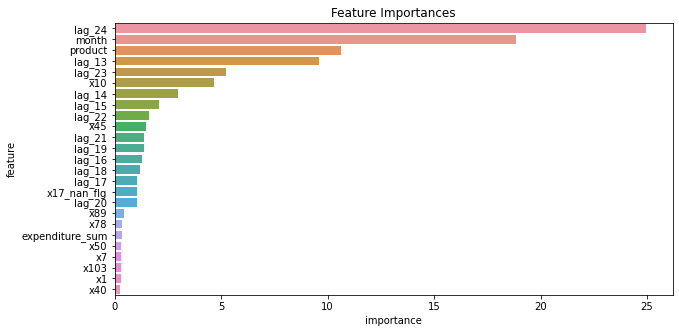

In [315]:
# Plot the feature importances using seaborn
#Only the most important 25 variables
plt.figure(figsize=(10,5))
sns.barplot(data=feature_importances.iloc[:25].sort_values(by='importance', ascending=False), x='importance', y='feature')
plt.title('Feature Importances')  
#plt.savefig("feature_importances.png")

# OTHER METHODS FOR TRAINING THE MODEL

In [316]:
#CatBoost allows to use categorical variables, different methods not allow, so - change categorical variables into dummies
months_X_t_train = pd.get_dummies(X_t_train.month, prefix='month_')
months_X_t_test = pd.get_dummies(X_t_test.month, prefix='month_')

In [317]:
#drop categorical variables
X_t_train = X_t_train.drop(['month', 'product'], axis=1)
X_t_test = X_t_test.drop(['month', 'product'], axis=1)

In [318]:
#join new dummy variables to the datasets
X_t_train = pd.merge(X_t_train, months_X_t_train, how='left', on=['key', 'date'] )
X_t_test = pd.merge(X_t_test, months_X_t_test, how='left', on=['key', 'date'] )

In [319]:
list(X_t_train)

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x10',
 'x12',
 'x15',
 'x19',
 'x24',
 'x26',
 'x28',
 'x29',
 'x31',
 'x33',
 'x36',
 'x38',
 'x40',
 'x43',
 'x45',
 'x47',
 'x50',
 'x52',
 'x54',
 'x57',
 'x59',
 'x61',
 'x64',
 'x66',
 'x68',
 'x71',
 'x73',
 'x75',
 'x78',
 'x80',
 'x82',
 'x87',
 'x89',
 'x92',
 'x94',
 'x96',
 'x99',
 'x103',
 'x108',
 'x110',
 'expenditure_sum',
 'nan_val_cnt',
 'x1_nan_flg',
 'x2_nan_flg',
 'x3_nan_flg',
 'x4_nan_flg',
 'x5_nan_flg',
 'x6_nan_flg',
 'x7_nan_flg',
 'x10_nan_flg',
 'x11_nan_flg',
 'x17_nan_flg',
 'x18_nan_flg',
 'x25_nan_flg',
 'x29_nan_flg',
 'x32_nan_flg',
 'x36_nan_flg',
 'x39_nan_flg',
 'x46_nan_flg',
 'x50_nan_flg',
 'x53_nan_flg',
 'x57_nan_flg',
 'x60_nan_flg',
 'x64_nan_flg',
 'x67_nan_flg',
 'x71_nan_flg',
 'x74_nan_flg',
 'x78_nan_flg',
 'x81_nan_flg',
 'x85_nan_flg',
 'x92_nan_flg',
 'x95_nan_flg',
 'x102_nan_flg',
 'x106_nan_flg',
 'lag_13',
 'lag_14',
 'lag_15',
 'lag_16',
 'lag_17',
 'lag_18',
 'lag_19',
 

In [320]:
list(X_t_test)

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x10',
 'x12',
 'x15',
 'x19',
 'x24',
 'x26',
 'x28',
 'x29',
 'x31',
 'x33',
 'x36',
 'x38',
 'x40',
 'x43',
 'x45',
 'x47',
 'x50',
 'x52',
 'x54',
 'x57',
 'x59',
 'x61',
 'x64',
 'x66',
 'x68',
 'x71',
 'x73',
 'x75',
 'x78',
 'x80',
 'x82',
 'x87',
 'x89',
 'x92',
 'x94',
 'x96',
 'x99',
 'x103',
 'x108',
 'x110',
 'expenditure_sum',
 'nan_val_cnt',
 'x1_nan_flg',
 'x2_nan_flg',
 'x3_nan_flg',
 'x4_nan_flg',
 'x5_nan_flg',
 'x6_nan_flg',
 'x7_nan_flg',
 'x10_nan_flg',
 'x11_nan_flg',
 'x17_nan_flg',
 'x18_nan_flg',
 'x25_nan_flg',
 'x29_nan_flg',
 'x32_nan_flg',
 'x36_nan_flg',
 'x39_nan_flg',
 'x46_nan_flg',
 'x50_nan_flg',
 'x53_nan_flg',
 'x57_nan_flg',
 'x60_nan_flg',
 'x64_nan_flg',
 'x67_nan_flg',
 'x71_nan_flg',
 'x74_nan_flg',
 'x78_nan_flg',
 'x81_nan_flg',
 'x85_nan_flg',
 'x92_nan_flg',
 'x95_nan_flg',
 'x102_nan_flg',
 'x106_nan_flg',
 'lag_13',
 'lag_14',
 'lag_15',
 'lag_16',
 'lag_17',
 'lag_18',
 'lag_19',
 

In [321]:
#import linear regression & train the model & assess the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_t_train, Y_t_train)
get_WMAPE(lr, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  LinearRegression() on train set:  28.972731550577453
The weighted mean absolute percent error (WMAPE) for model  LinearRegression() on test set:  32.27939351564114


In [322]:
#import RandomForest Reg & train the model & assess the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr3 = RandomForestRegressor(max_depth=3, random_state=0)
regr3.fit(X_t_train, Y_t_train)
get_WMAPE(regr3, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=3, random_state=0) on train set:  31.333918272952815
The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=3, random_state=0) on test set:  34.04566806358761


In [323]:
#another one combination of hyperparameters for Random Forest
regr4 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100,
criterion='mse',
min_samples_split=2,
min_samples_leaf=2,
max_leaf_nodes=None,
bootstrap=True,
oob_score=True,
n_jobs=None,
#verbose=2,
warm_start=False)
regr4.fit(X_t_train, Y_t_train)
get_WMAPE(regr4, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=4, min_samples_leaf=2, oob_score=True,
                      random_state=0) on train set:  29.759693560789902
The weighted mean absolute percent error (WMAPE) for model  RandomForestRegressor(max_depth=4, min_samples_leaf=2, oob_score=True,
                      random_state=0) on test set:  33.45973626262643


In [324]:
#import ExtraTree Reg & train the model & assess the model
#implements meta estimator that fits a number of randomized decision trees on various subsamples and uses averaging
#to improve the predictive accuracy and control over-fitting 
from sklearn.ensemble import ExtraTreesRegressor
etr1 = ExtraTreesRegressor(n_estimators=150, random_state=0, bootstrap=False, max_depth=8, min_samples_split=2, min_samples_leaf=3 )
etr1.fit(X_t_train, Y_t_train)
get_WMAPE(etr1, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  ExtraTreesRegressor(max_depth=8, min_samples_leaf=3, n_estimators=150,
                    random_state=0) on train set:  24.719463386356967
The weighted mean absolute percent error (WMAPE) for model  ExtraTreesRegressor(max_depth=8, min_samples_leaf=3, n_estimators=150,
                    random_state=0) on test set:  32.54703030478184


In [325]:
#import xgboost & train the model & assess the model
from xgboost import XGBRegressor 
xgb = XGBRegressor(max_depth=6, n_estimators=50, colsample_bytree=0.4,
                 gamma=1,                 
                 learning_rate=0.07,
                 min_child_weight=1.5 )
xgb.fit(X_t_train, Y_t_train)
get_WMAPE(xgb, X_t_train, Y_t_train, X_t_test, Y_t_test)

[19:08:28] ======== Monitor: Learner ========
[19:08:28] ======== Monitor: GBTree ========
[19:08:28] ======== Monitor: TreePruner ========
[19:08:28] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:08:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[19:08:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[19:08:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[19:08:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[19:08:28] INFO: C:/Users/Administrator/workspace

[19:08:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[19:08:31] ======== Monitor: Learner ========
[19:08:31] Configure: 0.002438s, 1 calls @ 2438us

[19:08:31] EvalOneIter: 0.001139s, 50 calls @ 1139us

[19:08:31] GetGradient: 0.02114s, 50 calls @ 21140us

[19:08:31] PredictRaw: 0.189144s, 50 calls @ 189144us

[19:08:31] UpdateOneIter: 2.54553s, 50 calls @ 2545532us

[19:08:31] ======== Monitor: GBTree ========
[19:08:31] BoostNewTrees: 2.32847s, 50 calls @ 2328470us

[19:08:31] CommitModel: 0.000153s, 50 calls @ 153us

[19:08:31] 

In [326]:
#another one combination for XGBoost 
xgb2 = XGBRegressor( colsample_bytree = 0.7,
eta= 0.1,
gamma= 0.5,
learning_rate= 0.2,
max_depth= 4,
min_child_weight= 7.0,
n_estimators= 75,
reg_lambda= 5.0,
subsample= 0.8)
xgb2.fit(X_t_train, Y_t_train)
Y_predict = xgb2.predict(X_t_test)
get_WMAPE(xgb2, X_t_train, Y_t_train, X_t_test, Y_t_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_t_test, Y_predict))

[19:08:31] ======== Monitor: Learner ========
[19:08:31] ======== Monitor: GBTree ========
[19:08:31] ======== Monitor: TreePruner ========
[19:08:31] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:08:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:08:31] INFO: C:/Users/Administrator/workspace/xgb

[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:08:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 

1743.8629810463713

In [327]:

#fit_params = {'eval_metric': 'rmse', 'nthread': 4,  'eval_set': [(X_t_test, Y_t_test)]}
mdl = XGBRegressor(eval_metric = 'rmse',
        nthread = 4,  verbosity=3  )
                  
param_grid = {
    'max_depth': [2,3,4,5,6], 
    'eta': [0.05, 0.1, 0.3],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0], 
    'colsample_bytree': [ 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], 
    'gamma': [0, 0.25, 0.5, 1.0, 2.0], 
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 
    'n_estimators': [25, 40, 50,75, 100]}

rs_mdl = RandomizedSearchCV(mdl, param_grid, n_iter=30, cv=2, random_state=42)
rs_mdl.fit(X_t_train, Y_t_train, eval_set=[(X_t_test, Y_t_test)])
y_pred = rs_mdl.predict(X_t_test)

best_score = rs_mdl.best_score_
best_params = rs_mdl.best_params_
rs_mdl.cv_results_

print(best_score)
print(rs_mdl.best_score_)



for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

[19:08:35] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:08:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-rmse:4022.40210
[19:08:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[1]	validation_0-rmse:3418.84912
[19:08:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[2]	validation_0-rmse:2940.29053
[19:08:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[3]	validation_0-rmse:2598.47070
[19:08:35] INFO: C:/Users/Administrator/workspace/xgboost-win

[19:08:37] ======== Monitor: Learner ========
[19:08:37] Configure: 0.002057s, 1 calls @ 2057us

[19:08:37] EvalOneIter: 0.056446s, 40 calls @ 56446us

[19:08:37] GetGradient: 0.011772s, 40 calls @ 11772us

[19:08:37] PredictRaw: 0.104696s, 40 calls @ 104696us

[19:08:37] UpdateOneIter: 1.96242s, 40 calls @ 1962417us

[19:08:37] ======== Monitor: GBTree ========
[19:08:37] BoostNewTrees: 1.83958s, 40 calls @ 1839581us

[19:08:37] CommitModel: 0.000127s, 40 calls @ 127us

[19:08:37] ======== Monitor: TreePruner ========
[19:08:37] PrunerUpdate: 0.087731s, 40 calls @ 87731us

[19:08:37] ======== Monitor: Learner ========
[19:08:37] Configure: 0.001649s, 1 calls @ 1649us

[19:08:37] ======== Monitor: GBTree ========
[19:08:37] ======== Monitor: TreePruner ========
[19:08:37] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:08:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:1

[19:08:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[30]	validation_0-rmse:3819.45410
[19:08:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[31]	validation_0-rmse:3791.82568
[19:08:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[32]	validation_0-rmse:3765.51416
[19:08:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[33]	validation_0-rmse:3738.57031
[19:08:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[34]	vali

[19:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[70]	validation_0-rmse:2939.95410
[19:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[71]	validation_0-rmse:2922.93726
[19:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[72]	validation_0-rmse:2905.74292
[19:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[73]	validation_0-rmse:2889.31201
[19:08:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[74]	vali

[19:08:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[6]	validation_0-rmse:4578.07715
[19:08:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[7]	validation_0-rmse:4543.23193
[19:08:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[8]	validation_0-rmse:4508.85791
[19:08:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[9]	validation_0-rmse:4474.86670
[19:08:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[10]	validati

[19:08:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[46]	validation_0-rmse:3452.92358
[19:08:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[47]	validation_0-rmse:3430.73731
[19:08:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[48]	validation_0-rmse:3409.01660
[19:08:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[49]	validation_0-rmse:3387.77808
[19:08:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[50]	vali

[19:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[86]	validation_0-rmse:2751.63721
[19:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[87]	validation_0-rmse:2737.85986
[19:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[88]	validation_0-rmse:2724.18945
[19:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[89]	validation_0-rmse:2711.25635
[19:08:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[90]	vali

[19:08:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[22]	validation_0-rmse:3968.37891
[19:08:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[23]	validation_0-rmse:3936.94434
[19:08:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[24]	validation_0-rmse:3905.29224
[19:08:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[25]	validation_0-rmse:3873.18213
[19:08:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[26]	vali

[19:08:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[47]	validation_0-rmse:3292.78491
[19:08:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[48]	validation_0-rmse:3269.88086
[19:08:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[49]	validation_0-rmse:3247.56958
[19:08:54] ======== Monitor: Learner ========
[19:08:54] Configure: 0.001987s, 1 calls @ 1987us

[19:08:54] EvalOneIter: 0.094822s, 50 calls @ 94822us

[19:08:54] GetGradient: 0.016151s, 50 calls @ 16151us

[19:08:54] PredictRaw: 0.124162s, 50 calls @ 124162us

[19:08:54] UpdateOneIter: 1.7309s, 50 calls @ 1730899us

[19:08:54] ======== Monitor: GBTree ========
[19:08:54] BoostNewTr

[19:08:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[72]	validation_0-rmse:2714.40918
[19:08:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[73]	validation_0-rmse:2697.20654
[19:08:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[74]	validation_0-rmse:2679.73975
[19:08:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[75]	validation_0-rmse:2662.55542
[19:08:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[76]	vali

[19:09:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[8]	validation_0-rmse:4472.59912
[19:09:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[9]	validation_0-rmse:4434.61182
[19:09:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[10]	validation_0-rmse:4397.73340
[19:09:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[11]	validation_0-rmse:4359.80518
[19:09:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[12]	vali

[19:09:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[48]	validation_0-rmse:3257.31567
[19:09:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[49]	validation_0-rmse:3234.55444
[19:09:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[50]	validation_0-rmse:3212.29272
[19:09:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[51]	validation_0-rmse:3189.91333
[19:09:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[52]	vali

[19:09:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[88]	validation_0-rmse:2537.13794
[19:09:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[89]	validation_0-rmse:2524.16113
[19:09:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[90]	validation_0-rmse:2510.94263
[19:09:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[91]	validation_0-rmse:2497.89990
[19:09:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[92]	vali

[19:09:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[24]	validation_0-rmse:4728.26318
[19:09:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[25]	validation_0-rmse:4724.24951
[19:09:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[26]	validation_0-rmse:4720.22119
[19:09:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[27]	validation_0-rmse:4716.20020
[19:09:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[28]	vali

[19:09:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[64]	validation_0-rmse:4573.77344
[19:09:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[65]	validation_0-rmse:4569.93603
[19:09:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[66]	validation_0-rmse:4566.19189
[19:09:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[67]	validation_0-rmse:4562.41602
[19:09:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[68]	vali

[19:09:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-rmse:4824.68213
[19:09:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:4820.75537
[19:09:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:4816.74316
[19:09:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:4812.91309
[19:09:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[4]	validatio

[19:09:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[80]	validation_0-rmse:4523.30664
[19:09:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[81]	validation_0-rmse:4519.73340
[19:09:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[82]	validation_0-rmse:4516.08740
[19:09:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[83]	validation_0-rmse:4512.51416
[19:09:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[84]	vali

[19:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[16]	validation_0-rmse:1799.17065
[19:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[17]	validation_0-rmse:1797.66809
[19:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[18]	validation_0-rmse:1792.98938
[19:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[19]	validation_0-rmse:1798.13562
[19:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[20]	vali

[1]	validation_0-rmse:3457.63940
[19:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[2]	validation_0-rmse:2977.26758
[19:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[3]	validation_0-rmse:2631.89258
[19:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:2365.54907
[19:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[5]	validation_0-rmse:2188.94580
[19:09:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned

[19:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[42]	validation_0-rmse:1800.05481
[19:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[43]	validation_0-rmse:1799.75562
[19:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[44]	validation_0-rmse:1797.15869
[19:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[45]	validation_0-rmse:1796.81323
[19:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[46]	vali

[19:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[12]	validation_0-rmse:1804.87964
[19:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[13]	validation_0-rmse:1799.92017
[19:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[14]	validation_0-rmse:1798.50940
[19:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[15]	validation_0-rmse:1796.31262
[19:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[16]	validatio

[19:09:22] ======== Monitor: Learner ========
[19:09:22] Configure: 0.00167s, 1 calls @ 1670us

[19:09:22] ======== Monitor: GBTree ========
[19:09:22] ======== Monitor: TreePruner ========
[19:09:22] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:09:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-rmse:4395.95459
[19:09:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:4011.29858
[19:09:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:3675.53174
[19:09:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3

[19:09:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[39]	validation_0-rmse:1744.66260
[19:09:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[40]	validation_0-rmse:1744.07349
[19:09:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[41]	validation_0-rmse:1744.42822
[19:09:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[42]	validation_0-rmse:1744.93530
[19:09:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[43]	vali

[19:09:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[25]	validation_0-rmse:1800.12585
[19:09:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[26]	validation_0-rmse:1799.42432
[19:09:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[27]	validation_0-rmse:1801.09644
[19:09:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[28]	validation_0-rmse:1796.65784
[19:09:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[29]	vali

[19:09:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[11]	validation_0-rmse:1791.24817
[19:09:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[12]	validation_0-rmse:1784.96704
[19:09:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[13]	validation_0-rmse:1776.89087
[19:09:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[14]	validation_0-rmse:1776.22534
[19:09:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=4
[15]	vali

[19:09:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:3329.60620
[19:09:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:2863.92554
[19:09:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:2519.40259
[19:09:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-rmse:2284.20654
[19:09:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[5]	validatio

[19:09:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[21]	validation_0-rmse:1779.88586
[19:09:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22]	validation_0-rmse:1772.03394
[19:09:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[23]	validation_0-rmse:1765.67322
[19:09:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[24]	validation_0-rmse:1760.20117
[19:09:36] ======== Monitor: Learner ========
[19:09:36] Configure: 0.001935s, 1 calls @ 1935us

[19:09:36] EvalOneIter: 0.055411s, 25 calls @ 55411us

[19:09:36] GetGradient: 0.01

[19:09:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	validation_0-rmse:4662.04248
[19:09:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	validation_0-rmse:4620.07422
[19:09:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[5]	validation_0-rmse:4579.00293
[19:09:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[6]	validation_0-rmse:4538.49756
[19:09:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[7]	validatio

[19:09:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[43]	validation_0-rmse:3339.51245
[19:09:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[44]	validation_0-rmse:3314.20215
[19:09:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[45]	validation_0-rmse:3288.70850
[19:09:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[46]	validation_0-rmse:3264.53296
[19:09:39] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[47]	vali

[19:09:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[29]	validation_0-rmse:3759.51318
[19:09:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[30]	validation_0-rmse:3729.61719
[19:09:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[31]	validation_0-rmse:3701.47583
[19:09:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[32]	validation_0-rmse:3672.58325
[19:09:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[33]	vali

[19:09:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[15]	validation_0-rmse:4225.81689
[19:09:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[16]	validation_0-rmse:4191.40137
[19:09:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[17]	validation_0-rmse:4157.59766
[19:09:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[18]	validation_0-rmse:4124.38770
[19:09:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[19]	vali

[19:09:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[55]	validation_0-rmse:3131.94238
[19:09:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[56]	validation_0-rmse:3110.71948
[19:09:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[57]	validation_0-rmse:3090.05884
[19:09:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[58]	validation_0-rmse:3069.63989
[19:09:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[59]	vali

[19:09:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[16]	validation_0-rmse:4208.09717
[19:09:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[17]	validation_0-rmse:4174.31787
[19:09:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=4
[18]	validation_0-rmse:4141.29590
[19:09:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=4
[19]	validation_0-rmse:4109.12402
[19:09:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[20]	vali

[19:09:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[56]	validation_0-rmse:3141.86597
[19:09:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[57]	validation_0-rmse:3121.11157
[19:09:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[58]	validation_0-rmse:3101.58789
[19:09:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[59]	validation_0-rmse:3081.43750
[19:09:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[60]	vali

[19:09:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[17]	validation_0-rmse:1772.73352
[19:09:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[18]	validation_0-rmse:1773.69006
[19:09:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[19]	validation_0-rmse:1776.00354
[19:09:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[20]	validation_0-rmse:1779.51746
[19:09:49] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[21]	vali

[19:09:51] ======== Monitor: Learner ========
[19:09:51] Configure: 0.001769s, 1 calls @ 1769us

[19:09:51] ======== Monitor: GBTree ========
[19:09:51] ======== Monitor: TreePruner ========
[19:09:51] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:09:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[0]	validation_0-rmse:4825.09522
[19:09:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 2 pruned nodes, max_depth=6
[1]	validation_0-rmse:4821.48486
[19:09:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 2 pruned nodes, max_depth=6
[2]	validation_0-rmse:4817.90674
[19:09:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[19:09:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=6
[39]	validation_0-rmse:4687.56445
[19:09:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[40]	validation_0-rmse:4684.11182
[19:09:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[41]	validation_0-rmse:4680.64014
[19:09:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[42]	validation_0-rmse:4677.17725
[19:09:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[43]	vali

[19:09:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[25]	validation_0-rmse:4742.73682
[19:09:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[26]	validation_0-rmse:4739.47754
[19:09:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[27]	validation_0-rmse:4736.18750
[19:09:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[28]	validation_0-rmse:4732.91992
[19:09:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[29]	vali

[19:09:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[50]	validation_0-rmse:1860.35169
[19:09:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[51]	validation_0-rmse:1861.06274
[19:10:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[52]	validation_0-rmse:1860.76477
[19:10:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[53]	validation_0-rmse:1861.95874
[19:10:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[54]	vali

[19:10:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[90]	validation_0-rmse:1875.64148
[19:10:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[91]	validation_0-rmse:1876.01257
[19:10:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[92]	validation_0-rmse:1875.66834
[19:10:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[93]	validation_0-rmse:1875.81348
[19:10:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[94]	vali

[25]	validation_0-rmse:1851.37952
[19:10:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[26]	validation_0-rmse:1852.50598
[19:10:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[27]	validation_0-rmse:1856.29712
[19:10:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[28]	validation_0-rmse:1860.26111
[19:10:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 106 extra nodes, 0 pruned nodes, max_depth=6
[29]	validation_0-rmse:1862.41956
[19:10:05] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 

[19:10:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:3386.39429
[19:10:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:2924.37158
[19:10:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:2583.91162
[19:10:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-rmse:2337.49438
[19:10:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[5]	validatio

[19:10:11] ======== Monitor: Learner ========
[19:10:11] Configure: 0.001925s, 1 calls @ 1925us

[19:10:11] ======== Monitor: GBTree ========
[19:10:11] ======== Monitor: TreePruner ========
[19:10:11] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:10:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-rmse:4017.91675
[19:10:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:3394.01538
[19:10:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:2957.48047
[19:10:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.

[19:10:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[34]	validation_0-rmse:3589.60864
[19:10:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[35]	validation_0-rmse:3560.95166
[19:10:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[36]	validation_0-rmse:3533.11963
[19:10:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[37]	validation_0-rmse:3505.88892
[19:10:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[38]	vali

[19:10:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[74]	validation_0-rmse:2700.68506
[19:10:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[75]	validation_0-rmse:2683.89062
[19:10:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[76]	validation_0-rmse:2667.90259
[19:10:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[77]	validation_0-rmse:2651.55127
[19:10:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[78]	vali

[19:10:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[10]	validation_0-rmse:4396.80811
[19:10:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[11]	validation_0-rmse:4359.98047
[19:10:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[12]	validation_0-rmse:4322.15918
[19:10:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13]	validation_0-rmse:4285.52393
[19:10:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14]	vali

[19:10:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[50]	validation_0-rmse:3215.27930
[19:10:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[51]	validation_0-rmse:3193.14307
[19:10:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[52]	validation_0-rmse:3170.94067
[19:10:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[53]	validation_0-rmse:3148.28784
[19:10:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[54]	vali

[19:10:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[90]	validation_0-rmse:2523.89038
[19:10:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[91]	validation_0-rmse:2510.77319
[19:10:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[92]	validation_0-rmse:2497.69482
[19:10:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[93]	validation_0-rmse:2485.60962
[19:10:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[94]	vali

[19:10:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[26]	validation_0-rmse:1844.67920
[19:10:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[27]	validation_0-rmse:1845.92468
[19:10:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[28]	validation_0-rmse:1851.35657
[19:10:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[29]	validation_0-rmse:1851.82996
[19:10:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[30]	vali

[19:10:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[22]	validation_0-rmse:1885.92541
[19:10:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[23]	validation_0-rmse:1892.50696
[19:10:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[24]	validation_0-rmse:1895.56140
[19:10:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[25]	validation_0-rmse:1897.62598
[19:10:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[26]	

[19:10:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[58]	validation_0-rmse:4613.79102
[19:10:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[59]	validation_0-rmse:4610.23633
[19:10:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[60]	validation_0-rmse:4606.68603
[19:10:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[61]	validation_0-rmse:4603.15576
[19:10:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[62]	validatio

[19:10:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[33]	validation_0-rmse:4708.34180
[19:10:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[34]	validation_0-rmse:4704.85059
[19:10:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[35]	validation_0-rmse:4701.31543
[19:10:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[36]	validation_0-rmse:4697.82471
[19:10:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[37]	validatio

[19:10:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[74]	validation_0-rmse:4569.04102
[19:10:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[75]	validation_0-rmse:4565.68652
[19:10:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[76]	validation_0-rmse:4562.46338
[19:10:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[77]	validation_0-rmse:4559.23096
[19:10:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[78]	validatio

[19:10:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[10]	validation_0-rmse:1802.32983
[19:10:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[11]	validation_0-rmse:1798.92175
[19:10:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=5
[12]	validation_0-rmse:1794.17554
[19:10:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=5
[13]	validation_0-rmse:1803.78894
[19:10:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=5
[14]	vali

[19:10:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[21]	validation_0-rmse:1890.61792
[19:10:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[22]	validation_0-rmse:1890.96948
[19:10:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[23]	validation_0-rmse:1893.66284
[19:10:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=5
[24]	validation_0-rmse:1897.94800
[19:10:34] ======== Monitor: Learner ========
[19:10:34] Configure: 0.002078s, 1 calls @ 2078us

[19:10:34] EvalOneIter: 0.04135s, 25 calls @ 41350us

[19:10:34] GetGradient: 0.007

[19:10:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[3]	validation_0-rmse:2594.27979
[19:10:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[4]	validation_0-rmse:2331.22803
[19:10:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[5]	validation_0-rmse:2139.70850
[19:10:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[6]	validation_0-rmse:2009.56103
[19:10:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=4
[7]	validatio

[19:10:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14]	validation_0-rmse:4297.64551
[19:10:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[15]	validation_0-rmse:4265.65820
[19:10:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[16]	validation_0-rmse:4233.59961
[19:10:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[17]	validation_0-rmse:4201.86768
[19:10:38] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[18]	vali

[19:10:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[54]	validation_0-rmse:3246.74585
[19:10:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[55]	validation_0-rmse:3226.16113
[19:10:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[56]	validation_0-rmse:3206.08545
[19:10:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[57]	validation_0-rmse:3185.86304
[19:10:40] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[58]	vali

[19:10:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[54]	validation_0-rmse:3296.91968
[19:10:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[55]	validation_0-rmse:3277.68896
[19:10:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[56]	validation_0-rmse:3258.59668
[19:10:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[57]	validation_0-rmse:3239.06274
[19:10:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[58]	vali

[19:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[15]	validation_0-rmse:4263.52344
[19:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[16]	validation_0-rmse:4231.36670
[19:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[17]	validation_0-rmse:4199.83301
[19:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[18]	validation_0-rmse:4168.43994
[19:10:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[19]	validatio

[55]	validation_0-rmse:3221.72290
[19:10:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[56]	validation_0-rmse:3201.51147
[19:10:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[57]	validation_0-rmse:3181.58887
[19:10:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[58]	validation_0-rmse:3161.97021
[19:10:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[59]	validation_0-rmse:3142.42920
[19:10:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 p

[19:10:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[30]	validation_0-rmse:3840.91309
[19:10:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[31]	validation_0-rmse:3814.48144
[19:10:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[32]	validation_0-rmse:3788.13769
[19:10:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[33]	validation_0-rmse:3762.28271
[19:10:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[34]	validati

[19:10:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[5]	validation_0-rmse:4806.49268
[19:10:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[6]	validation_0-rmse:4802.82129
[19:10:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[7]	validation_0-rmse:4799.15137
[19:10:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[8]	validation_0-rmse:4795.48389
[19:10:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[9]	validation_0-r

[19:10:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[16]	validation_0-rmse:4770.80908
[19:10:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[17]	validation_0-rmse:4767.36279
[19:10:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[18]	validation_0-rmse:4763.99658
[19:10:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19]	validation_0-rmse:4760.56592
[19:10:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[20]	validatio

[19:10:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[27]	validation_0-rmse:1757.54541
[19:10:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[28]	validation_0-rmse:1759.28064
[19:10:56] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[29]	validation_0-rmse:1760.07080
[19:10:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[30]	validation_0-rmse:1758.66077
[19:10:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[31]	vali

[19:10:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[67]	validation_0-rmse:1774.85254
[19:10:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	validation_0-rmse:1776.06238
[19:10:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[69]	validation_0-rmse:1776.89087
[19:10:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[70]	validation_0-rmse:1778.14917
[19:10:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[71]	vali

[19:10:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[28]	validation_0-rmse:1788.85644
[19:10:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[29]	validation_0-rmse:1785.58691
[19:10:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[30]	validation_0-rmse:1788.02417
[19:10:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[31]	validation_0-rmse:1788.04211
[19:10:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[32]	vali

[19:11:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[68]	validation_0-rmse:1815.79517
[19:11:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[69]	validation_0-rmse:1815.72681
[19:11:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[70]	validation_0-rmse:1816.85632
[19:11:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[71]	validation_0-rmse:1816.08801
[19:11:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[72]	vali

[19:11:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[29]	validation_0-rmse:1763.17761
[19:11:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[30]	validation_0-rmse:1764.00720
[19:11:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=4
[31]	validation_0-rmse:1764.97937
[19:11:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=4
[32]	validation_0-rmse:1766.36011
[19:11:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[33]	vali

[19:11:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[15]	validation_0-rmse:1782.32178
[19:11:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[16]	validation_0-rmse:1777.79187
[19:11:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[17]	validation_0-rmse:1775.69898
[19:11:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[18]	validation_0-rmse:1775.49927
[19:11:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[19]	vali

[19:11:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[41]	validation_0-rmse:1841.59070
[19:11:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[42]	validation_0-rmse:1842.90710
[19:11:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[43]	validation_0-rmse:1842.24780
[19:11:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[44]	validation_0-rmse:1839.65930
[19:11:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[45]	vali

[19:11:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=5
[81]	validation_0-rmse:1863.59656
[19:11:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[82]	validation_0-rmse:1865.67004
[19:11:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[83]	validation_0-rmse:1866.65210
[19:11:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[84]	validation_0-rmse:1867.19665
[19:11:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[85]	vali

[19:11:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[17]	validation_0-rmse:1804.87207
[19:11:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[18]	validation_0-rmse:1806.62817
[19:11:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[19]	validation_0-rmse:1805.46887
[19:11:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[20]	validation_0-rmse:1805.26160
[19:11:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[21]	vali

[19:11:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[57]	validation_0-rmse:1847.93066
[19:11:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[58]	validation_0-rmse:1847.92798
[19:11:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=5
[59]	validation_0-rmse:1845.65051
[19:11:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[60]	validation_0-rmse:1844.64526
[19:11:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[61]	vali

[19:11:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[97]	validation_0-rmse:1861.72241
[19:11:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[98]	validation_0-rmse:1861.45520
[19:11:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=5
[99]	validation_0-rmse:1861.59949
[19:11:16] ======== Monitor: Learner ========
[19:11:16] Configure: 0.001992s, 1 calls @ 1992us

[19:11:16] EvalOneIter: 0.151606s, 100 calls @ 151606us

[19:11:16] GetGradient: 0.02799s, 100 calls @ 27990us

[19:11:16] PredictRaw: 0.241751s, 100 calls @ 241751us

[19:11:16] UpdateOneIter: 4.48177s, 100 calls @ 4481768us

[19:11:16] ======== Monitor: GBTree ========
[19:11:16] Boost

[19:11:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[4]	validation_0-rmse:1931.83862
[19:11:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[5]	validation_0-rmse:1853.90063
[19:11:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[6]	validation_0-rmse:1822.12732
[19:11:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[7]	validation_0-rmse:1812.24316
[19:11:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[8]	validatio

[19:11:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-rmse:4168.90967
[19:11:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:3623.61084
[19:11:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:3206.39307
[19:11:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:2891.61304
[19:11:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[4]	validatio

[19:11:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[41]	validation_0-rmse:1784.94312
[19:11:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[42]	validation_0-rmse:1786.83984
[19:11:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[43]	validation_0-rmse:1788.47729
[19:11:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=5
[44]	validation_0-rmse:1790.15295
[19:11:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=5
[45]	vali

In [328]:
#another one combination for XGBoost 
xgb_b_hp = XGBRegressor( colsample_bytree = 0.7,
eta= 0.1,
gamma= 0.5,
learning_rate= 0.2,
max_depth= 2,
min_child_weight= 7.0,
n_estimators= 50,
reg_lambda= 5.0,
subsample= 0.8)
xgb_b_hp.fit(X_t_train, Y_t_train)
Y_predict = xgb_b_hp.predict(X_t_test)
get_WMAPE(xgb_b_hp, X_t_train, Y_t_train, X_t_test, Y_t_test)
np.sqrt(mean_squared_error(Y_t_test, Y_predict))

[19:11:26] ======== Monitor: Learner ========
[19:11:26] Configure: 0.001929s, 1 calls @ 1929us

[19:11:26] ======== Monitor: GBTree ========
[19:11:26] ======== Monitor: TreePruner ========
[19:11:26] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[19:11:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11

[19:11:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:11:28] ======== Monitor: Learner ========
[19:11:28] Configure: 0.002111s, 1 calls @ 2111us

[19:11:28] EvalOneIter: 0.001134s, 50 calls @ 1134us

[19:11:28] GetGradient: 0.026068s, 50 calls @ 26068us

[19:11:28] PredictRaw: 0.205102s, 50 calls @ 205102us

[19:11:28] UpdateOneIter: 1.57769s, 50 calls @ 1577688us

[19:11:28] ======== Monitor: GBTree ========
[19:11:28] BoostNewTrees: 1.33943s, 50 calls @ 1339433us

[19:11:28] CommitModel: 0.000153s, 50 calls @ 153us

[19:11:28] ====

1714.710930802185

In [329]:
#Try the method of least squares
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [330]:
lmod = sm.OLS(Y_t_train,X_t_train).fit()

In [331]:
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     41.19
Date:                Sun, 21 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:11:28   Log-Likelihood:                -34159.
No. Observations:                3916   AIC:                         6.853e+04
Df Residuals:                    3810   BIC:                         6.920e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x1                 -7.7126     14.243     -0.541      0.588     -35.638      20.213
x2                -14.6930     13.174     -1.115      0.265     -40.523      11.137
x3                 10.2924     13.108      0.785      0.432     -15.407      35.992
x4                 -1.9923     12.895     -0.155      0.877     -27.274      23.289
x5                 -0.0169      0.041     -0.411      0.681      -0.097       0.064
x6                 -0.0178      0.033     -0.539      0.590      -0.082       0.047
x7                 -0.0068      0.011     -0.613      0.540      -0.029       0.015
x8                 -0.0017      0.011     -0.149      0.882      -0.024       0.021
x10                 0.0295      0.007      4.135      0.000       0.016       0.044
x12                 0.0928      0.137      0.680      0.497      -0.175       0.361
x15                -0.0240      0.011     -2.274      0.023      -0.045      -0.003
x19                -0.0298      0.110     -0.271      0.786      -0.245       0.185
x24                 6.6129     15.321      0.432      0.666     -23.426      36.651
x26                -0.0345      0.108     -0.318      0.750      -0.247       0.178
x28                 0.2557      0.588      0.435      0.664      -0.897       1.408
x29                 0.0027      0.011      0.239      0.811      -0.019       0.024
x31               -20.2570     12.848     -1.577      0.115     -45.446       4.932
x33                -0.0372      0.165     -0.225      0.822      -0.360       0.286
x36                -0.0118      0.010     -1.128      0.259      -0.032       0.009
x38                 4.4101     14.436      0.305      0.760     -23.893      32.714
x40                -0.0719      0.109     -0.662      0.508      -0.285       0.141
x43                -0.0182      0.011     -1.727      0.084      -0.039       0.002
x45                32.0651      8.221      3.900      0.000      15.947      48.183
x47                 0.0742      0.123      0.604      0.546      -0.167       0.315
x50                 0.0005      0.011      0.048      0.962      -0.022       0.023
x52                -5.7211     15.322     -0.373      0.709     -35.761      24.319
x54                -0.0010      0.129     -0.008      0.994      -0.253       0.251
x57                -0.0147      0.011     -1.344      0.179      -0.036       0.007
x59                 8.9413     16.631      0.538      0.591     -23.666      41.548
x61                 0.1190      0.108      1.099      0.272      -0.093       0.331
x64                -0.0026      0.010     -0.260      0.795      -0.022       0.017
x66               -31.2766     15.730     -1.988      0.047     -62.117      -0.436
x68                 0.0948      0.109      0.871      0.384      -0.118       0.308
x71                -0.0121      0.011     -1.105      0.269

In [332]:
#verify the quality
get_WMAPE(lmod, X_t_train, Y_t_train, X_t_test, Y_t_test)

The weighted mean absolute percent error (WMAPE) for model  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000E5B6D31550> on train set:  28.9727315505774
The weighted mean absolute percent error (WMAPE) for model  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000E5B6D31550> on test set:  32.27939351564097
